**ANALYSIS OF TREND IN HYPERTENSIVE DISORDOR OF PREGNACY AMONG DIFFERENT RACES IN THE UNITED STATE**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [ ]:
# Load Data
combined_df = pd.read_csv("/content/combine_2022.csv")

In [ ]:
combined_df.describe().T

count           mean            std  min       25%       50%  \
Unnamed: 0  1048575.0  312760.608135  216523.496355  0.0  131071.5  262143.0   
BFACIL3     1048575.0       1.031115       0.173628  1.0       1.0       1.0   
MAGER9      1048575.0       4.606998       1.098827  1.0       4.0       5.0   
MRACEHISP   1048575.0       1.000000       0.000000  1.0       1.0       1.0   
DMAR        1048575.0       1.220421       0.414531  1.0       1.0       1.0   
MEDUC       1048575.0       5.002674       1.660596  1.0       4.0       5.0   
FRACE15     1048575.0       1.379816       2.049912  1.0       1.0       1.0   
PRIORLIVE   1048575.0       1.028800       1.236206  0.0       0.0       1.0   
PRIORDEAD   1048575.0       0.012374       0.178742  0.0       0.0       0.0   
PRIORTERM   1048575.0       0.449644       0.915569  0.0       0.0       0.0   
PRECARE     1048575.0       2.797879       1.265518  0.0       2.0       3.0   
CIG_0       1048575.0       0.735642       3.914401  0.0       0.0       0.0   
CIG1_R      1048575.0       0.085137       0.442422  0.0       0.0       0.0   
CIG2_R      1048575.0       0.069056       0.387704  0.0       0.0       0.0   
CIG3_R      1048575.0       0.063281       0.366147  0.0       0.0       0.0   
BMI_R       1048575.0       3.016744       1.233355  1.0       2.0       3.0   
PAY_REC     1048575.0       1.860737       0.631349  1.0       2.0       2.0   
DPLURAL     1048575.0       1.033340       0.184015  1.0       1.0       1.0   
GESTREC3    1048575.0       1.899137       0.301147  1.0       2.0       2.0   

                 75%       max  
Unnamed: 0  492525.5  754669.0  
BFACIL3          1.0       2.0  
MAGER9           5.0       9.0  
MRACEHISP        1.0       1.0  
DMAR             1.0       2.0  
MEDUC            6.0       8.0  
FRACE15          1.0      15.0  
PRIORLIVE        2.0      19.0  
PRIORDEAD        0.0      12.0  
PRIORTERM        1.0      24.0  
PRECARE          3.0      10.0  
CIG_0            0.0      98.0  
CIG1_R           0.0       5.0  
CIG2_R           0.0       5.0  
CIG3_R           0.0       5.0  
BMI_R            4.0       6.0  
PAY_REC          2.0       4.0  
DPLURAL          1.0       4.0  
GESTREC3         2.0       2.0

In [ ]:
# prompt: remove column

#To remove columns based on their index
combined_df = combined_df.drop(combined_df.columns[[0]], axis=1)

print(combined_df.head()) # Display the first few rows of the modified dataframe

   BFACIL3  MAGER9  MRACEHISP  DMAR  MEDUC  FRACE15  PRIORLIVE  PRIORDEAD  \
0        2       4          1     1      3        1          4          0   
1        1       4          1     1      3        1          0          0   
2        1       6          1     1      6        1          1          0   
3        1       6          1     1      7        1          1          0   
4        1       3          1     2      4        2          0          0   

   PRIORTERM  PRECARE  ... IP_HEPC  PAY_REC  DPLURAL  SEX  GESTREC3  ILIVE  \
0          0        3  ...       N        3        1    M         2      Y   
1          0        3  ...       N        4        1    M         2      Y   
2          1        1  ...       N        2        1    M         2      Y   
3          6        4  ...       N        4        1    M         2      Y   
4          2        2  ...       N        1        1    M         2      Y   

  MM_MTR MM_PLAC MM_RUPT MM_AICU  
0      N       N       N       N 

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 39 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   BFACIL3    1048575 non-null  int64 
 1   MAGER9     1048575 non-null  int64 
 2   MRACEHISP  1048575 non-null  int64 
 3   DMAR       1048575 non-null  int64 
 4   MEDUC      1048575 non-null  int64 
 5   FRACE15    1048575 non-null  int64 
 6   PRIORLIVE  1048575 non-null  int64 
 7   PRIORDEAD  1048575 non-null  int64 
 8   PRIORTERM  1048575 non-null  int64 
 9   PRECARE    1048575 non-null  int64 
 10  WIC        1048575 non-null  object
 11  CIG_0      1048575 non-null  int64 
 12  CIG1_R     1048575 non-null  int64 
 13  CIG2_R     1048575 non-null  int64 
 14  CIG3_R     1048575 non-null  int64 
 15  BMI_R      1048575 non-null  int64 
 16  RF_PDIAB   1048575 non-null  object
 17  RF_GDIAB   1048575 non-null  object
 18  RF_PHYPE   1048575 non-null  object
 19  RF_GHYPE   1048575 no

In [ ]:
combined_df.describe()

BFACIL3        MAGER9  MRACEHISP          DMAR         MEDUC  \
count  1.048575e+06  1.048575e+06  1048575.0  1.048575e+06  1.048575e+06   
mean   1.031115e+00  4.606998e+00        1.0  1.220421e+00  5.002674e+00   
std    1.736275e-01  1.098827e+00        0.0  4.145308e-01  1.660596e+00   
min    1.000000e+00  1.000000e+00        1.0  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00        1.0  1.000000e+00  4.000000e+00   
50%    1.000000e+00  5.000000e+00        1.0  1.000000e+00  5.000000e+00   
75%    1.000000e+00  5.000000e+00        1.0  1.000000e+00  6.000000e+00   
max    2.000000e+00  9.000000e+00        1.0  2.000000e+00  8.000000e+00   

            FRACE15     PRIORLIVE     PRIORDEAD     PRIORTERM       PRECARE  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.379816e+00  1.028800e+00  1.237394e-02  4.496436e-01  2.797879e+00   
std    2.049912e+00  1.236206e+00  1.787417e-01  9.155691e-01  1.265518e+00   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00   
50%    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00   
75%    1.000000e+00  2.000000e+00  0.000000e+00  1.000000e+00  3.000000e+00   
max    1.500000e+01  1.900000e+01  1.200000e+01  2.400000e+01  1.000000e+01   

              CIG_0        CIG1_R        CIG2_R        CIG3_R         BMI_R  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   7.356422e-01  8.513745e-02  6.905562e-02  6.328112e-02  3.016744e+00   
std    3.914401e+00  4.424215e-01  3.877039e-01  3.661475e-01  1.233355e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00   
max    9.800000e+01  5.000000e+00  5.000000e+00  5.000000e+00  6.000000e+00   

            PAY_REC       DPLURAL      GESTREC3  
count  1.048575e+06  1.048575e+06  1.048575e+06  
mean   1.860737e+00  1.033340e+00  1.899137e+00  
std    6.313493e-01  1.840153e-01  3.011468e-01  
min    1.000000e+00  1.000000e+00  1.000000e+00  
25%    2.000000e+00  1.000000e+00  2.000000e+00  
50%    2.000000e+00  1.000000e+00  2.000000e+00  
75%    2.000000e+00  1.000000e+00  2.000000e+00  
max    4.000000e+00  4.000000e+00  2.000000e+00

In [ ]:
# prompt: find missing values

# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values)


BFACIL3      0
MAGER9       0
MRACEHISP    0
DMAR         0
MEDUC        0
FRACE15      0
PRIORLIVE    0
PRIORDEAD    0
PRIORTERM    0
PRECARE      0
WIC          0
CIG_0        0
CIG1_R       0
CIG2_R       0
CIG3_R       0
BMI_R        0
RF_PDIAB     0
RF_GDIAB     0
RF_PHYPE     0
RF_GHYPE     0
RF_EHYPE     0
RF_PPTERM    0
RF_INFTR     0
RF_FEDRG     0
RF_ARTEC     0
IP_GON       0
IP_SYPH      0
IP_CHLAM     0
IP_HEPB      0
IP_HEPC      0
PAY_REC      0
DPLURAL      0
SEX          0
GESTREC3     0
ILIVE        0
MM_MTR       0
MM_PLAC      0
MM_RUPT      0
MM_AICU      0
dtype: int64


In [ ]:
combined_df.shape

(1048575, 39)

In [ ]:
combined_df.head()

BFACIL3  MAGER9  MRACEHISP  DMAR  MEDUC  FRACE15  PRIORLIVE  PRIORDEAD  \
0        2       4          1     1      3        1          4          0   
1        1       4          1     1      3        1          0          0   
2        1       6          1     1      6        1          1          0   
3        1       6          1     1      7        1          1          0   
4        1       3          1     2      4        2          0          0   

   PRIORTERM  PRECARE  ... IP_HEPC  PAY_REC  DPLURAL  SEX  GESTREC3  ILIVE  \
0          0        3  ...       N        3        1    M         2      Y   
1          0        3  ...       N        4        1    M         2      Y   
2          1        1  ...       N        2        1    M         2      Y   
3          6        4  ...       N        4        1    M         2      Y   
4          2        2  ...       N        1        1    M         2      Y   

  MM_MTR MM_PLAC MM_RUPT MM_AICU  
0      N       N       N       N  
1      N       N       N       N  
2      N       N       N       N  
3      N       N       N       N  
4      N       N       N       N  

[5 rows x 39 columns]

In [ ]:
# prompt: remove row with missing values

# Drop rows with any missing values
combined_df = combined_df.dropna()

# Display the shape of the DataFrame after removing rows with missing values
combined_df.shape


(2465315, 37)

In [ ]:
# prompt: remove duplicate row

# combined_df.drop_duplicates(inplace=True)
# combined_df.shape


(1124876, 39)

In [ ]:
# Data Overview
print("combined_df Overview:")
print("Shape of the DataFrame:", combined_df.shape)
print("\nFirst 5 rows of the DataFrame:")
print(combined_df.head())
print("\nColumns in the DataFrame:")
print(combined_df.columns)

combined_df Overview:
Shape of the DataFrame: (2465315, 38)

First 5 rows of the DataFrame:
   MAGER9  MRACEHISP  DMAR  MEDUC  FRACE15  PRIORLIVE  PRIORDEAD  PRIORTERM  \
0       4          1     1      3        1          4          0          0   
1       4          1     1      3        1          0          0          0   
2       6          1     1      6        1          1          0          1   
3       6          1     1      7        1          1          0          6   
4       3          1     2      4        2          0          0          2   

   PRECARE WIC  ...  IP_HEPC  PAY_REC  DPLURAL  SEX  GESTREC3 ILIVE MM_MTR  \
0        3   N  ...        N        3        1    M         2     Y      N   
1        3   N  ...        N        4        1    M         2     Y      N   
2        1   Y  ...        N        2        1    M         2     Y      N   
3        4   N  ...        N        4        1    M         2     Y      N   
4        2   Y  ...        N        1      

In [ ]:
# 2. Summary Statistics
print("\nSummary Statistics:")
print(combined_df.describe(include='all'))


Summary Statistics:
              MAGER9     MRACEHISP          DMAR         MEDUC       FRACE15  \
count   2.465315e+06  2.465315e+06  2.465315e+06  2.465315e+06  2.465315e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    4.555452e+00  2.538588e+00  1.309531e+00  4.702917e+00  1.857739e+00   
std     1.146941e+00  2.347005e+00  4.623005e-01  1.723981e+00  2.605703e+00   
min     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%     4.000000e+00  1.000000e+00  1.000000e+00  3.000000e+00  1.000000e+00   
50%     5.000000e+00  1.000000e+00  1.000000e+00  5.000000e+00  1.000000e+00   
75%     5.000000e+00  4.000000e+00  2.000000e+00  6.000000e+00  2.000000e+00   
max     9.000000e+00  7.000000e+00  2.000000e+00  8.000000e+00  1.500000e+01   

           PRIORLI

In [ ]:
# 4. Missing Values
print("\nMissing Values:")
print(combined_df.isnull().sum())


Missing Values:
MAGER9       0
MRACEHISP    0
DMAR         0
MEDUC        0
FRACE15      0
PRIORLIVE    0
PRIORDEAD    0
PRIORTERM    0
PRECARE      0
WIC          0
CIG_0        0
CIG1_R       0
CIG2_R       0
CIG3_R       0
BMI_R        0
RF_PDIAB     0
RF_GDIAB     0
RF_PHYPE     0
RF_GHYPE     0
RF_EHYPE     0
RF_PPTERM    0
RF_INFTR     0
RF_FEDRG     0
RF_ARTEC     0
IP_GON       0
IP_SYPH      0
IP_CHLAM     0
IP_HEPB      0
IP_HEPC      0
PAY_REC      0
DPLURAL      0
SEX          0
GESTREC3     0
ILIVE        0
MM_MTR       0
MM_PLAC      0
MM_RUPT      0
MM_AICU      0
dtype: int64


In [ ]:
# 5. Unique Values
print("\nUnique Values per Column:")
for column in combined_df.columns:
    print(f"{column}: {combined_df[column].nunique()} unique values")


Unique Values per Column:
BFACIL3: 2 unique values
MAGER9: 9 unique values
MRACEHISP: 1 unique values
DMAR: 2 unique values
MEDUC: 8 unique values
FRACE15: 15 unique values
PRIORLIVE: 20 unique values
PRIORDEAD: 13 unique values
PRIORTERM: 25 unique values
PRECARE: 11 unique values
WIC: 2 unique values
CIG_0: 48 unique values
CIG1_R: 6 unique values
CIG2_R: 6 unique values
CIG3_R: 6 unique values
BMI_R: 6 unique values
RF_PDIAB: 2 unique values
RF_GDIAB: 2 unique values
RF_PHYPE: 2 unique values
RF_GHYPE: 2 unique values
RF_EHYPE: 2 unique values
RF_PPTERM: 2 unique values
RF_INFTR: 2 unique values
RF_FEDRG: 3 unique values
RF_ARTEC: 3 unique values
IP_GON: 2 unique values
IP_SYPH: 2 unique values
IP_CHLAM: 2 unique values
IP_HEPB: 2 unique values
IP_HEPC: 2 unique values
PAY_REC: 4 unique values
DPLURAL: 4 unique values
SEX: 2 unique values
GESTREC3: 2 unique values
ILIVE: 2 unique values
MM_MTR: 2 unique values
MM_PLAC: 2 unique values
MM_RUPT: 2 unique values
MM_AICU: 2 unique valu

In [ ]:
combined_df

BFACIL3  MAGER9  MRACEHISP  DMAR  MEDUC  FRACE15  PRIORLIVE  \
0              2       4          1     1      3        1          4   
1              1       4          1     1      3        1          0   
2              1       6          1     1      6        1          1   
3              1       6          1     1      7        1          1   
4              1       3          1     2      4        2          0   
...          ...     ...        ...   ...    ...      ...        ...   
1048570        1       4          1     1      6        1          0   
1048571        1       5          1     1      6        1          2   
1048572        1       5          1     1      5        1          3   
1048573        1       4          1     1      6        1          1   
1048574        1       5          1     1      6        1          2   

         PRIORDEAD  PRIORTERM  PRECARE  ... IP_HEPC  PAY_REC  DPLURAL  SEX  \
0                0          0        3  ...       N        3        1    M   
1                0          0        3  ...       N        4        1    M   
2                0          1        1  ...       N        2        1    M   
3                0          6        4  ...       N        4        1    M   
4                0          2        2  ...       N        1        1    M   
...            ...        ...      ...  ...     ...      ...      ...  ...   
1048570          0          0        3  ...       N        2        1    F   
1048571          0          0        3  ...       N        2        1    F   
1048572          0          1        2  ...       N        2        1    F   
1048573          0          0        3  ...       N        2        1    F   
1048574          0          0        2  ...       N        2        1    F   

         GESTREC3  ILIVE MM_MTR MM_PLAC MM_RUPT MM_AICU  
0               2      Y      N       N       N       N  
1               2      Y      N       N       N       N  
2               2      Y      N       N       N       N  
3               2      Y      N       N       N       N  
4               2      Y      N       N       N       N  
...           ...    ...    ...     ...     ...     ...  
1048570         2      Y      N       N       N       N  
1048571         2      Y      N       N       N       N  
1048572         2      Y      N       N       N       N  
1048573         2      Y      N       N       N       N  
1048574         2      Y      N       N       N       N  

[1048575 rows x 39 columns]

In [ ]:
combined_df.MAGER9.dtype

dtype('int64')

In [ ]:
# prompt: mapping the integal values in column MAGER9 to string and save into the dataframe

# Create a mapping dictionary for MAGER9 values
mapping = {
    1: '18-20',
    2: '21-24',
    3: '25-29',
    4: '30-34',
    5: '35-39',
    6: '40-44'
}

# Map the integer values in the 'MAGER9' column to strings using the mapping dictionary
combined_df['MAGER9'] = combined_df['MAGER9'].map(mapping)

# Display the updated dataframe
print(combined_df.head())


   BFACIL3 MAGER9  MRACEHISP  DMAR  MEDUC  FRACE15  PRIORLIVE  PRIORDEAD  \
0        2  30-34          1     1      3        1          4          0   
1        1  30-34          1     1      3        1          0          0   
2        1  40-44          1     1      6        1          1          0   
3        1  40-44          1     1      7        1          1          0   
4        1  25-29          1     2      4        2          0          0   

   PRIORTERM  PRECARE  ... PAY_REC  DPLURAL  SEX  GESTREC3  ILIVE  MM_MTR  \
0          0        3  ...       3        1    M         2      Y       N   
1          0        3  ...       4        1    M         2      Y       N   
2          1        1  ...       2        1    M         2      Y       N   
3          6        4  ...       4        1    M         2      Y       N   
4          2        2  ...       1        1    M         2      Y       N   

  MM_PLAC MM_RUPT MM_AICU MAGER9_str  
0       N       N       N      30-34  
1 

In [ ]:
combined_df

BFACIL3 MAGER9  MRACEHISP  DMAR  MEDUC  FRACE15  PRIORLIVE  \
0              2  30-34          1     1      3        1          4   
1              1  30-34          1     1      3        1          0   
2              1  40-44          1     1      6        1          1   
3              1  40-44          1     1      7        1          1   
4              1  25-29          1     2      4        2          0   
...          ...    ...        ...   ...    ...      ...        ...   
1048570        1  30-34          1     1      6        1          0   
1048571        1  35-39          1     1      6        1          2   
1048572        1  35-39          1     1      5        1          3   
1048573        1  30-34          1     1      6        1          1   
1048574        1  35-39          1     1      6        1          2   

         PRIORDEAD  PRIORTERM  PRECARE  ... PAY_REC  DPLURAL  SEX  GESTREC3  \
0                0          0        3  ...       3        1    M         2   
1                0          0        3  ...       4        1    M         2   
2                0          1        1  ...       2        1    M         2   
3                0          6        4  ...       4        1    M         2   
4                0          2        2  ...       1        1    M         2   
...            ...        ...      ...  ...     ...      ...  ...       ...   
1048570          0          0        3  ...       2        1    F         2   
1048571          0          0        3  ...       2        1    F         2   
1048572          0          1        2  ...       2        1    F         2   
1048573          0          0        3  ...       2        1    F         2   
1048574          0          0        2  ...       2        1    F         2   

         ILIVE  MM_MTR MM_PLAC MM_RUPT MM_AICU MAGER9_str  
0            Y       N       N       N       N      30-34  
1            Y       N       N       N       N      30-34  
2            Y       N       N       N       N      40-44  
3            Y       N       N       N       N      40-44  
4            Y       N       N       N       N      25-29  
...        ...     ...     ...     ...     ...        ...  
1048570      Y       N       N       N       N      30-34  
1048571      Y       N       N       N       N      35-39  
1048572      Y       N       N       N       N      35-39  
1048573      Y       N       N       N       N      30-34  
1048574      Y       N       N       N       N      35-39  

[1048575 rows x 40 columns]

In [ ]:
# prompt: mapping the integal values in column MRACEHISP to string and save into the dataframe

# Create a mapping dictionary for MRACEHISP values
mapping = {
    1: 'WHITE',
    2: 'BLACK',
    3: 'AIAN',
    4: 'ASIAN_INDIAN',
    5: 'CHINESE',
    6: 'FILIPINO',
    7: 'JAPANESE',
    8: 'KOREAN',
    9: 'VIETNAMES',
}

# Map the integer values in the 'MRACEHISP' column to strings using the mapping dictionary
combined_df['MRACEHISP'] = combined_df['MRACEHISP'].map(mapping)
combined_df['FRACE15'] = combined_df['FRACE15'].map(mapping)
# Display the updated dataframe
print(combined_df.head())


# Create a mapping dictionary for MRACEHISP values
mapping = {
    1: '8th',
    2: '8_9_gd',
    3: 'HS_GED',
    4: 'CC',
    5: 'A_DEG',
    6: 'B_DEG',
    7: 'M_DEG',
    8: 'PhPr_DEG',
    9: 'Unknown',
}

# Map the integer values in the 'MRACEHISP' column to strings using the mapping dictionary
combined_df['MEDUC'] = combined_df['MEDUC'].map(mapping)

# Display the updated dataframe
print(combined_df.head())


   BFACIL3 MAGER9 MRACEHISP  DMAR   MEDUC FRACE15  PRIORLIVE  PRIORDEAD  \
0        2  30-34       NaN     1  HS_GED   WHITE          4          0   
1        1  30-34       NaN     1  HS_GED   WHITE          0          0   
2        1  40-44       NaN     1   B_DEG   WHITE          1          0   
3        1  40-44       NaN     1   M_DEG   WHITE          1          0   
4        1  25-29       NaN     2      CC   BLACK          0          0   

   PRIORTERM  PRECARE  ...      PAY_REC DPLURAL SEX GESTREC3 ILIVE MM_MTR  \
0          0        3  ...     Self Pay       1   M        2     Y      N   
1          0        3  ...        OTHER       1   M        2     Y      N   
2          1        1  ...  Private Ins       1   M        2     Y      N   
3          6        4  ...        OTHER       1   M        2     Y      N   
4          2        2  ...     MEDICAID       1   M        2     Y      N   

  MM_PLAC MM_RUPT MM_AICU MAGER9_str  
0       N       N       N      30-34  
1       

In [ ]:
combined_df

BFACIL3 MAGER9 MRACEHISP  DMAR   MEDUC  FRACE15  PRIORLIVE  \
0              2  30-34     WHITE     1  HS_GED        1          4   
1              1  30-34     WHITE     1  HS_GED        1          0   
2              1  40-44     WHITE     1   B_DEG        1          1   
3              1  40-44     WHITE     1   M_DEG        1          1   
4              1  25-29     WHITE     2      CC        2          0   
...          ...    ...       ...   ...     ...      ...        ...   
1048570        1  30-34     WHITE     1   B_DEG        1          0   
1048571        1  35-39     WHITE     1   B_DEG        1          2   
1048572        1  35-39     WHITE     1   A_DEG        1          3   
1048573        1  30-34     WHITE     1   B_DEG        1          1   
1048574        1  35-39     WHITE     1   B_DEG        1          2   

         PRIORDEAD  PRIORTERM  PRECARE  ... PAY_REC  DPLURAL  SEX  GESTREC3  \
0                0          0        3  ...       3        1    M         2   
1                0          0        3  ...       4        1    M         2   
2                0          1        1  ...       2        1    M         2   
3                0          6        4  ...       4        1    M         2   
4                0          2        2  ...       1        1    M         2   
...            ...        ...      ...  ...     ...      ...  ...       ...   
1048570          0          0        3  ...       2        1    F         2   
1048571          0          0        3  ...       2        1    F         2   
1048572          0          1        2  ...       2        1    F         2   
1048573          0          0        3  ...       2        1    F         2   
1048574          0          0        2  ...       2        1    F         2   

         ILIVE  MM_MTR MM_PLAC MM_RUPT MM_AICU MAGER9_str  
0            Y       N       N       N       N      30-34  
1            Y       N       N       N       N      30-34  
2            Y       N       N       N       N      40-44  
3            Y       N       N       N       N      40-44  
4            Y       N       N       N       N      25-29  
...        ...     ...     ...     ...     ...        ...  
1048570      Y       N       N       N       N      30-34  
1048571      Y       N       N       N       N      35-39  
1048572      Y       N       N       N       N      35-39  
1048573      Y       N       N       N       N      30-34  
1048574      Y       N       N       N       N      35-39  

[1048575 rows x 40 columns]

In [ ]:
# Create a mapping dictionary for MRACEHISP values
mapping = {
    0: '0',
    1: '1-3',
    2: '4-8',
    3: '9-16',
    4: '17-31',
    5: '32-41',
}

# Map the integer values in the 'MRACEHISP' column to strings using the mapping dictionary
combined_df['CIG_0'] = combined_df['CIG_0'].map(mapping)
combined_df['CIG1_R'] = combined_df['CIG1_R'].map(mapping)
combined_df['CIG2_R'] = combined_df['CIG2_R'].map(mapping)
combined_df['CIG3_R'] = combined_df['CIG3_R'].map(mapping)

# Create a mapping dictionary for MRACEHISP values
mapping = {
    1: '<19',
    2: '20-25',
    3: '26-30',
    4: '31-35',
    5: '36-40',
    6: '41-45',
}

# Map the integer values in the 'MRACEHISP' column to strings using the mapping dictionary
combined_df['BMI_R'] = combined_df['BMI_R'].map(mapping)


# Create a mapping dictionary for MRACEHISP values
mapping = {
    1: 'MEDICAID',
    2: 'Private Ins',
    3: 'Self Pay',
    4: 'OTHER',
}

# Map the integer values in the 'MRACEHISP' column to strings using the mapping dictionary
combined_df['PAY_REC'] = combined_df['PAY_REC'].map(mapping)

# Display the updated dataframe
print(combined_df.head())

   BFACIL3 MAGER9 MRACEHISP  DMAR   MEDUC  FRACE15  PRIORLIVE  PRIORDEAD  \
0        2  30-34     WHITE     1  HS_GED        1          4          0   
1        1  30-34     WHITE     1  HS_GED        1          0          0   
2        1  40-44     WHITE     1   B_DEG        1          1          0   
3        1  40-44     WHITE     1   M_DEG        1          1          0   
4        1  25-29     WHITE     2      CC        2          0          0   

   PRIORTERM  PRECARE  ...      PAY_REC DPLURAL SEX GESTREC3 ILIVE MM_MTR  \
0          0        3  ...     Self Pay       1   M        2     Y      N   
1          0        3  ...        OTHER       1   M        2     Y      N   
2          1        1  ...  Private Ins       1   M        2     Y      N   
3          6        4  ...        OTHER       1   M        2     Y      N   
4          2        2  ...     MEDICAID       1   M        2     Y      N   

  MM_PLAC MM_RUPT MM_AICU MAGER9_str  
0       N       N       N      30-34  
1 

In [ ]:
combined_df.head()

BFACIL3 MAGER9 MRACEHISP  DMAR   MEDUC  FRACE15  PRIORLIVE  PRIORDEAD  \
0        2  30-34     WHITE     1  HS_GED        1          4          0   
1        1  30-34     WHITE     1  HS_GED        1          0          0   
2        1  40-44     WHITE     1   B_DEG        1          1          0   
3        1  40-44     WHITE     1   M_DEG        1          1          0   
4        1  25-29     WHITE     2      CC        2          0          0   

   PRIORTERM  PRECARE  ...      PAY_REC DPLURAL SEX GESTREC3 ILIVE MM_MTR  \
0          0        3  ...     Self Pay       1   M        2     Y      N   
1          0        3  ...        OTHER       1   M        2     Y      N   
2          1        1  ...  Private Ins       1   M        2     Y      N   
3          6        4  ...        OTHER       1   M        2     Y      N   
4          2        2  ...     MEDICAID       1   M        2     Y      N   

  MM_PLAC MM_RUPT MM_AICU MAGER9_str  
0       N       N       N      30-34  
1       N       N       N      30-34  
2       N       N       N      40-44  
3       N       N       N      40-44  
4       N       N       N      25-29  

[5 rows x 40 columns]

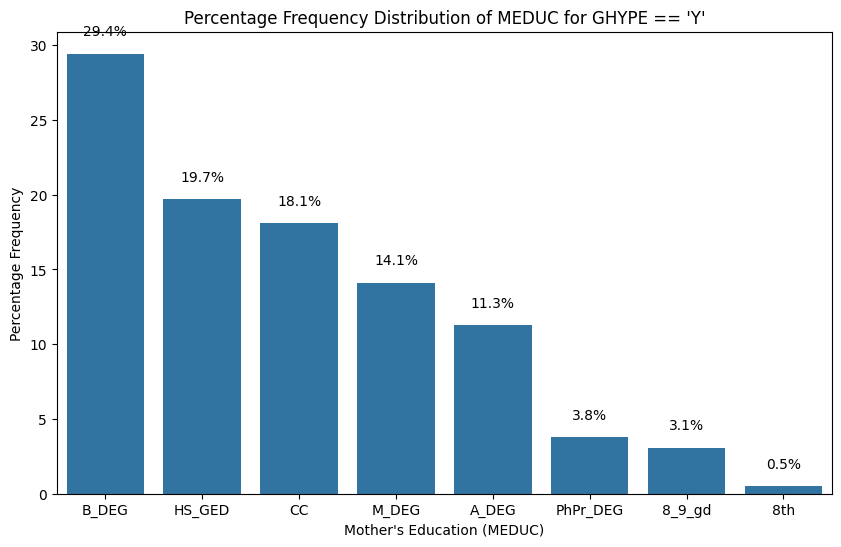

Chi-square statistic: 1300.8546205324683
P-value: 1.0866730295522953e-276
Degrees of freedom: 7
There is a statistically significant association between MEDUC and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Filter the DataFrame for RF_GHYPE == 'Y' before calculating value counts
    filtered_df = combined_df[combined_df['RF_GHYPE'] == 'Y']

    # Check if filtered_df is empty
    if filtered_df.empty:
        print("Error: No rows found where RF_GHYPE == 'Y'. Cannot create contingency table.")
    else:
        # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
        medu_counts = filtered_df['MEDUC'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (MEDUC)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MEDUC for GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MEDUC'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MEDUC and GHYPE.")
    else:
        print("There is no statistically significant association between MEDUC and GHYPE.")

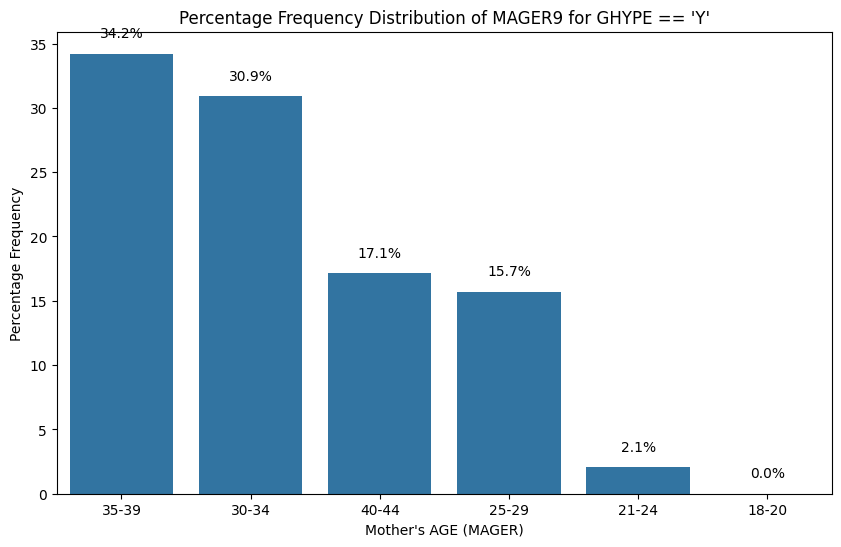

Chi-square statistic: 227.5858173737281
P-value: 3.5205976275727924e-47
Degrees of freedom: 5
There is a statistically significant association between MAGER and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MAGER9' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['MAGER9'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's AGE (MAGER)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MAGER9 for GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MAGER9'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MAGER and RF_GHYPE.")
    else:
        print("There is no statistically significant association between MAGER and RF_GHYPE.")

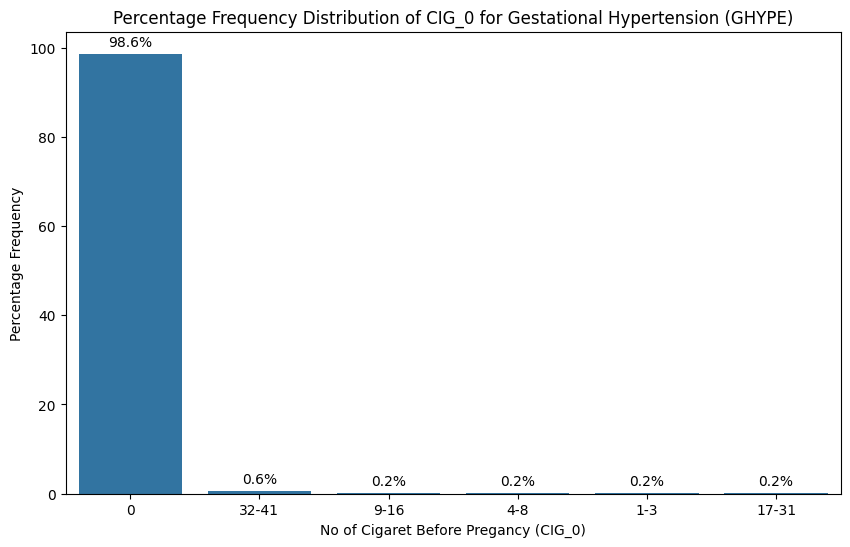

Chi-square statistic: 4.687441187918221
P-value: 0.45520254461099185
Degrees of freedom: 5
There is no statistically significant association between CIG_0 and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'CIG_0' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['CIG_0'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("No of Cigaret Before Pregancy (CIG_0)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of CIG_0 for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['CIG_0'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between CIG_0 and RF_GHYPE.")
    else:
        print("There is no statistically significant association between CIG_0 and RF_GHYPE.")

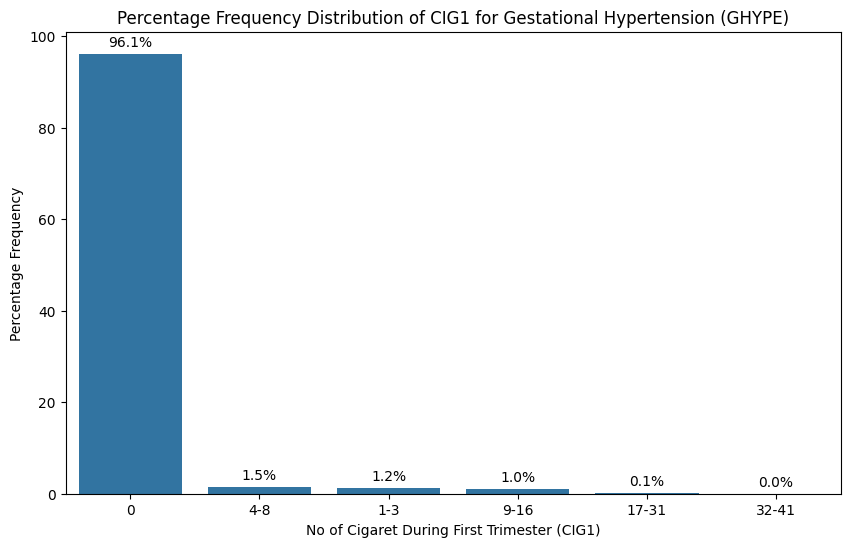

Chi-square statistic: 38.923103454042426
P-value: 2.4609912976504966e-07
Degrees of freedom: 5
There is a statistically significant association between CIG1 and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'CIG1_R' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['CIG1_R'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("No of Cigaret During First Trimester (CIG1)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of CIG1 for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['CIG1_R'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between CIG1 and GHYPE.")
    else:
        print("There is no statistically significant association between CIG1 and GHYPE.")

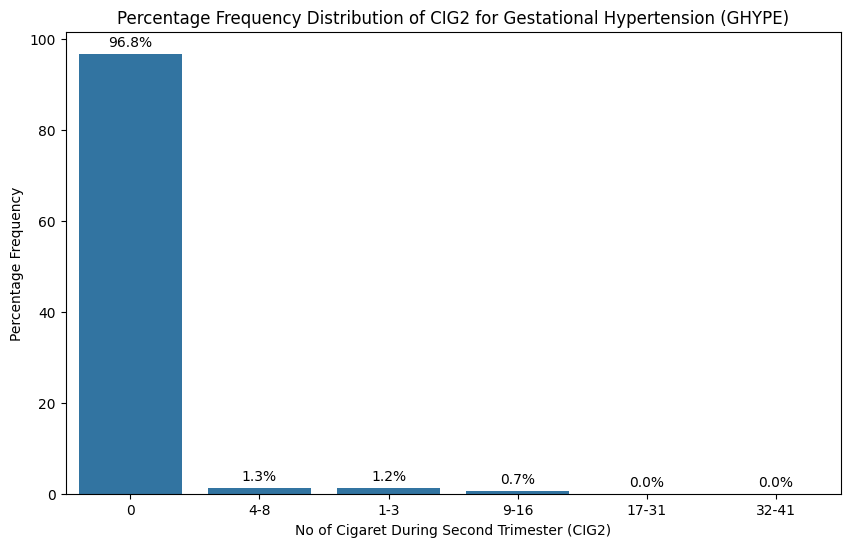

Chi-square statistic: 64.20443604739926
P-value: 1.6386283929686602e-12
Degrees of freedom: 5
There is a statistically significant association between CIG2 and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'CIG2_R' not in combined_df.columns:
    print("Error: 'CIG2_R' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['CIG2_R'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("No of Cigaret During Second Trimester (CIG2)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of CIG2 for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['CIG2_R'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between CIG2 and GHYPE.")
    else:
        print("There is no statistically significant association between CIG2 and GHYPE.")

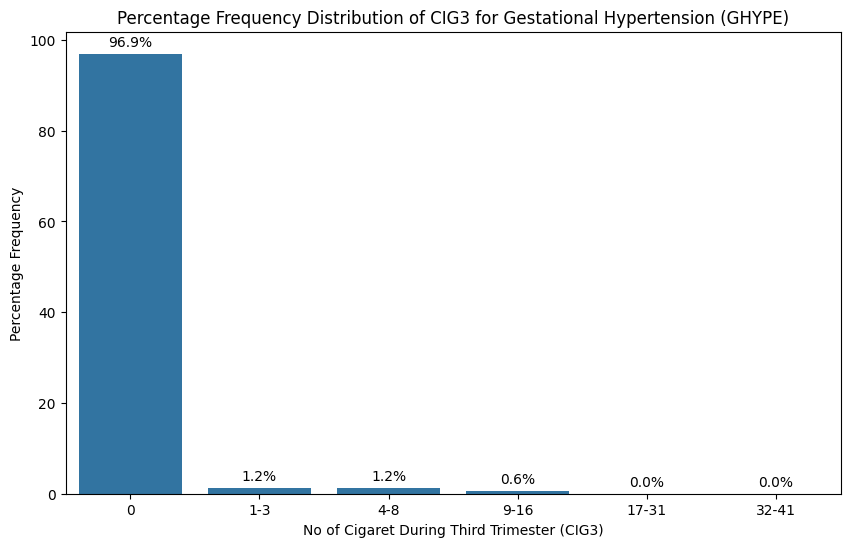

Chi-square statistic: 63.4254609122173
P-value: 2.3764344314737165e-12
Degrees of freedom: 5
There is a statistically significant association between CIG3 and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'CIG3_R' not in combined_df.columns:
    print("Error: 'CIG3_R' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['CIG3_R'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("No of Cigaret During Third Trimester (CIG3)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of CIG3 for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['CIG3_R'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between CIG3 and GHYPE.")
    else:
        print("There is no statistically significant association between CIG3 and GHYPE.")

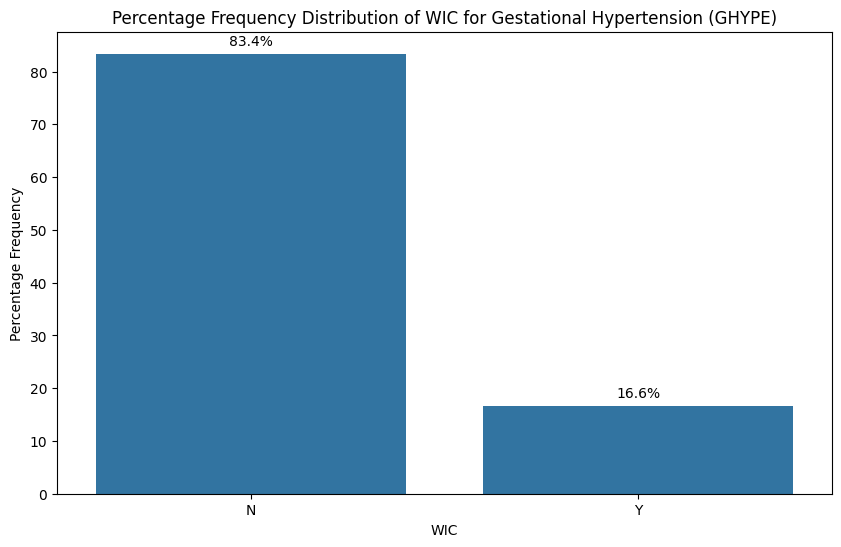

Chi-square statistic: 0.5119185744052634
P-value: 0.4743094973209864
Degrees of freedom: 1
There is no statistically significant association between WIC and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'WIC' not in combined_df.columns:
    print("Error: 'WIC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['WIC'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("WIC")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of WIC for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['WIC'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between WIC and GHYPE.")
    else:
        print("There is no statistically significant association between WIC and GHYPE.")

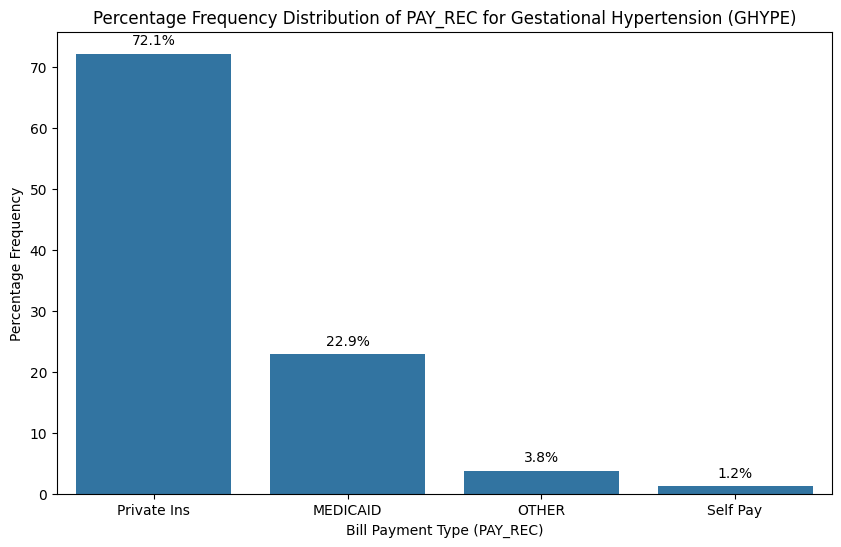

Chi-square statistic: 2261.218858121461
P-value: 0.0
Degrees of freedom: 3
There is a statistically significant association between PAY_REC and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'PAY_REC' not in combined_df.columns:
    print("Error: 'PAY_REC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['PAY_REC'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Bill Payment Type (PAY_REC)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of PAY_REC for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['PAY_REC'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between PAY_REC and GHYPE.")
    else:
        print("There is no statistically significant association between PAY_REC and GHYPE.")

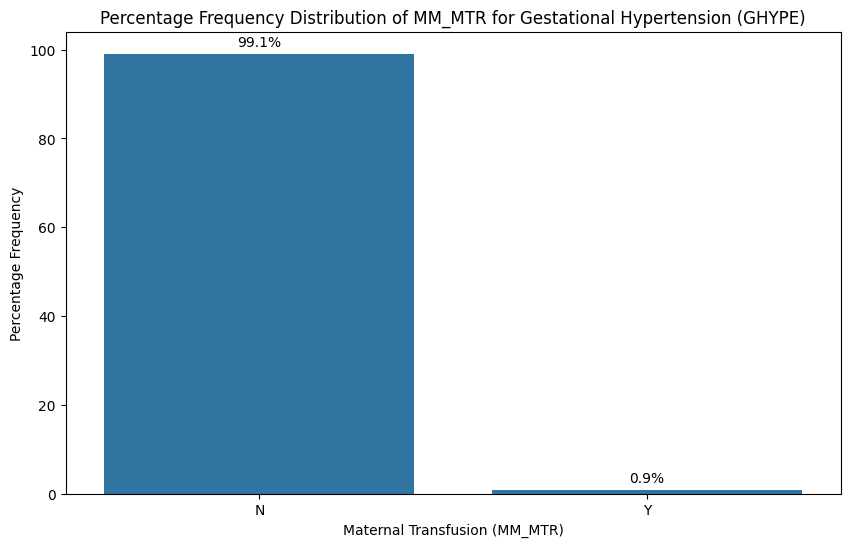

Chi-square statistic: 431.6727926259348
P-value: 7.02759132707087e-96
Degrees of freedom: 1
There is a statistically significant association between MM_MTR and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MM_MTR' not in combined_df.columns:
    print("Error: 'MM_MTR' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['MM_MTR'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Maternal Transfusion (MM_MTR)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MM_MTR for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MM_MTR'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MM_MTR and GHYPE.")
    else:
        print("There is no statistically significant association between MM_MTR and GHYPE.")

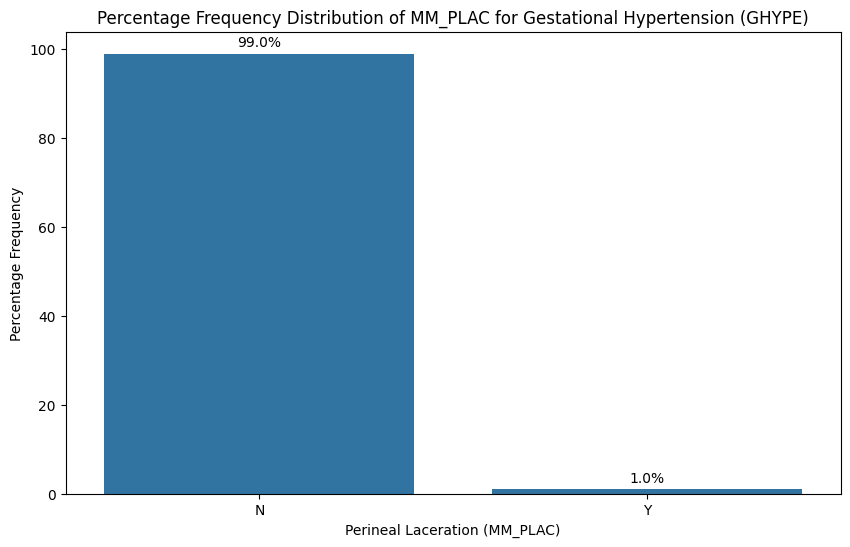

Chi-square statistic: 2.687267058404903
P-value: 0.10115317263771399
Degrees of freedom: 1
There is no statistically significant association between MM_PLAC and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MM_PLAC' not in combined_df.columns:
    print("Error: 'MM_PLAC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['MM_PLAC'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Perineal Laceration (MM_PLAC)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MM_PLAC for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MM_PLAC'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MM_PLAC and GHYPE.")
    else:
        print("There is no statistically significant association between MM_PLAC and GHYPE.")

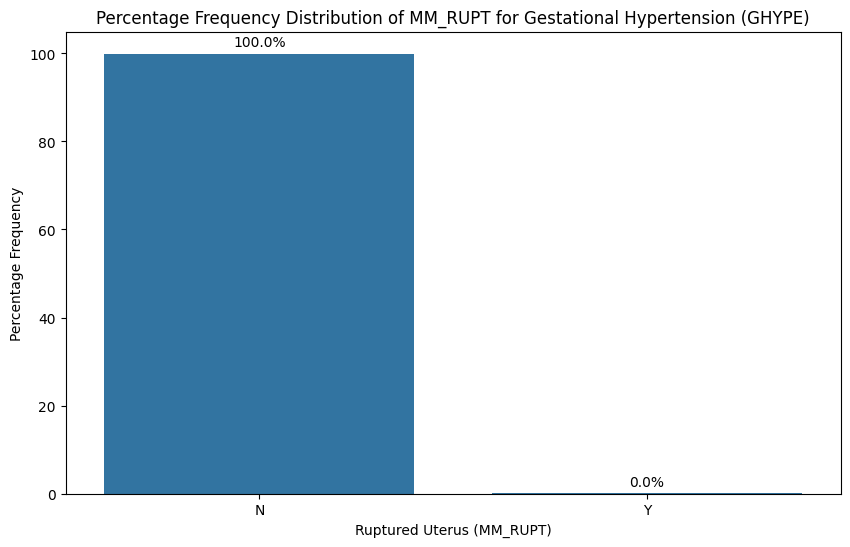

Chi-square statistic: 0.05394781426314378
P-value: 0.8163308842611733
Degrees of freedom: 1
There is no statistically significant association between MM_RUPT and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MM_RUPT' not in combined_df.columns:
    print("Error: 'MM_RUPT' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['MM_RUPT'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Ruptured Uterus (MM_RUPT)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MM_RUPT for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MM_RUPT'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MM_RUPT and GHYPE.")
    else:
        print("There is no statistically significant association between MM_RUPT and GHYPE.")

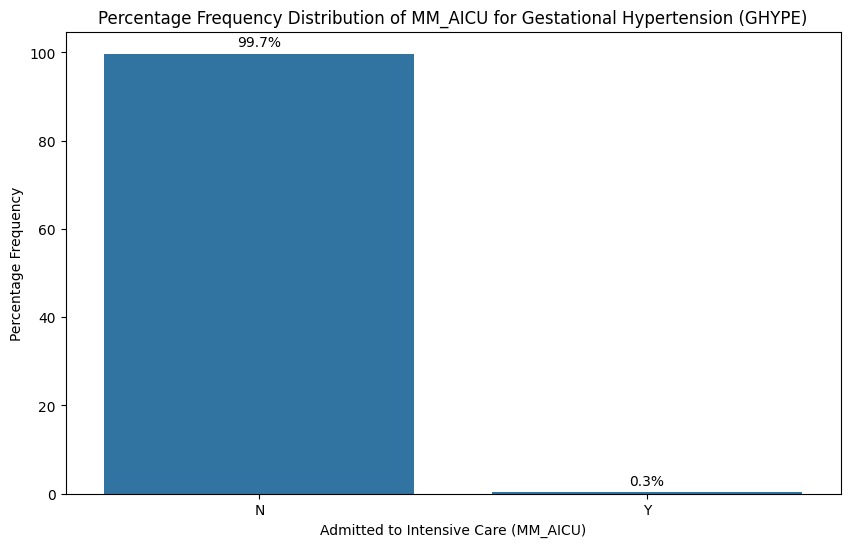

Chi-square statistic: 196.30233029188253
P-value: 1.339007579249722e-44
Degrees of freedom: 1
There is a statistically significant association between MM_AICU and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MM_AICU' not in combined_df.columns:
    print("Error: 'MM_AICU' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['MM_AICU'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Admitted to Intensive Care (MM_AICU)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MM_AICU for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MM_AICU'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MM_AICU and GHYPE.")
    else:
        print("There is no statistically significant association between MM_AICU and GHYPE.")

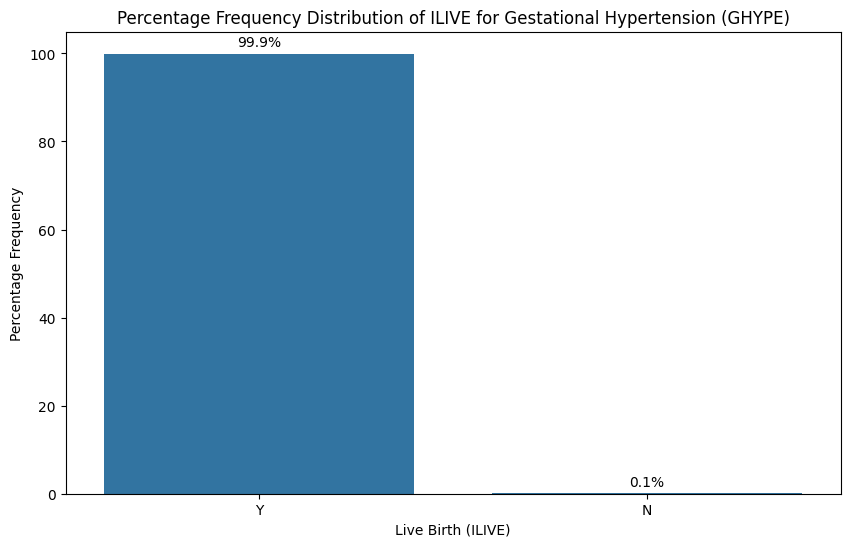

Chi-square statistic: 0.09266703887801407
P-value: 0.7608135597988316
Degrees of freedom: 1
There is no statistically significant association between ILIVE and GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'ILIVE' not in combined_df.columns:
    print("Error: 'ILIVE' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['ILIVE'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Live Birth (ILIVE)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of ILIVE for Gestational Hypertension (GHYPE)")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['ILIVE'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between ILIVE and GHYPE.")
    else:
        print("There is no statistically significant association between ILIVE and GHYPE.")

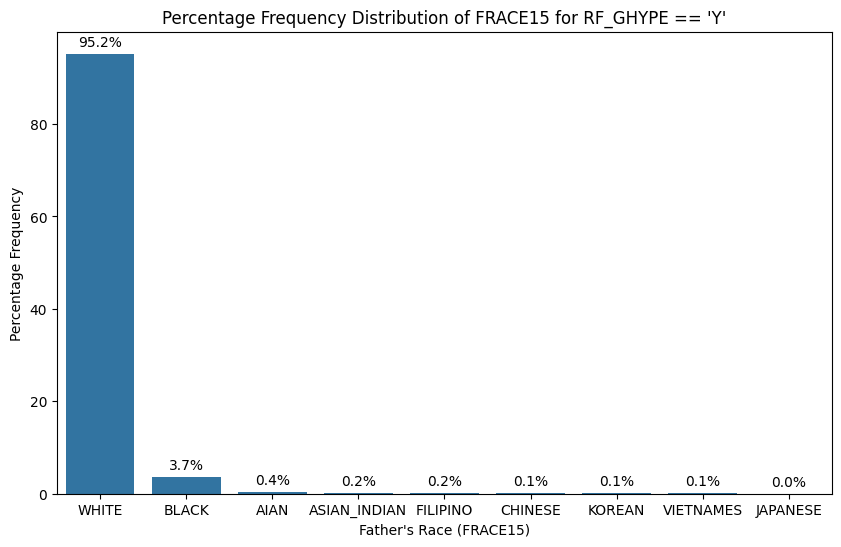

Chi-square statistic: 21.354491828638125
P-value: 0.006263048143551237
Degrees of freedom: 8
There is a statistically significant association between FRACE15 and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['FRACE15'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Father's Race (FRACE15)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of FRACE15 for RF_GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['FRACE15'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between FRACE15 and RF_GHYPE.")
    else:
        print("There is no statistically significant association between FRACE15 and RF_GHYPE.")

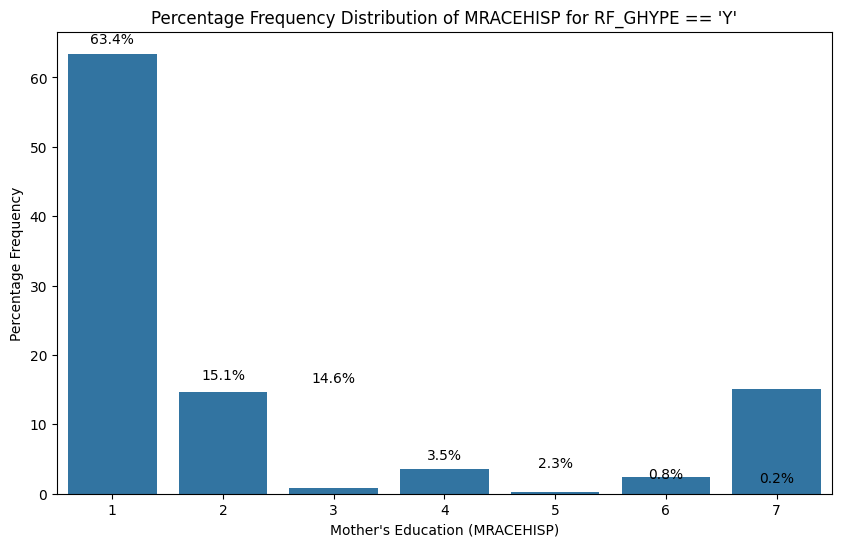

Chi-square statistic: 5106.529768169004
P-value: 0.0
Degrees of freedom: 6
There is a statistically significant association between MRACEHISP and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['MRACEHISP'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (MRACEHISP)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MRACEHISP for RF_GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MRACEHISP'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MRACEHISP and RF_GHYPE.")
    else:
        print("There is no statistically significant association between MRACEHISP and RF_GHYPE.")

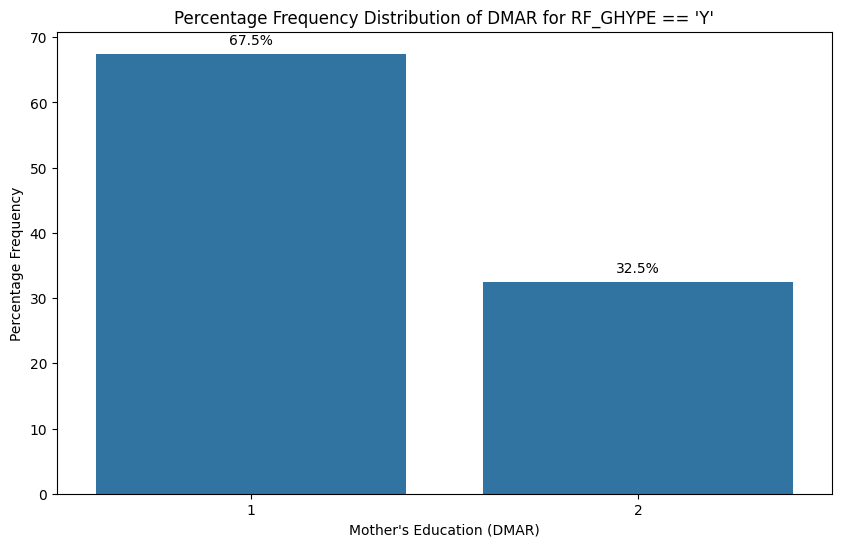

Chi-square statistic: 309.02604594015247
P-value: 3.5595499158947963e-69
Degrees of freedom: 1
There is a statistically significant association between DMAR and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['DMAR'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (DMAR)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of DMAR for RF_GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['DMAR'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between DMAR and RF_GHYPE.")
    else:
        print("There is no statistically significant association between DMAR and RF_GHYPE.")

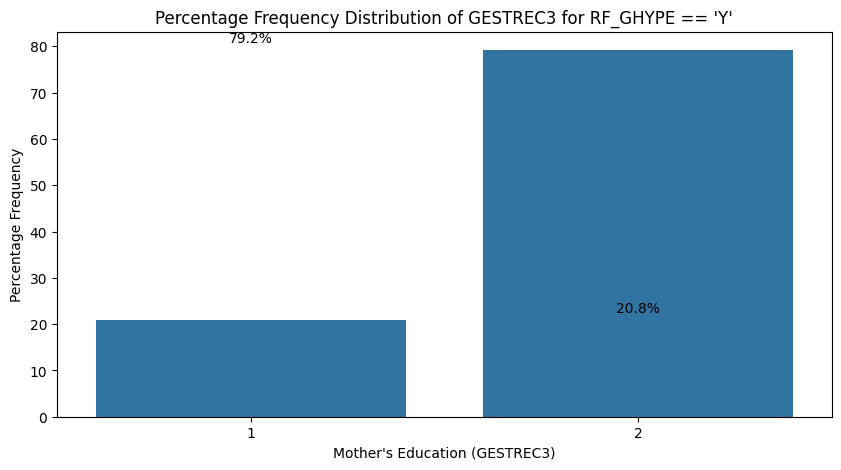

Chi-square statistic: 26194.57141147484
P-value: 0.0
Degrees of freedom: 1
There is a statistically significant association between GESTREC3 and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['GESTREC3'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (GESTREC3)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of GESTREC3 for RF_GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['GESTREC3'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between GESTREC3 and RF_GHYPE.")
    else:
        print("There is no statistically significant association between GESTREC3 and RF_GHYPE.")

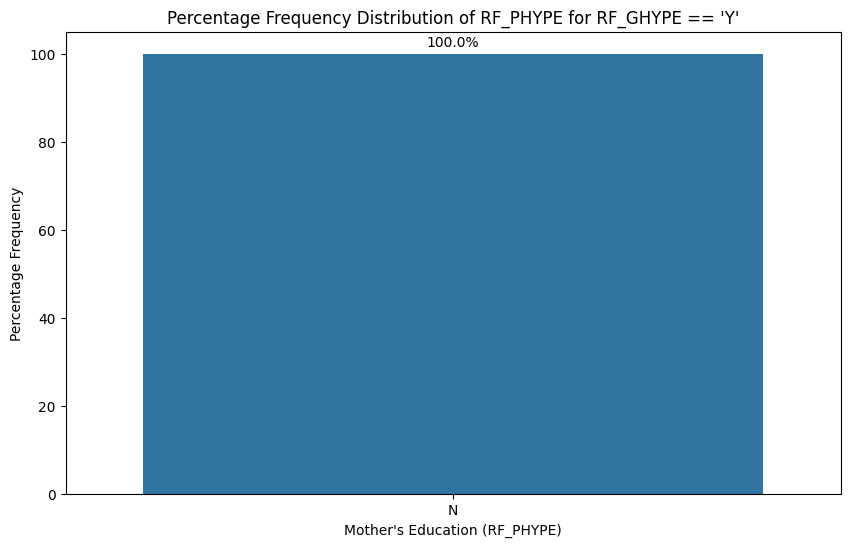

Chi-square statistic: 8296.18733779822
P-value: 0.0
Degrees of freedom: 1
There is a statistically significant association between RF_PHYPE and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['RF_PHYPE'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (RF_PHYPE)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of RF_PHYPE for RF_GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['RF_PHYPE'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between RF_PHYPE and RF_GHYPE.")
    else:
        print("There is no statistically significant association between RF_PHYPE and RF_GHYPE.")

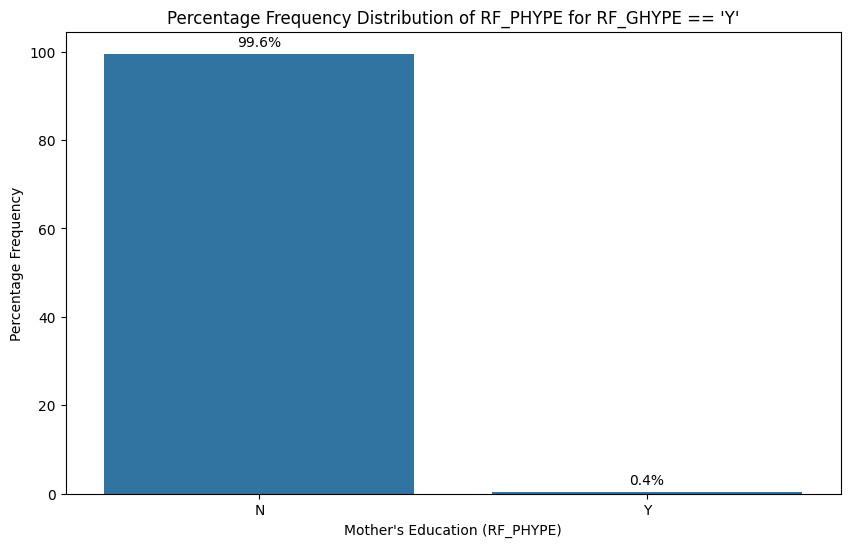

Chi-square statistic: 227.21604034210264
P-value: 2.412645549067394e-51
Degrees of freedom: 1
There is a statistically significant association between RF_EHYPE and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['RF_EHYPE'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (RF_PHYPE)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of RF_PHYPE for RF_GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['RF_EHYPE'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between RF_EHYPE and RF_GHYPE.")
    else:
        print("There is no statistically significant association between RF_EHYPE and RF_GHYPE.")

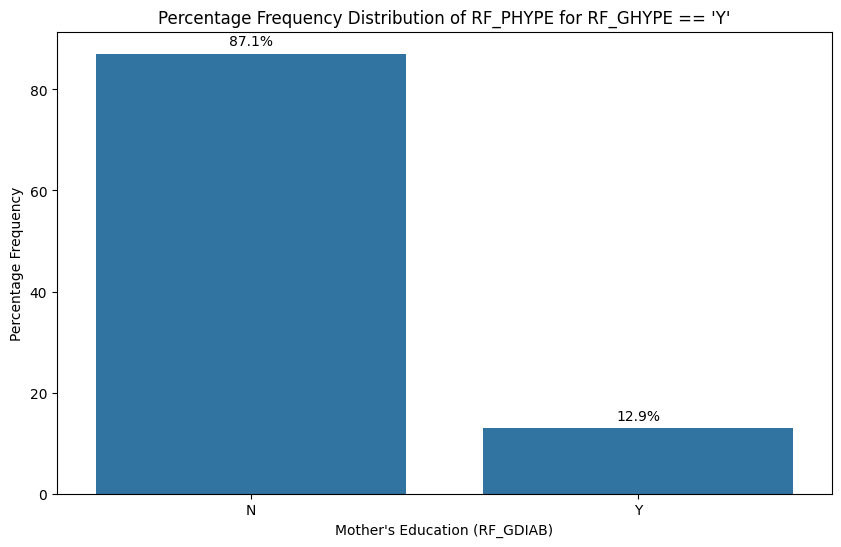

Chi-square statistic: 7769.088470934639
P-value: 0.0
Degrees of freedom: 1
There is a statistically significant association between RF_GDIAB and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['RF_GDIAB'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (RF_GDIAB)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of RF_PHYPE for RF_GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['RF_GDIAB'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between RF_GDIAB and RF_GHYPE.")
    else:
        print("There is no statistically significant association between RF_GDIAB and RF_GHYPE.")

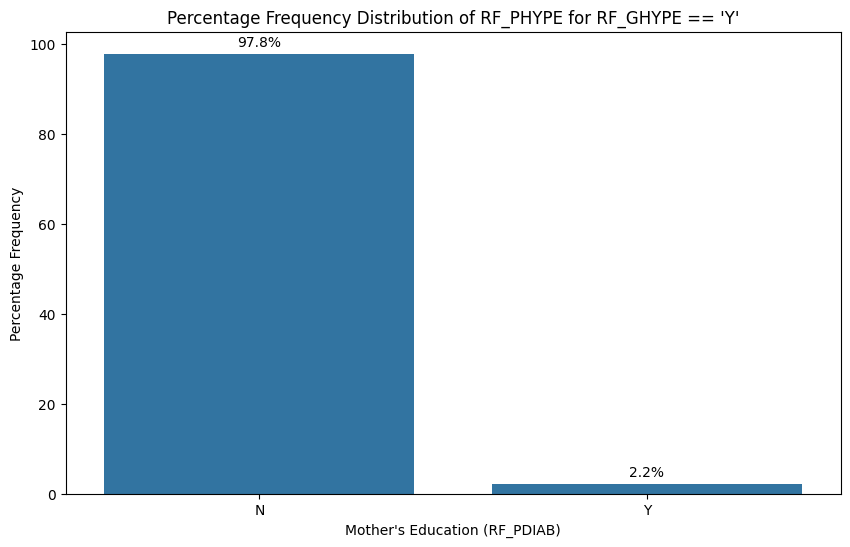

Chi-square statistic: 2704.501780703097
P-value: 0.0
Degrees of freedom: 1
There is a statistically significant association between RF_PDIAB and RF_GHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_GHYPE'] == 'Y']['RF_PDIAB'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (RF_PDIAB)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of RF_PHYPE for RF_GHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['RF_PDIAB'], combined_df['RF_GHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between RF_PDIAB and RF_GHYPE.")
    else:
        print("There is no statistically significant association between RF_PDIAB and RF_GHYPE.")

In [ ]:
# prompt: Multivariable logistic regression analysis of Factors associated with RF_GHYPE

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the independent variables (predictors)
independent_variables = ['MEDUC', 'MRACEHISP', 'BMI_R', 'MAGER9', 'CIG_0', 'CIG1_R', 'CIG2_R', 'CIG3_R', 'WIC', 'PAY_REC', 'MM_MTR', 'MM_PLAC', 'MM_RUPT', 'MM_AICU', 'ILIVE']

# Create the formula string for the logistic regression
formula = 'RF_GHYPE ~ ' + ' + '.join(independent_variables)

# Convert 'RF_GHYPE' to numeric (0 and 1)
# Assuming 'Y' is the positive class (1) and 'N' is the negative class (0)
combined_df['RF_GHYPE'] = combined_df['RF_GHYPE'].map({'Y': 1, 'N': 0}) #This line was added to map 'Y' to 1 and 'N' to 0

# Fit the logistic regression model
model = smf.logit(formula=formula, data=combined_df).fit()

# Print the model summary
print(model.summary())

# You can further analyze the results, such as odds ratios and p-values
# to determine the statistical significance of each predictor.

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# plot Multivariable logistic regression analysis of Factors associated with RF_GHYPE, further analyze the results, such as odds ratios and p-values

import numpy as np
# Assuming combined_df is already loaded and preprocessed as in the provided code

# ... (Previous code remains the same)


# Accessing Odds Ratios and p-values from the model summary
params = model.params
conf = model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['Lower CI', 'Upper CI', 'Odds Ratio']
print(np.exp(conf))

# Alternatively, you can access the p-values directly:
p_values = model.pvalues
print("\nP-values:\n", p_values)

# Example of interpreting the results:
# Let's say we want to examine the effect of 'MEDUC'
odds_ratio_meduc = np.exp(params['MEDUC'])
p_value_meduc = p_values['MEDUC']
print(f"\nOdds Ratio for MEDUC: {odds_ratio_meduc}")
print(f"P-value for MEDUC: {p_value_meduc}")

# Interpretation example:
if p_value_meduc < 0.05:  # Example significance level of 0.05
    print("Mother's education is statistically significantly associated with RF_GHYPE.")
    if odds_ratio_meduc > 1:
        print("Higher mother's education is associated with higher odds of RF_GHYPE.")
    else:
        print("Higher mother's education is associated with lower odds of RF_GHYPE.")
else:
    print("Mother's education is not statistically significantly associated with RF_GHYPE.")

# Repeat this analysis for other independent variables as needed.


              Lower CI  Upper CI  Odds Ratio
Intercept     0.030999  0.043507    0.036724
WIC[T.Y]      0.930844  0.952197    0.941460
MM_MTR[T.Y]   1.963887  2.158256    2.058779
MM_PLAC[T.Y]  1.059062  1.162660    1.109652
MM_RUPT[T.Y]  0.696409  1.068454    0.862601
MM_AICU[T.Y]  1.852644  2.189901    2.014226
ILIVE[T.Y]    0.877752  1.226993    1.037784
MEDUC         1.031174  1.037379    1.034272
MRACEHISP     0.948412  0.952178    0.950294
BMI_R         1.416012  1.424984    1.420491
MAGER9        0.962017  0.969969    0.965985
CIG_0         1.001807  1.005540    1.003672
CIG1_R        0.992065  1.051795    1.021494
CIG2_R        0.879186  0.970012    0.923483
CIG3_R        0.932563  1.018065    0.974376
PAY_REC       1.007722  1.021779    1.014726

P-values:
 Intercept        0.000000e+00
WIC[T.Y]         1.880743e-25
MM_MTR[T.Y]     1.191394e-197
MM_PLAC[T.Y]     1.241374e-05
MM_RUPT[T.Y]     1.758691e-01
MM_AICU[T.Y]     1.555818e-60
ILIVE[T.Y]       6.642670e-01
MEDUC        

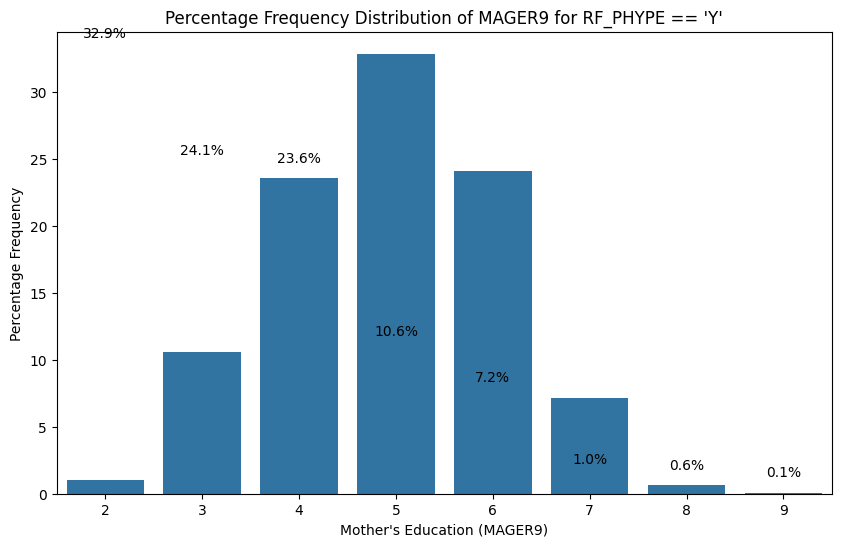

Chi-square statistic: 9003.32384875657
P-value: 0.0
Degrees of freedom: 8
There is a statistically significant association between MAGER9 and PHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['MAGER9'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (MAGER9)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MAGER9 for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MAGER9'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MAGER9 and PHYPE.")
    else:
        print("There is no statistically significant association between MAGER9 and PHYPE.")

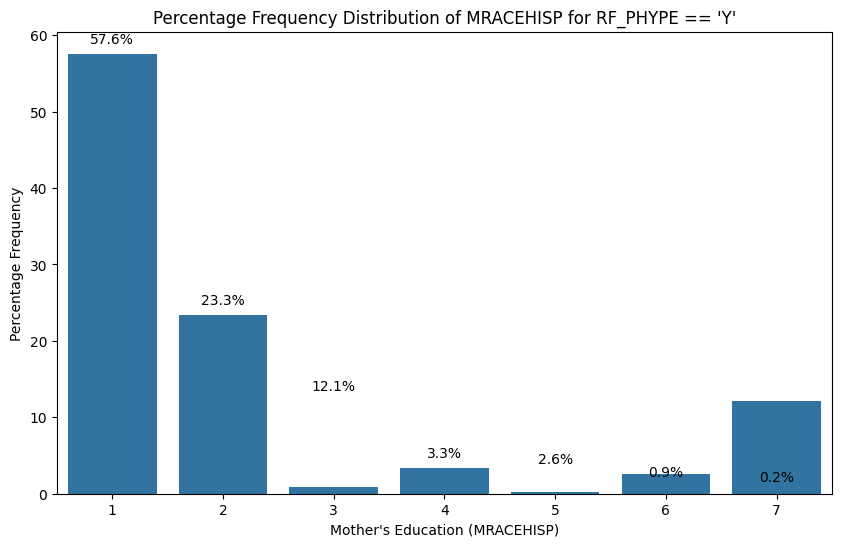

Chi-square statistic: 8794.163405136478
P-value: 0.0
Degrees of freedom: 6
There is a statistically significant association between MRACEHISP and PHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['MRACEHISP'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (MRACEHISP)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MRACEHISP for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MRACEHISP'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MRACEHISP and PHYPE.")
    else:
        print("There is no statistically significant association between MRACEHISP and PHYPE.")

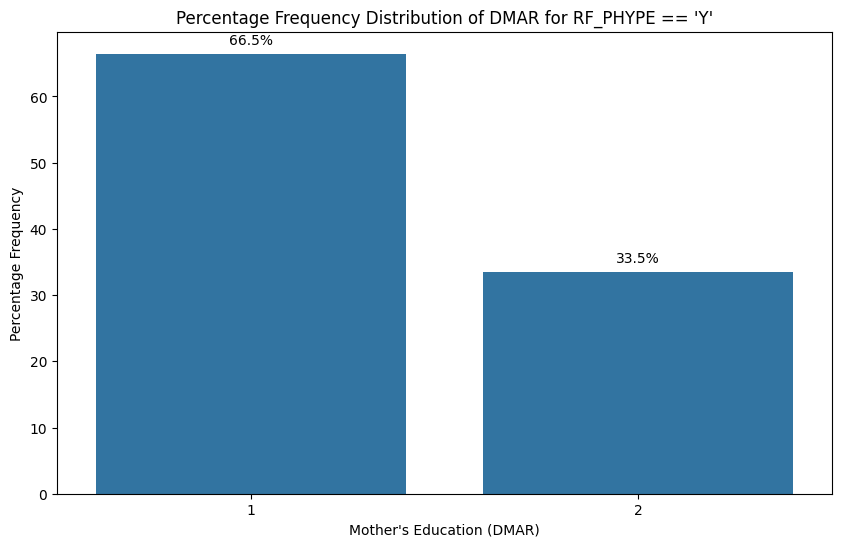

Chi-square statistic: 238.29697646629475
P-value: 9.24796274769105e-54
Degrees of freedom: 1
There is a statistically significant association between DMAR and PHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['DMAR'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (DMAR)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of DMAR for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['DMAR'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between DMAR and PHYPE.")
    else:
        print("There is no statistically significant association between DMAR and PHYPE.")

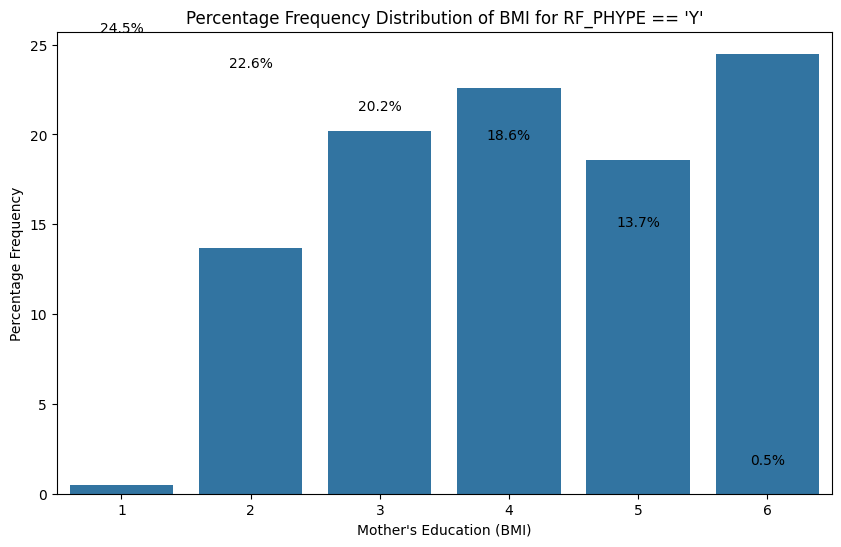

Chi-square statistic: 67505.05034574553
P-value: 0.0
Degrees of freedom: 5
There is a statistically significant association between BMI and PHYPE.


In [ ]:
# prompt: plot percentage frequency data distribution of RF_GHYPE == Y against column 'MEDU' label the plot with the percentage values and calculating significant difference

# Assuming combined_df and RF_GHYPE_Y are already defined as in the previous code

# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['BMI_R'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (BMI)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of BMI for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['BMI_R'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between BMI and PHYPE.")
    else:
        print("There is no statistically significant association between BMI and PHYPE.")

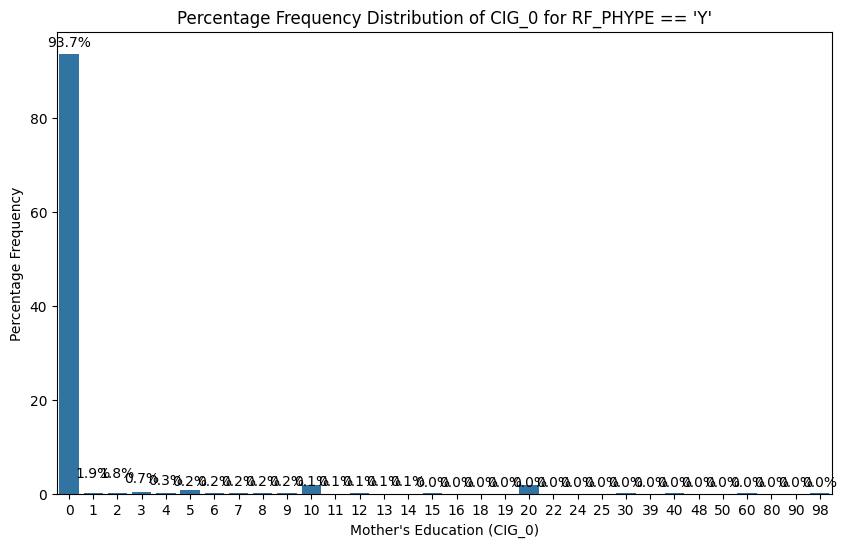

Chi-square statistic: 1014.2885623073023
P-value: 2.550890367306232e-175
Degrees of freedom: 57
There is a statistically significant association between CIG_0 and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['CIG_0'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (CIG_0)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of CIG_0 for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['CIG_0'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between CIG_0 and PHYPE.")
    else:
        print("There is no statistically significant association between CIG_0 and PHYPE.")

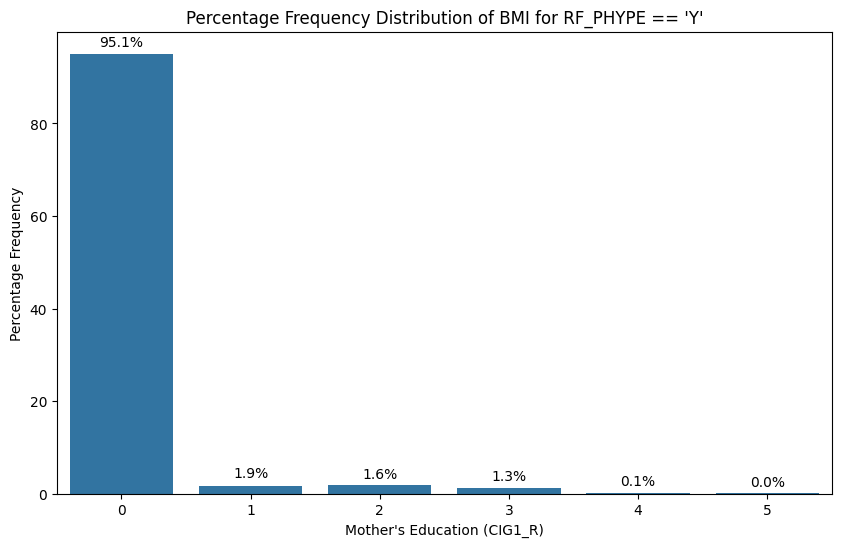

Chi-square statistic: 805.2143449374037
P-value: 8.614493240089194e-172
Degrees of freedom: 5
There is a statistically significant association between CIG1_R and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['CIG1_R'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (CIG1_R)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of BMI for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['CIG1_R'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between CIG1_R and PHYPE.")
    else:
        print("There is no statistically significant association between CIG1_R and PHYPE.")

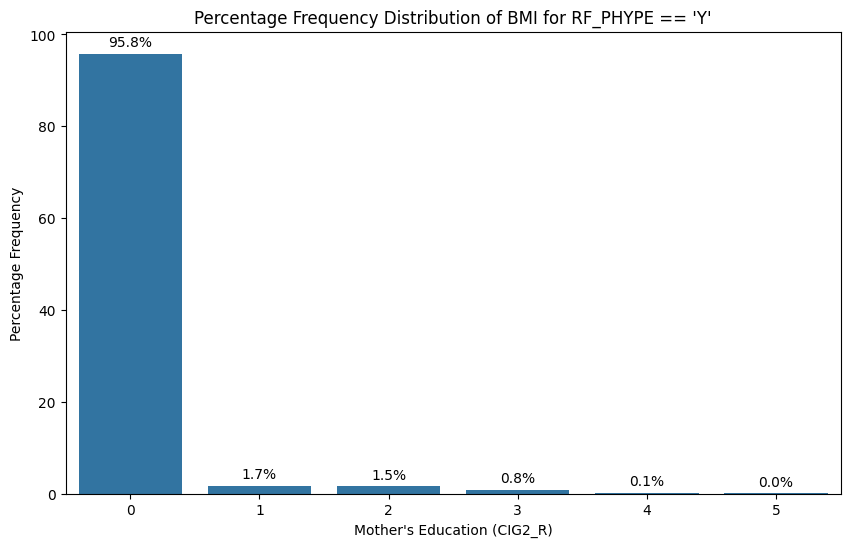

Chi-square statistic: 686.1030586390347
P-value: 4.964942483839937e-146
Degrees of freedom: 5
There is a statistically significant association between CIG2_R and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['CIG2_R'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (CIG2_R)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of BMI for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['CIG2_R'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between CIG2_R and PHYPE.")
    else:
        print("There is no statistically significant association between CIG2_R and PHYPE.")

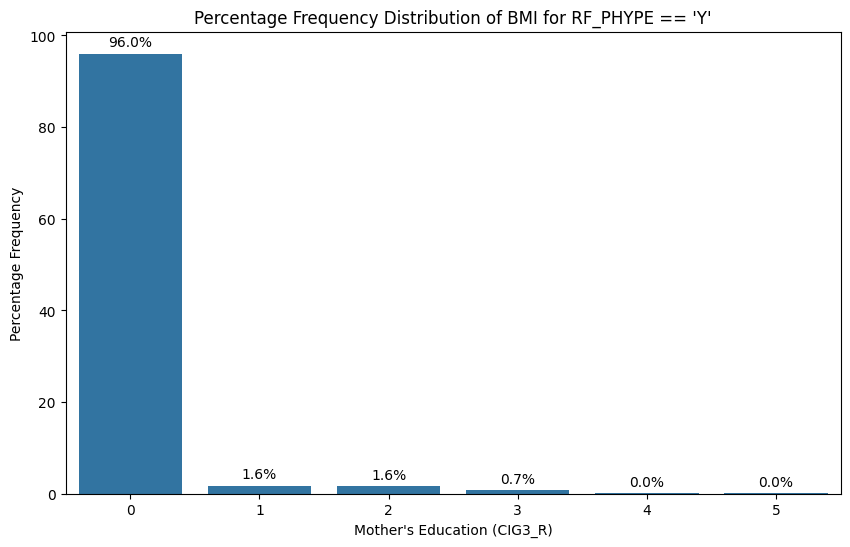

Chi-square statistic: 657.9120544014353
P-value: 6.169670796382738e-140
Degrees of freedom: 5
There is a statistically significant association between CIG3_R and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['CIG3_R'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (CIG3_R)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of BMI for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['CIG3_R'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between CIG3_R and PHYPE.")
    else:
        print("There is no statistically significant association between CIG3_R and PHYPE.")

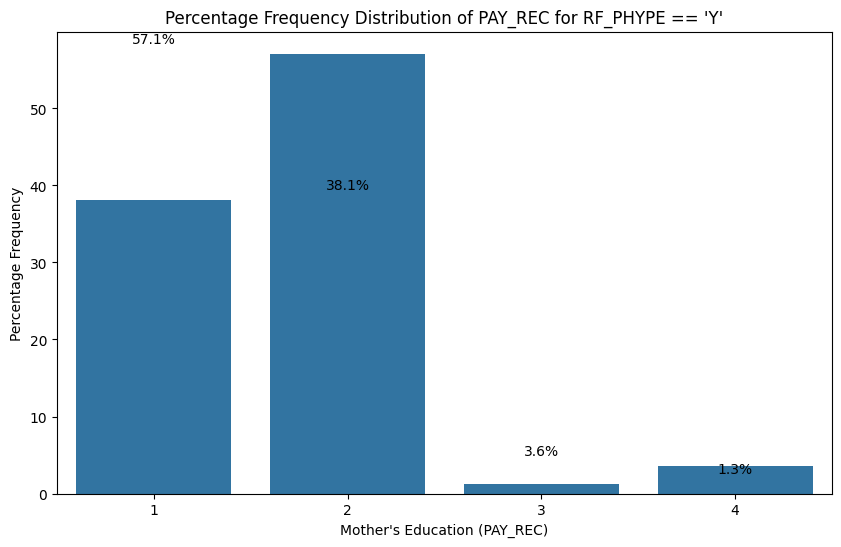

Chi-square statistic: 1676.4062666388102
P-value: 0.0
Degrees of freedom: 3
There is a statistically significant association between PAY_REC and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['PAY_REC'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (PAY_REC)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of PAY_REC for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['PAY_REC'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between PAY_REC and PHYPE.")
    else:
        print("There is no statistically significant association between PAY_REC and PHYPE.")

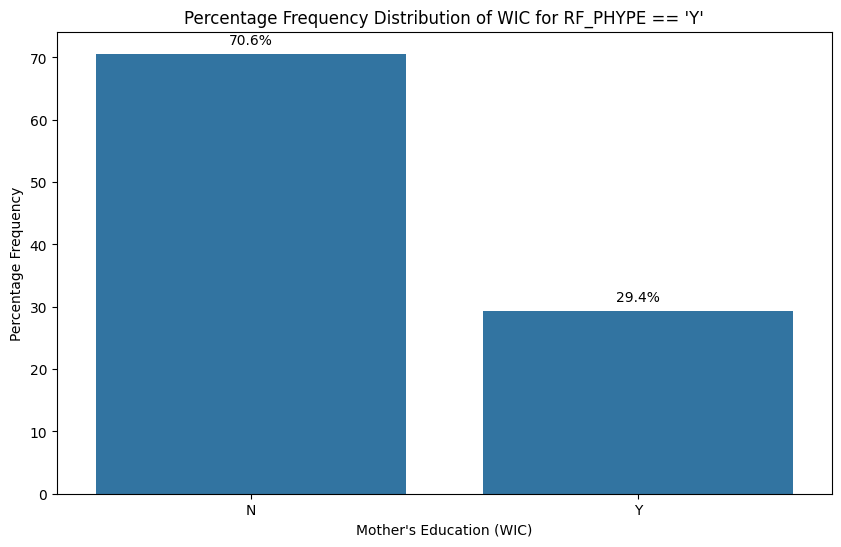

Chi-square statistic: 844.3858612502746
P-value: 1.2080827920633503e-185
Degrees of freedom: 1
There is a statistically significant association between WIC and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['WIC'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (WIC)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of WIC for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['WIC'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between WIC and PHYPE.")
    else:
        print("There is no statistically significant association between WIC and PHYPE.")

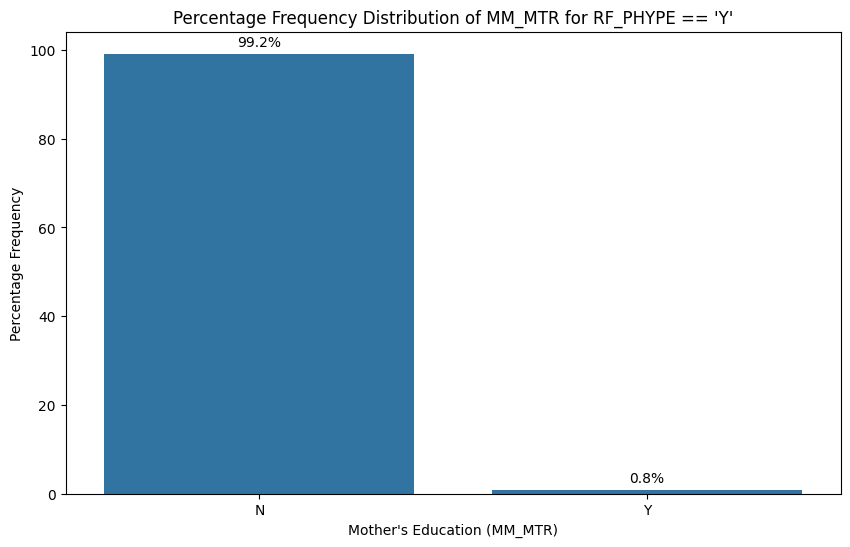

Chi-square statistic: 159.31950582194918
P-value: 1.5934191760339938e-36
Degrees of freedom: 1
There is a statistically significant association between MM_MTR and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['MM_MTR'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (MM_MTR)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MM_MTR for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MM_MTR'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MM_MTR and PHYPE.")
    else:
        print("There is no statistically significant association between MM_MTR and PHYPE.")

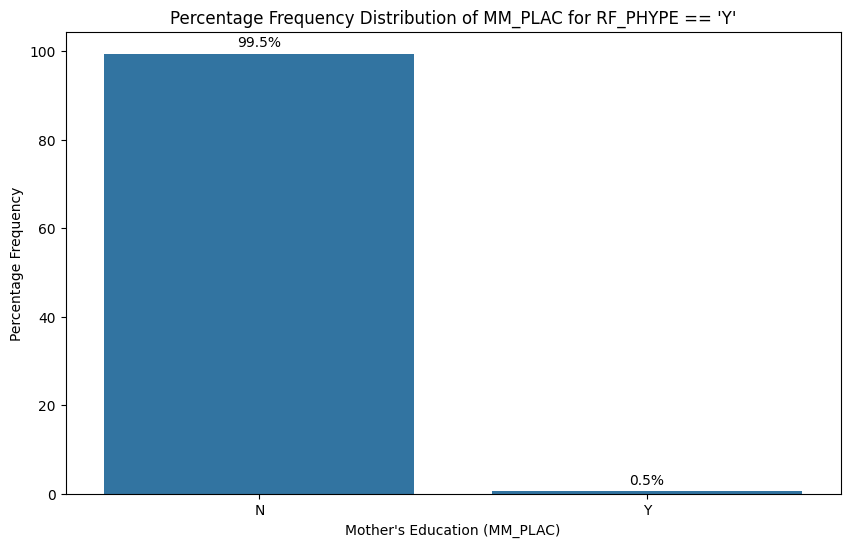

Chi-square statistic: 80.18039370385684
P-value: 3.4174137049628963e-19
Degrees of freedom: 1
There is a statistically significant association between MM_PLAC and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['MM_PLAC'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (MM_PLAC)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MM_PLAC for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MM_PLAC'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MM_PLAC and PHYPE.")
    else:
        print("There is no statistically significant association between MM_PLAC and PHYPE.")

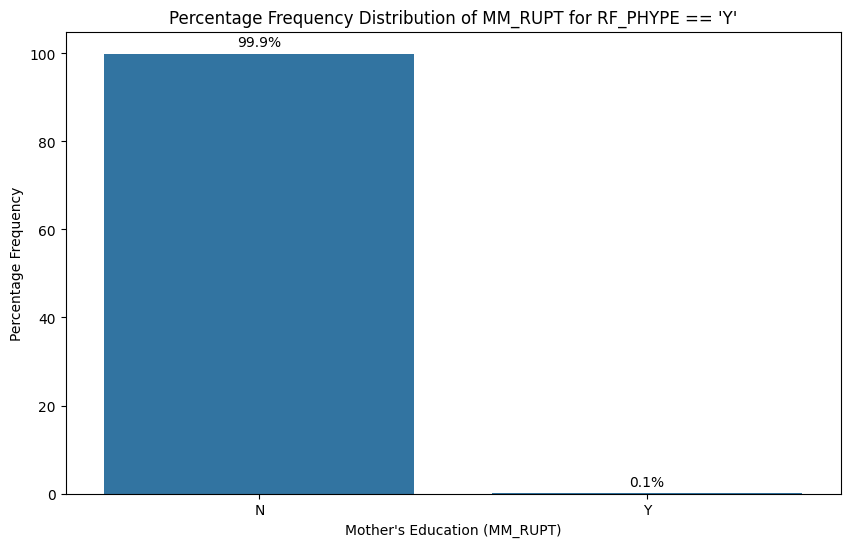

Chi-square statistic: 4.941683094949676
P-value: 0.02621649620527677
Degrees of freedom: 1
There is a statistically significant association between MM_RUPT and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['MM_RUPT'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (MM_RUPT)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MM_RUPT for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MM_RUPT'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MM_RUPT and PHYPE.")
    else:
        print("There is no statistically significant association between MM_RUPT and PHYPE.")

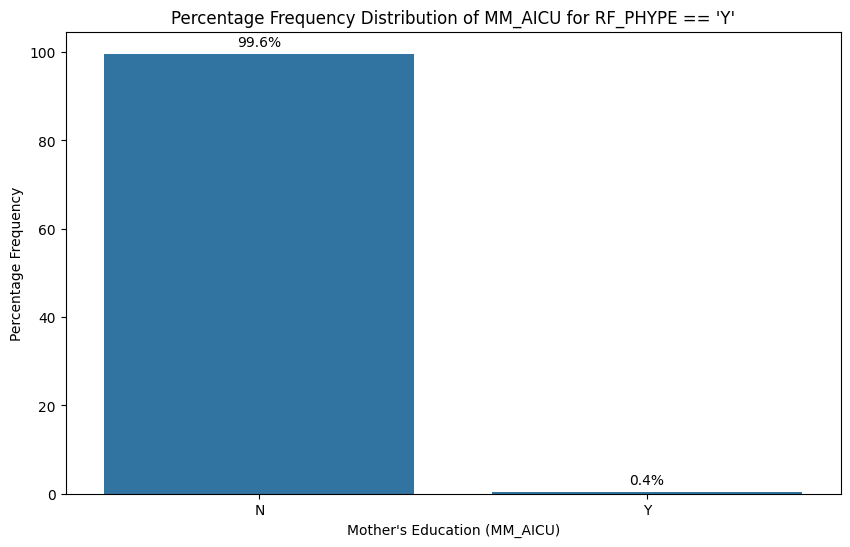

Chi-square statistic: 260.0782255702063
P-value: 1.6499274376756155e-58
Degrees of freedom: 1
There is a statistically significant association between MM_AICU and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['MM_AICU'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (MM_AICU)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of MM_AICU for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['MM_AICU'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between MM_AICU and PHYPE.")
    else:
        print("There is no statistically significant association between MM_AICU and PHYPE.")

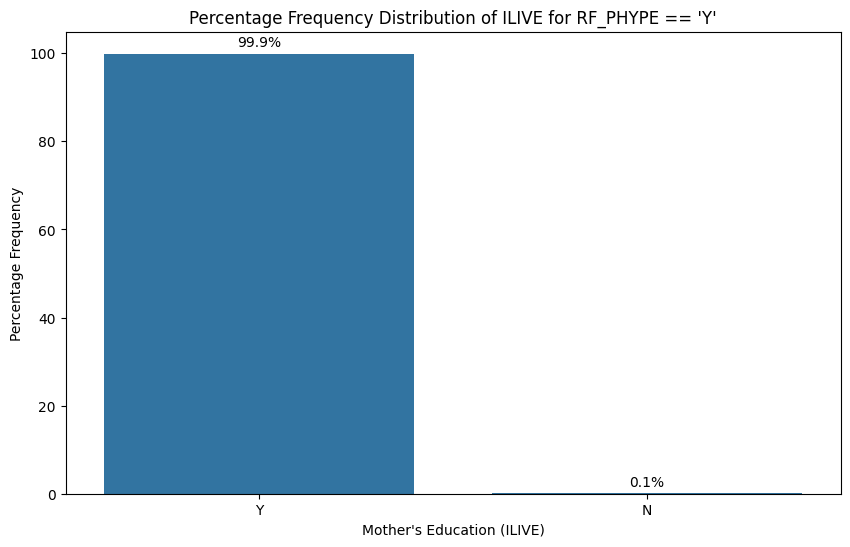

Chi-square statistic: 13.292578817809366
P-value: 0.0002664587227944052
Degrees of freedom: 1
There is a statistically significant association between ILIVE and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['ILIVE'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (ILIVE)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of ILIVE for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['ILIVE'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between ILIVE and PHYPE.")
    else:
        print("There is no statistically significant association between ILIVE and PHYPE.")

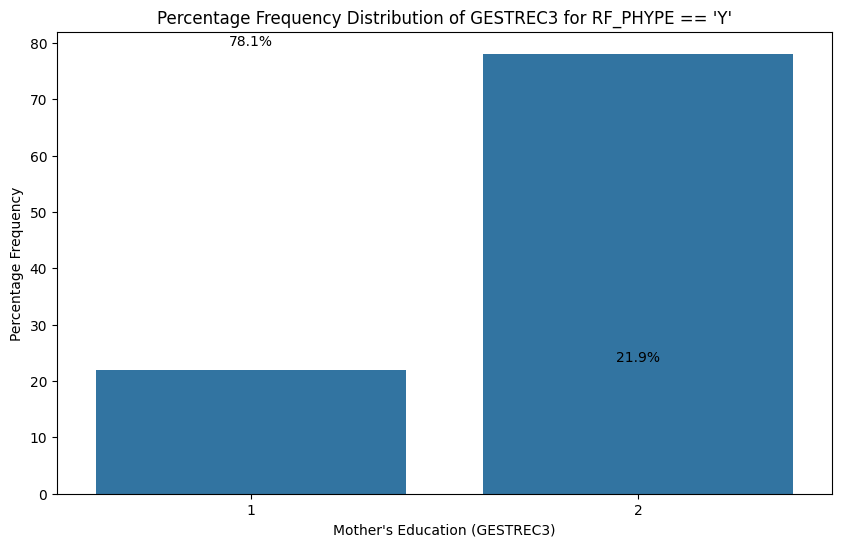

Chi-square statistic: 9251.347209837872
P-value: 0.0
Degrees of freedom: 1
There is a statistically significant association between GESTREC3 and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['GESTREC3'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (GESTREC3)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of GESTREC3 for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['GESTREC3'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between GESTREC3 and PHYPE.")
    else:
        print("There is no statistically significant association between GESTREC3and PHYPE.")

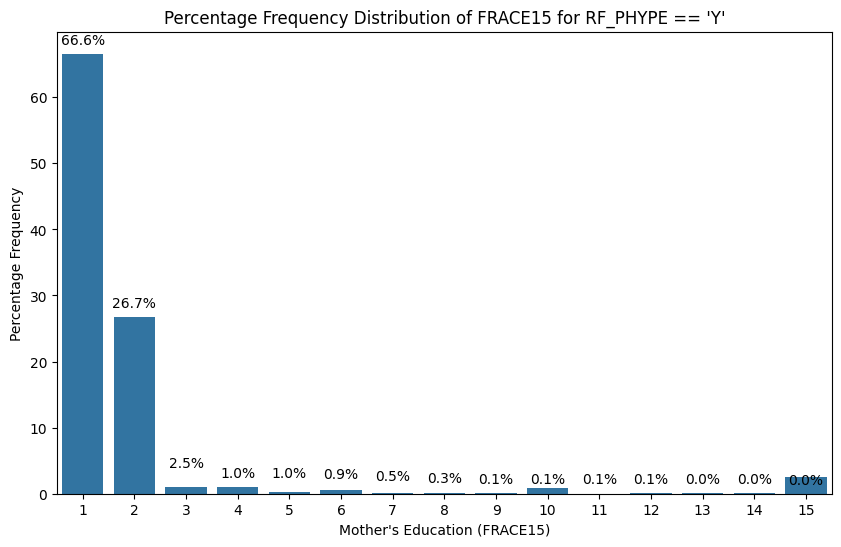

Chi-square statistic: 6643.340961396973
P-value: 0.0
Degrees of freedom: 14
There is a statistically significant association between FRACE15 and PHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_PHYPE'] == 'Y']['FRACE15'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (FRACE15)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of FRACE15 for RF_PHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['FRACE15'], combined_df['RF_PHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between FRACE15 and PHYPE.")
    else:
        print("There is no statistically significant association between FRACE15 and PHYPE.")

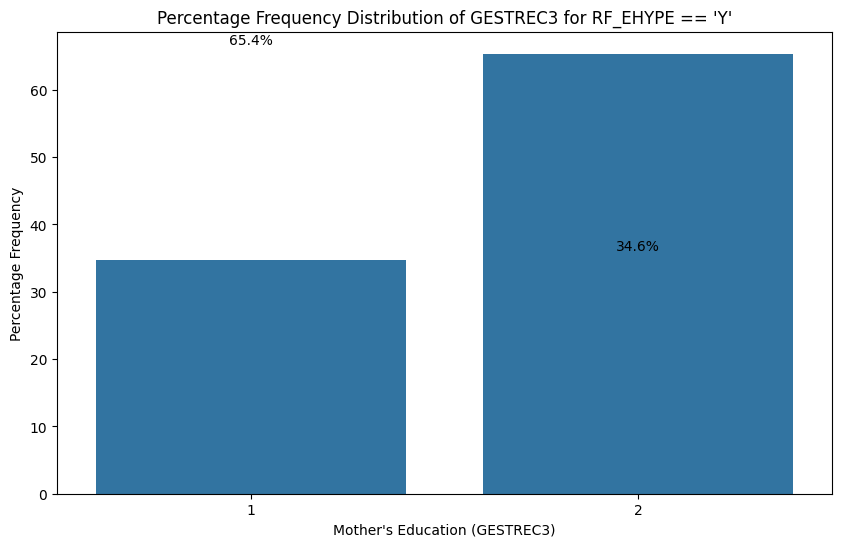

Chi-square statistic: 3908.286947850276
P-value: 0.0
Degrees of freedom: 1
There is a statistically significant association between GESTREC3 and EHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_EHYPE'] == 'Y']['GESTREC3'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (GESTREC3)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of GESTREC3 for RF_EHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['GESTREC3'], combined_df['RF_EHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between GESTREC3 and EHYPE.")
    else:
        print("There is no statistically significant association between GESTREC3 and EHYPE.")

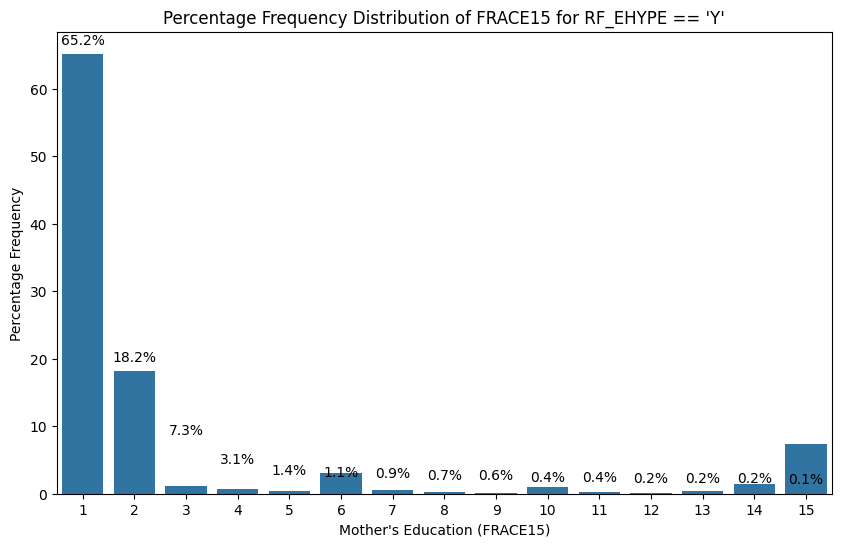

Chi-square statistic: 2856.048639995797
P-value: 0.0
Degrees of freedom: 14
There is a statistically significant association between FRACE15 and EHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_EHYPE'] == 'Y']['FRACE15'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (FRACE15)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of FRACE15 for RF_EHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['FRACE15'], combined_df['RF_EHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between FRACE15 and EHYPE.")
    else:
        print("There is no statistically significant association between FRACE15 and EHYPE.")

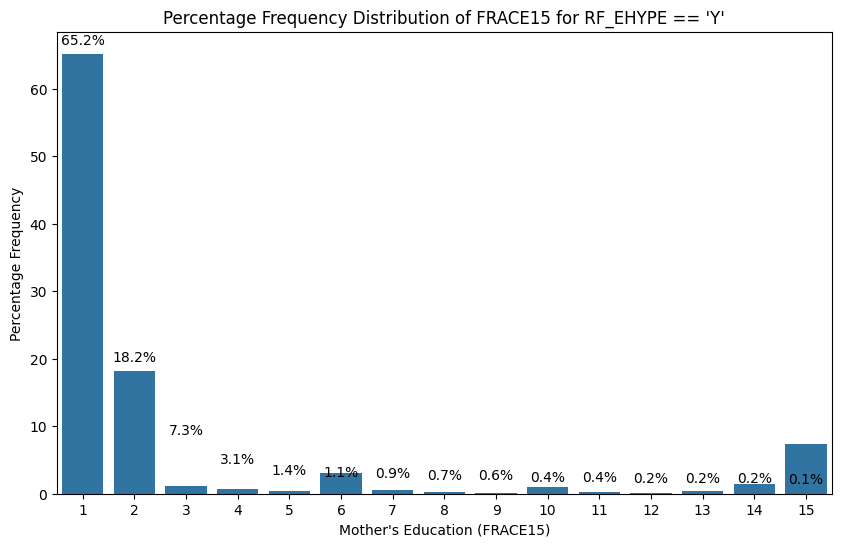

Chi-square statistic: 2856.048639995797
P-value: 0.0
Degrees of freedom: 14
There is a statistically significant association between FRACE15 and EHYPE.


In [ ]:
# Check if 'MEDU' column exists in the DataFrame
if 'MEDUC' not in combined_df.columns:
    print("Error: 'MEDUC' column not found in the DataFrame.")
    # You might need to investigate why the column is missing and load/preprocess the data correctly.
else:
    # Calculate percentage frequency distribution of 'MEDU' for RF_GHYPE == 'Y'
    medu_counts = combined_df[combined_df['RF_EHYPE'] == 'Y']['FRACE15'].value_counts(normalize=True) * 100

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=medu_counts.index, y=medu_counts.values)
    plt.xlabel("Mother's Education (FRACE15)")
    plt.ylabel("Percentage Frequency")
    plt.title("Percentage Frequency Distribution of FRACE15 for RF_EHYPE == 'Y'")

    # Add percentage labels to the bars
    for i, v in enumerate(medu_counts.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

    plt.show()

    # Chi-square test for significant difference between 'MEDU' and 'RF_GHYPE'
    contingency_table = pd.crosstab(combined_df['FRACE15'], combined_df['RF_EHYPE'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

    alpha = 0.05  # Significance level

    if p < alpha:
        print("There is a statistically significant association between FRACE15 and EHYPE.")
    else:
        print("There is no statistically significant association between FRACE15 and EHYPE.")


Data Distribution for Numerical Features:


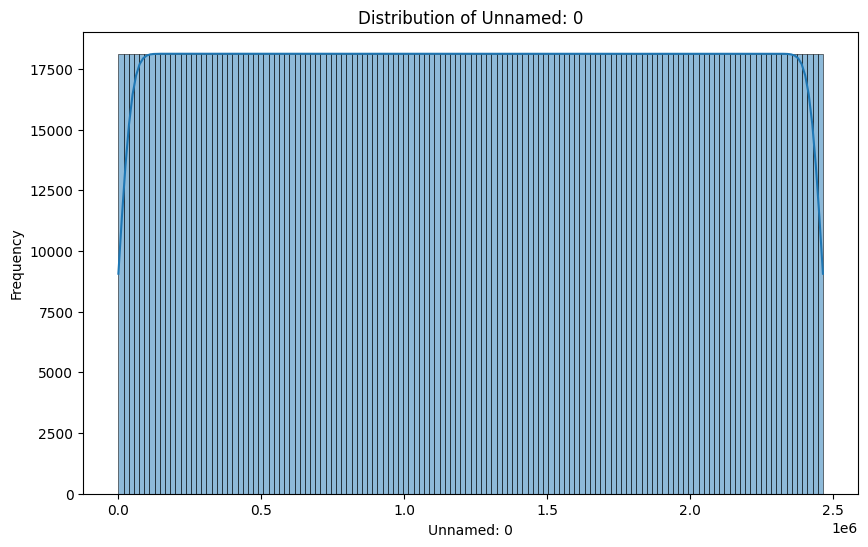

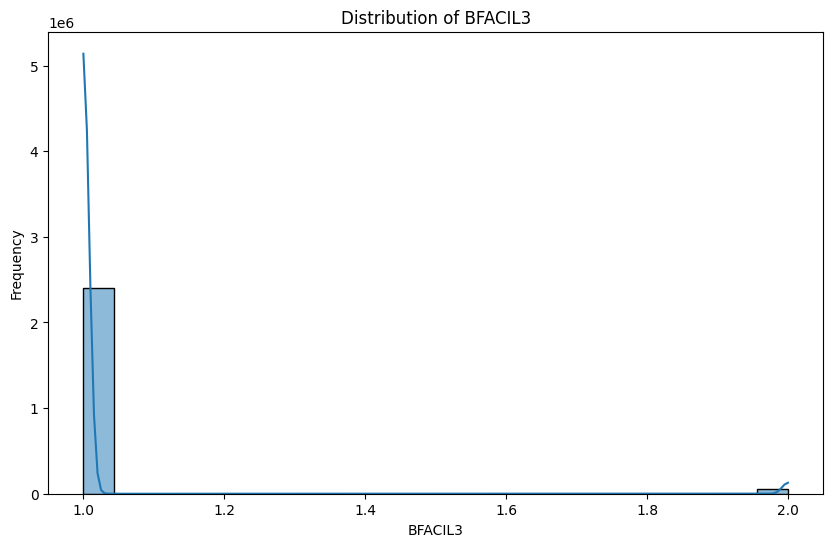

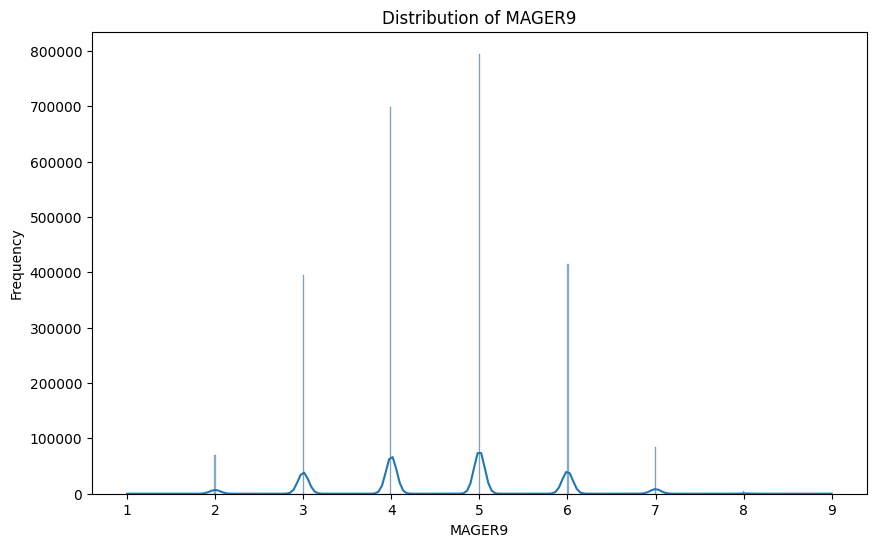

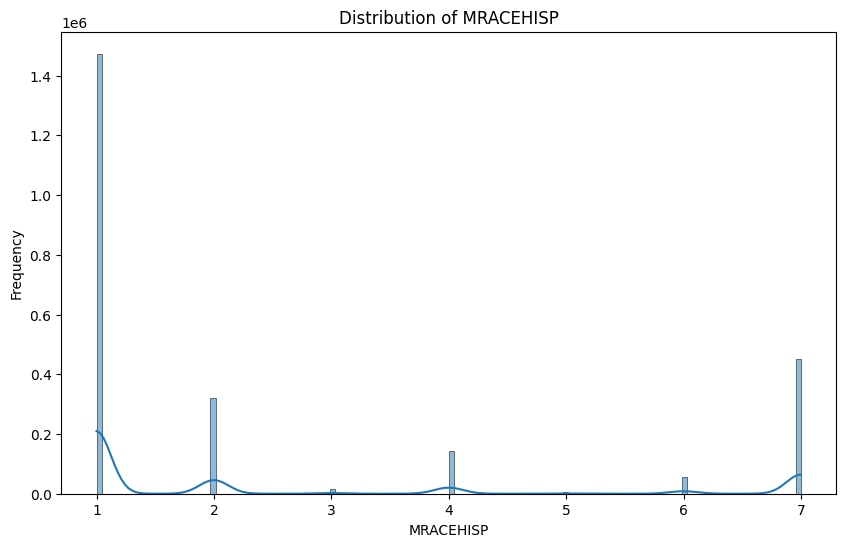

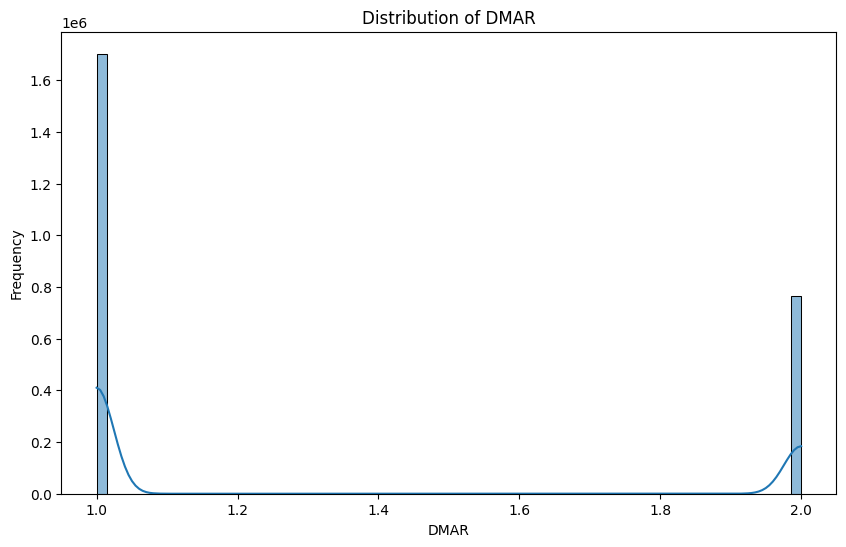

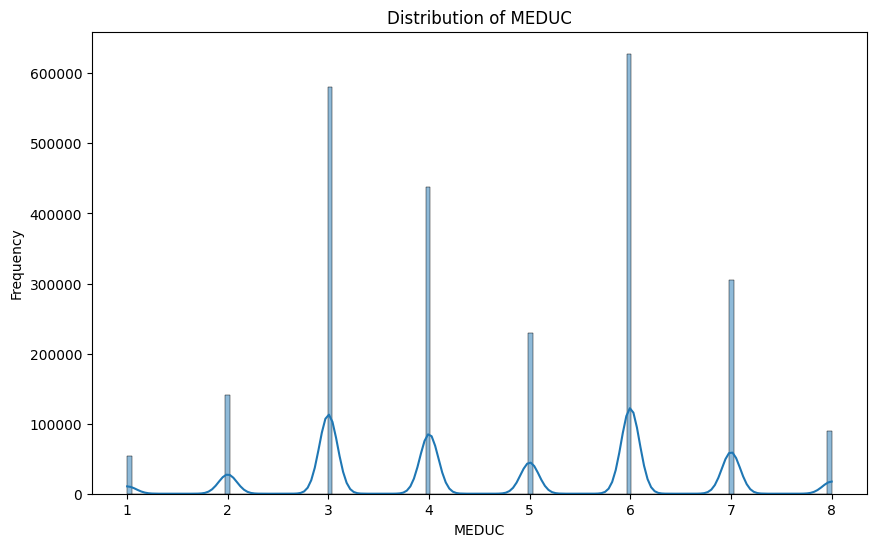

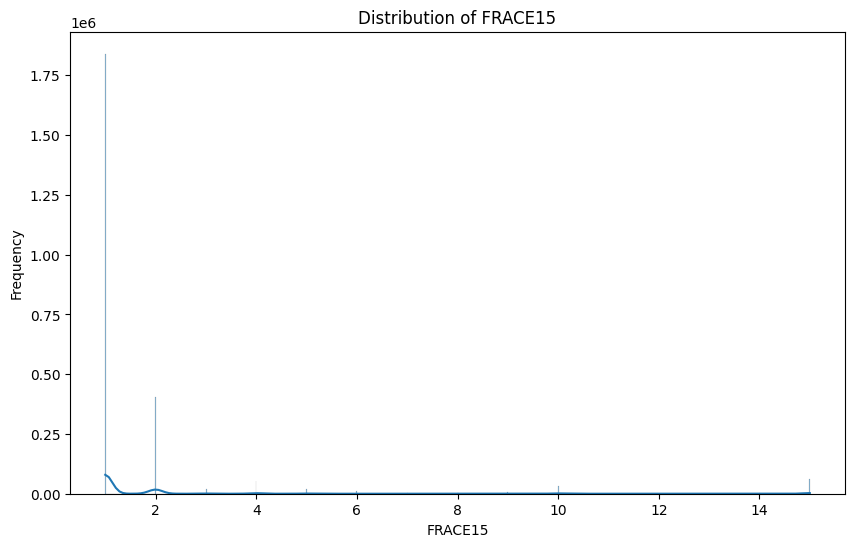

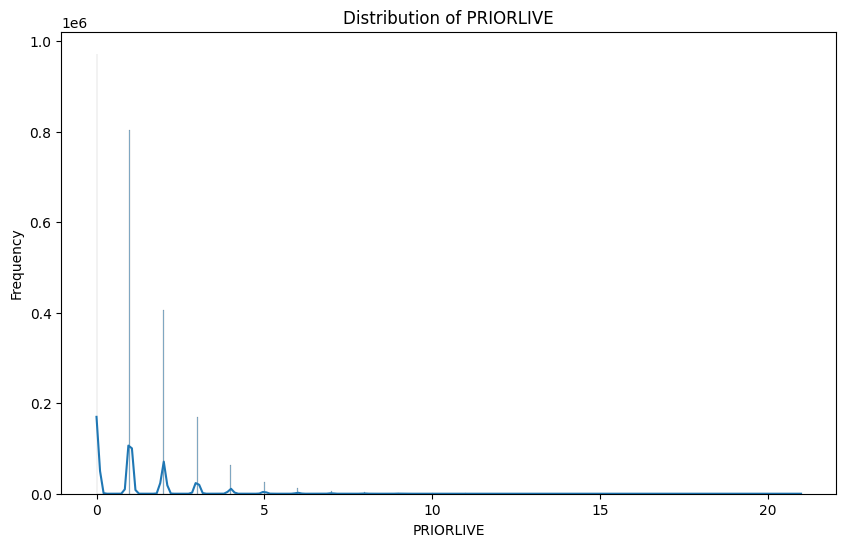

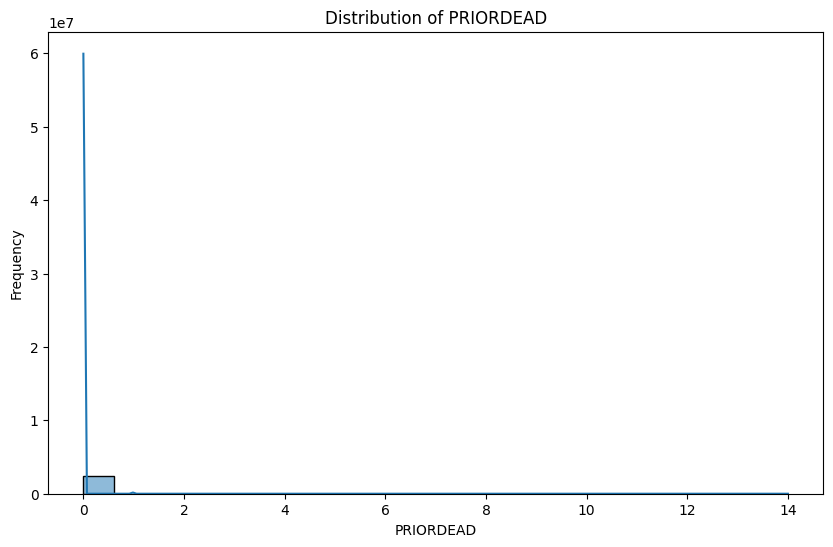

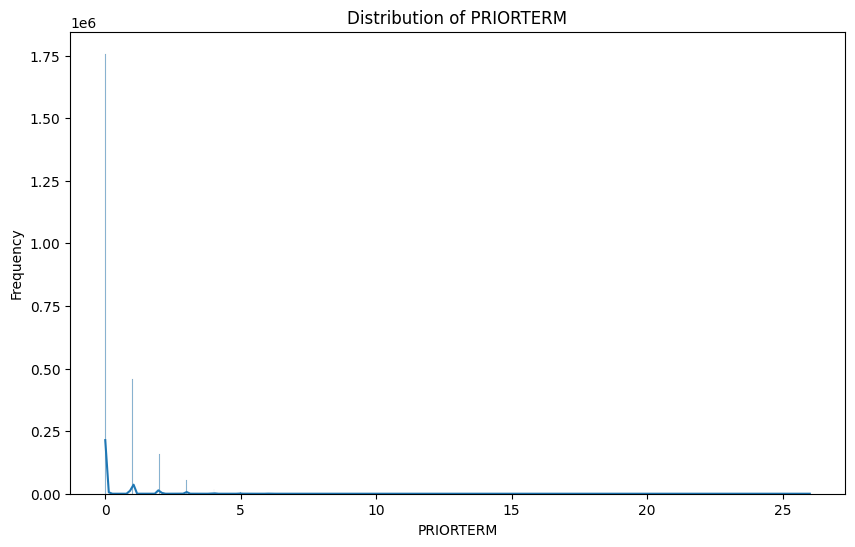

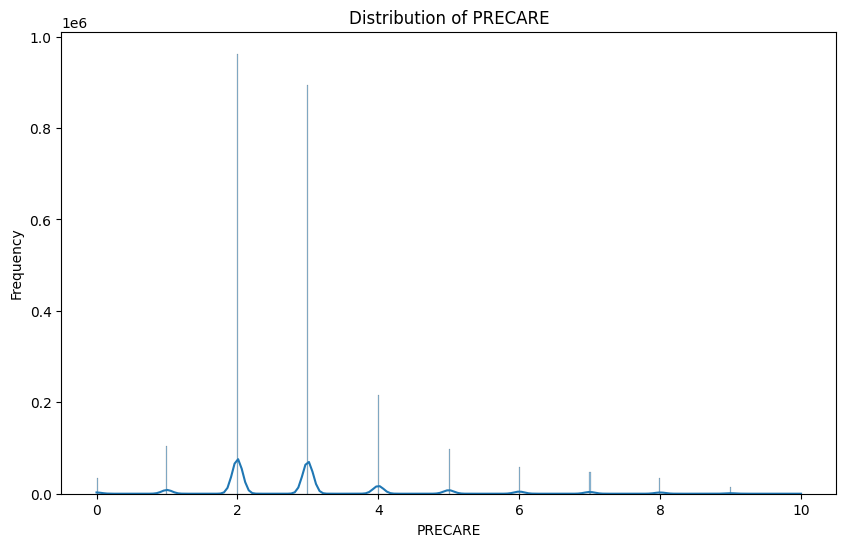

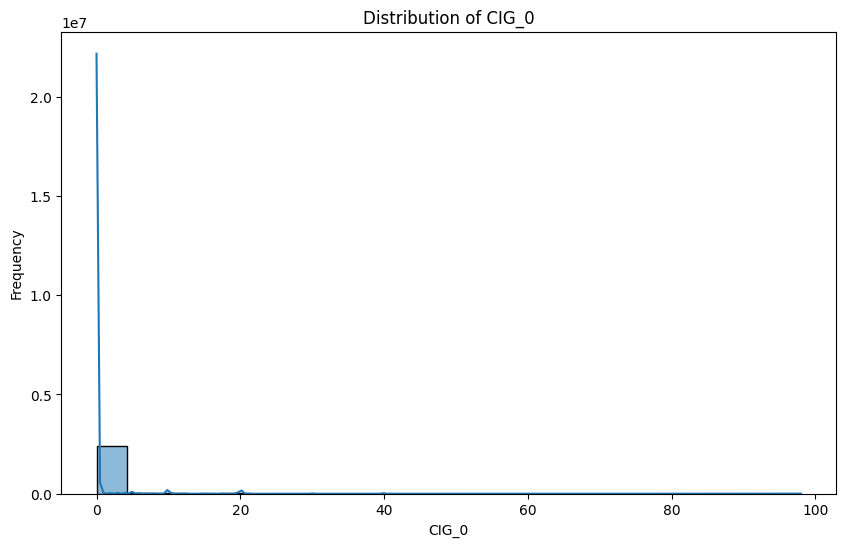

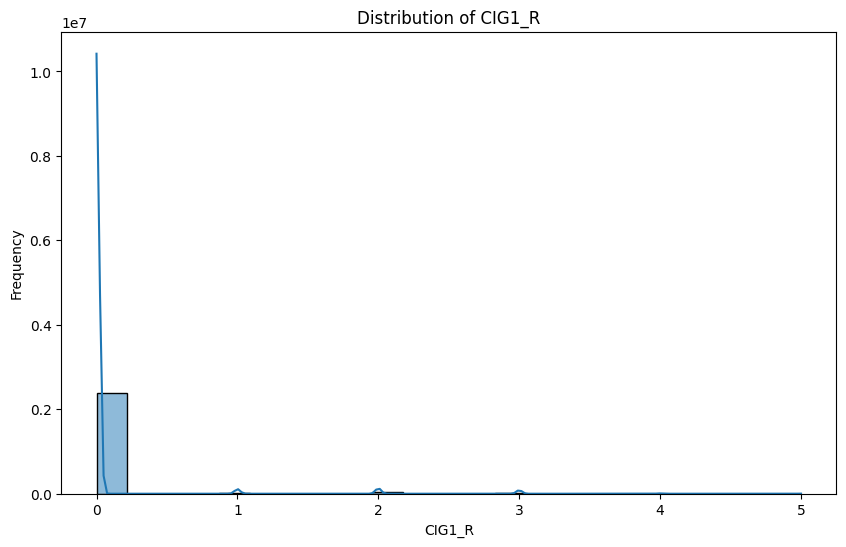

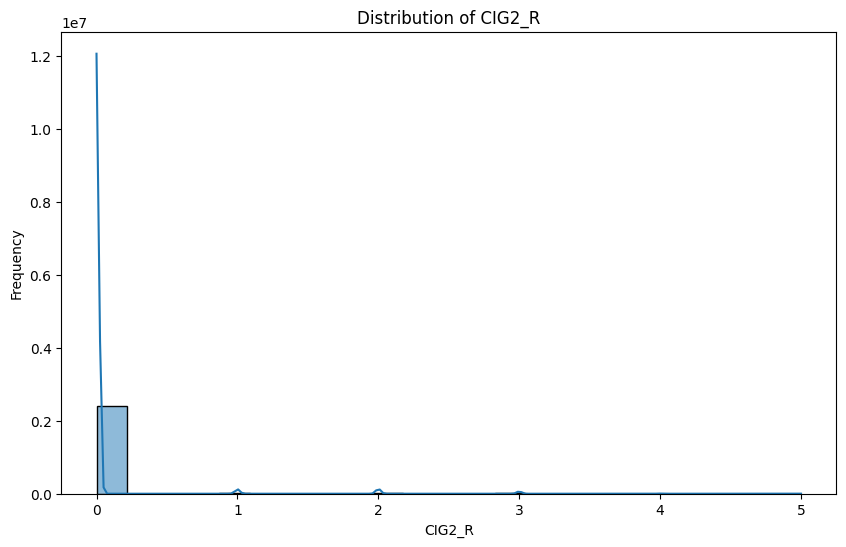

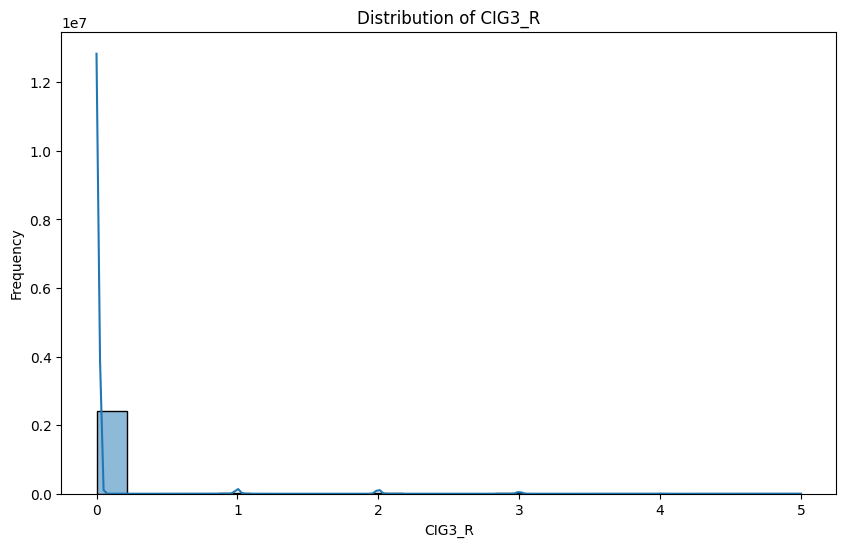

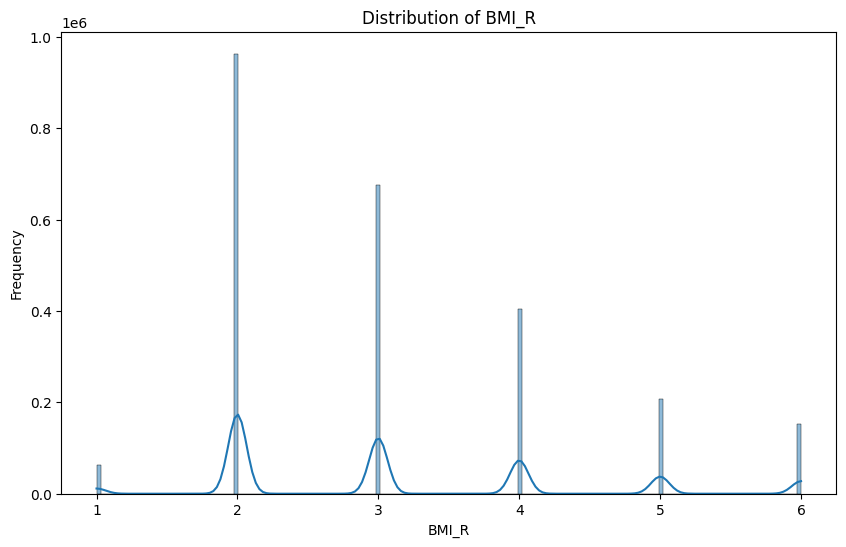

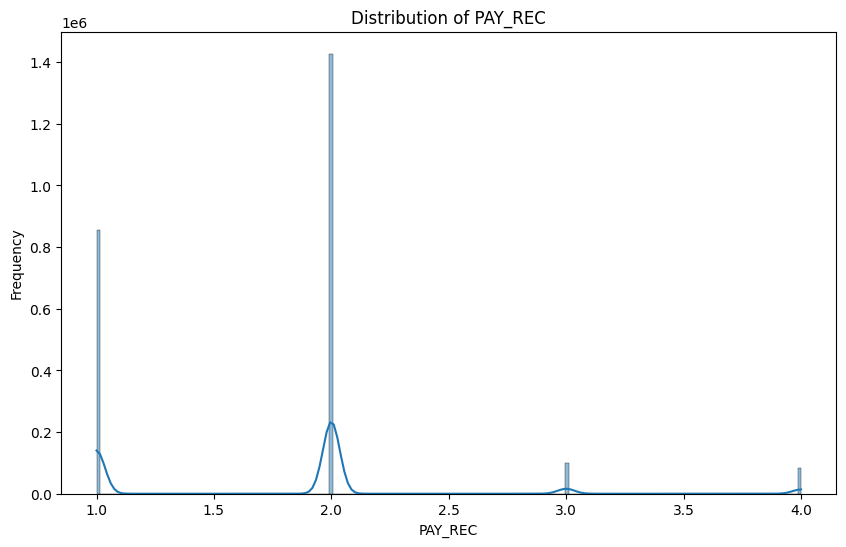

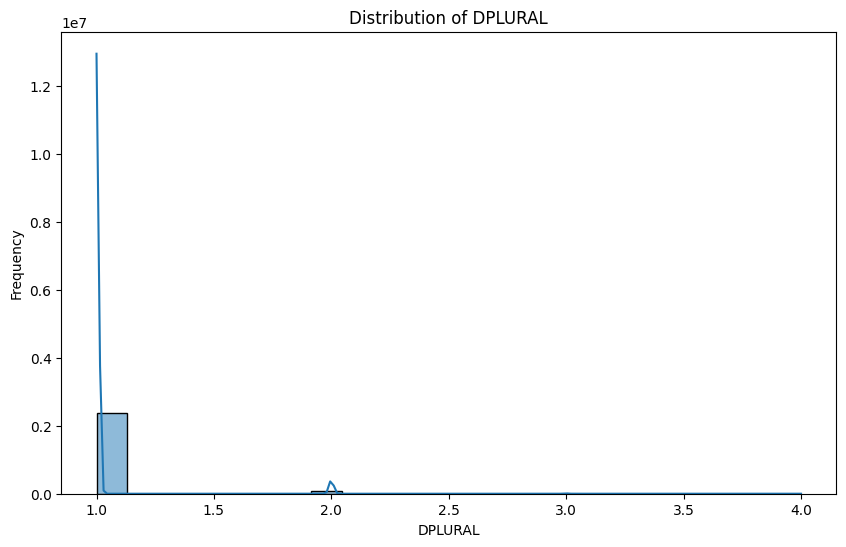

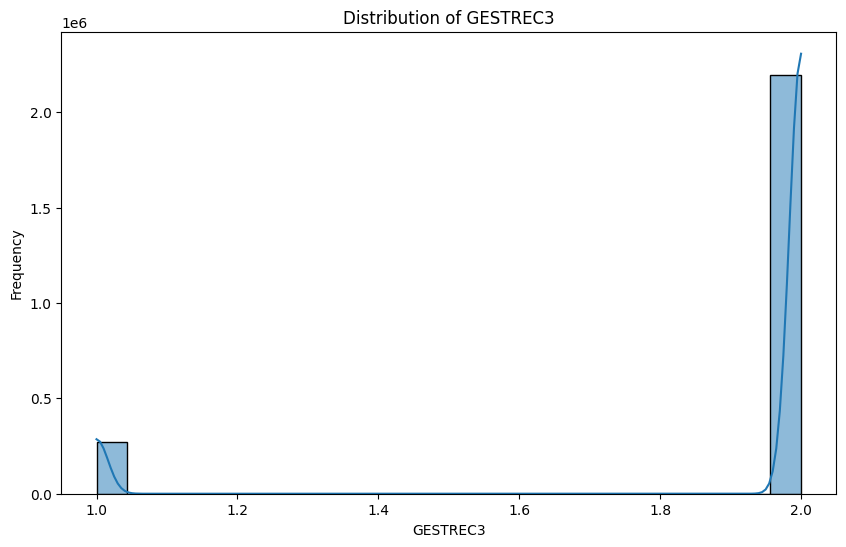

In [ ]:
# 6. Data Distribution for Numerical Features
numerical_columns = combined_df.select_dtypes(include=np.number).columns.tolist()
print("\nData Distribution for Numerical Features:")
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Data Distribution for Categorical Features:


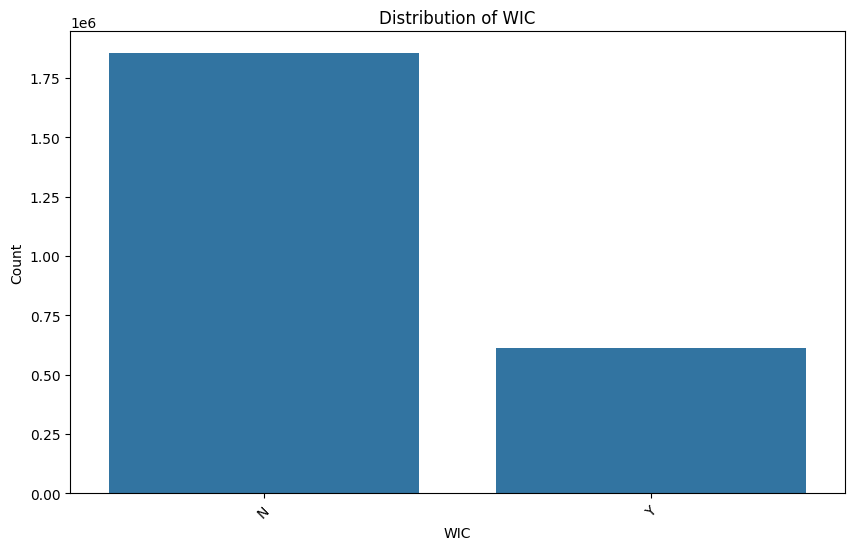

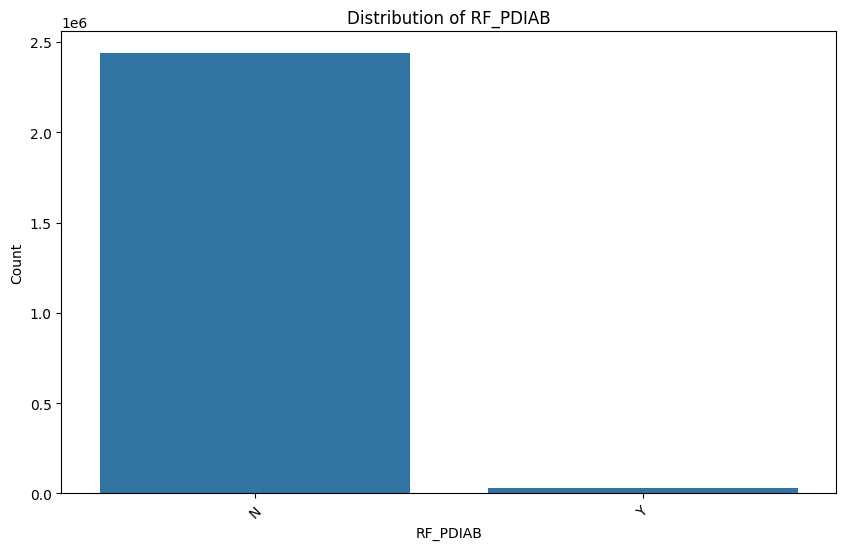

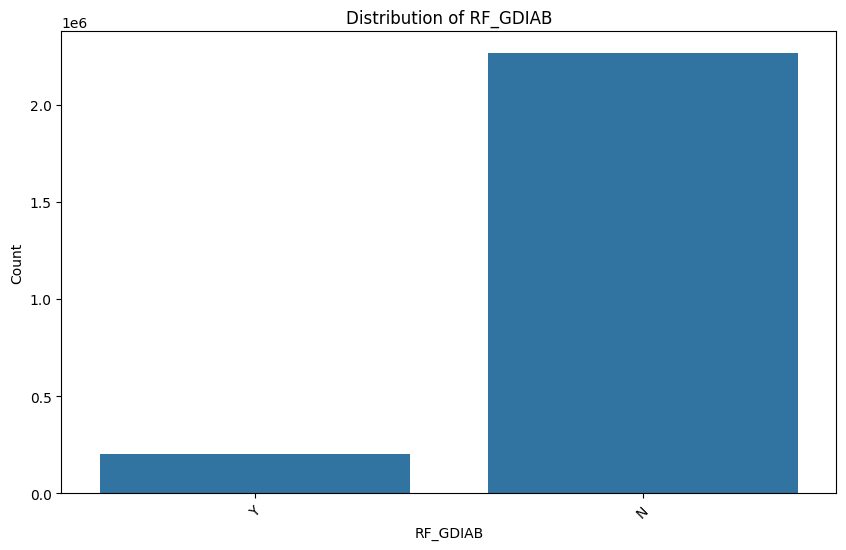

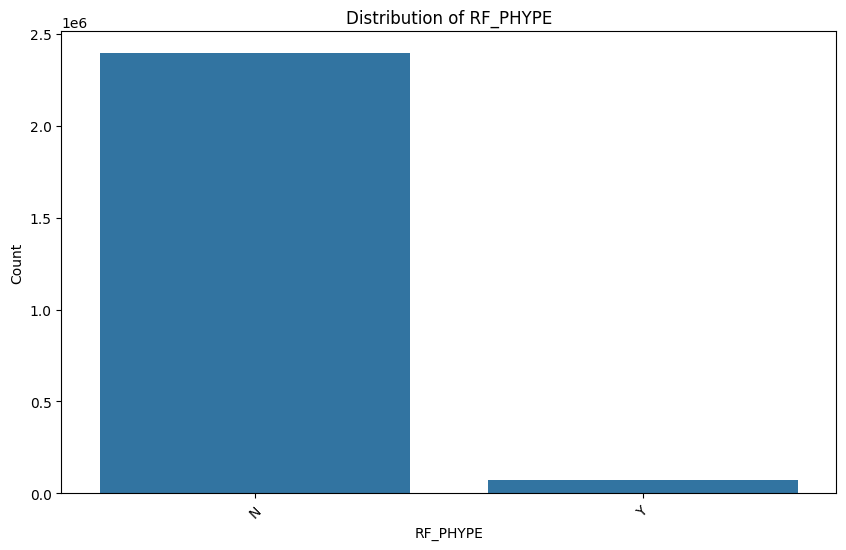

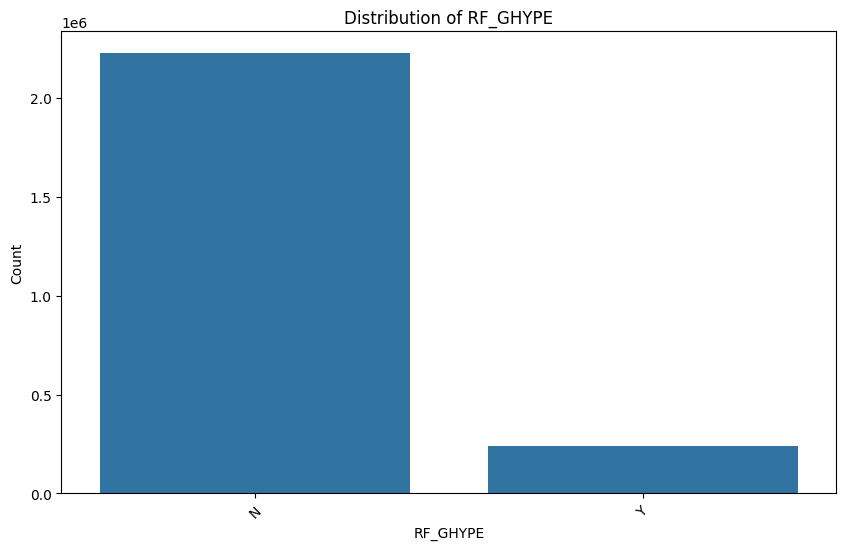

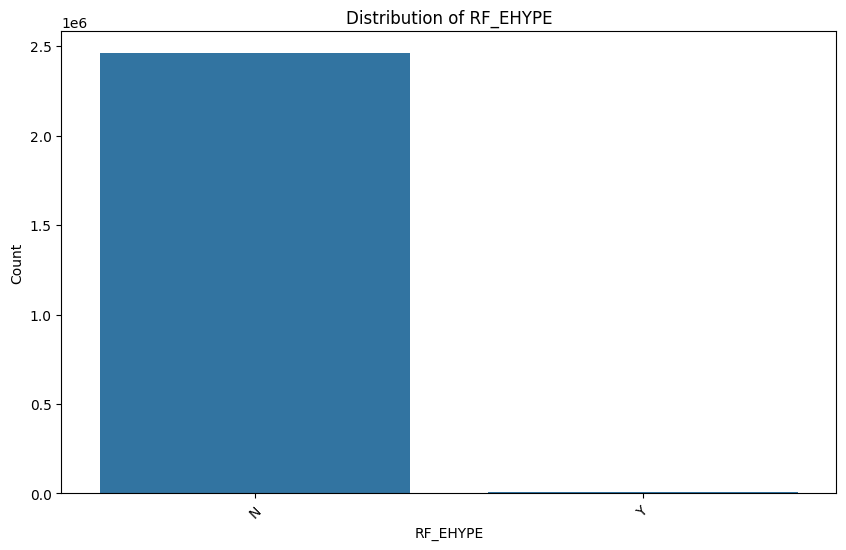

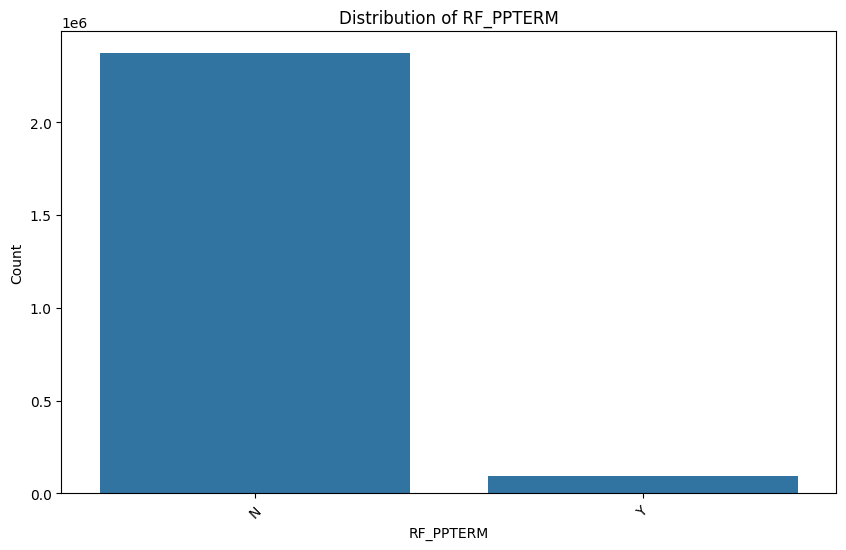

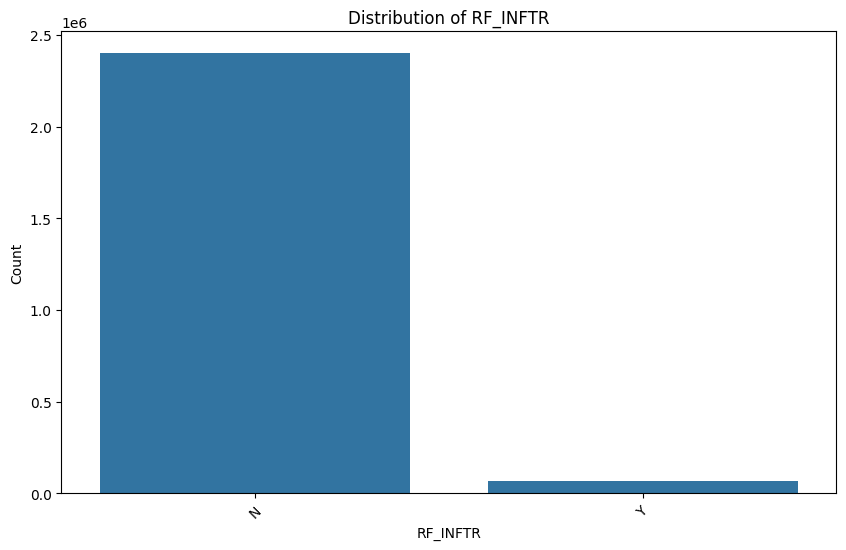

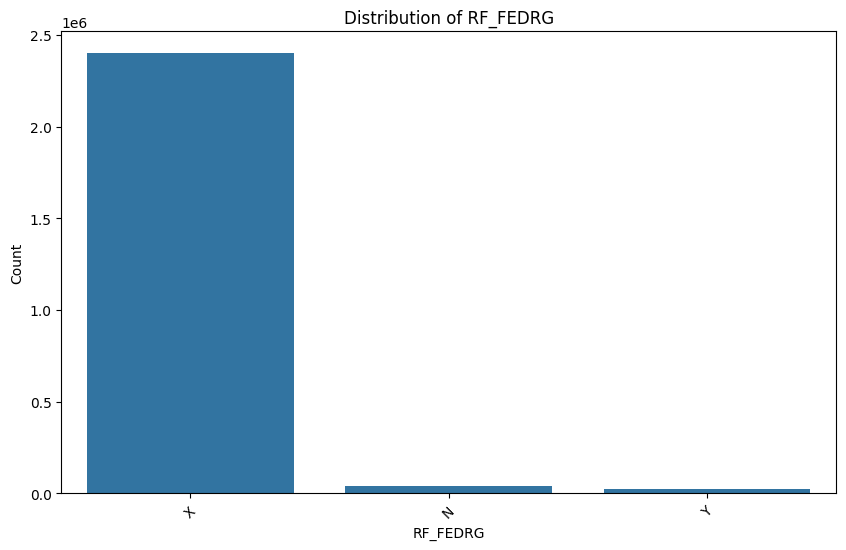

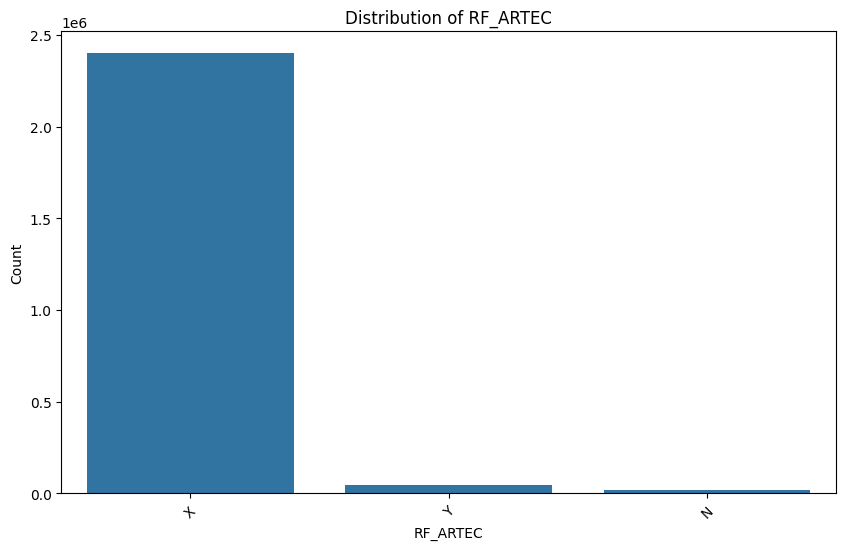

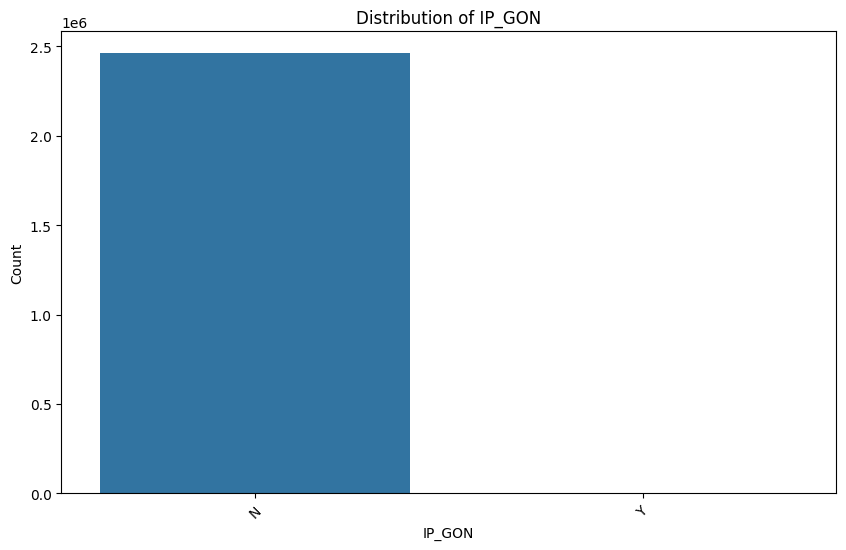

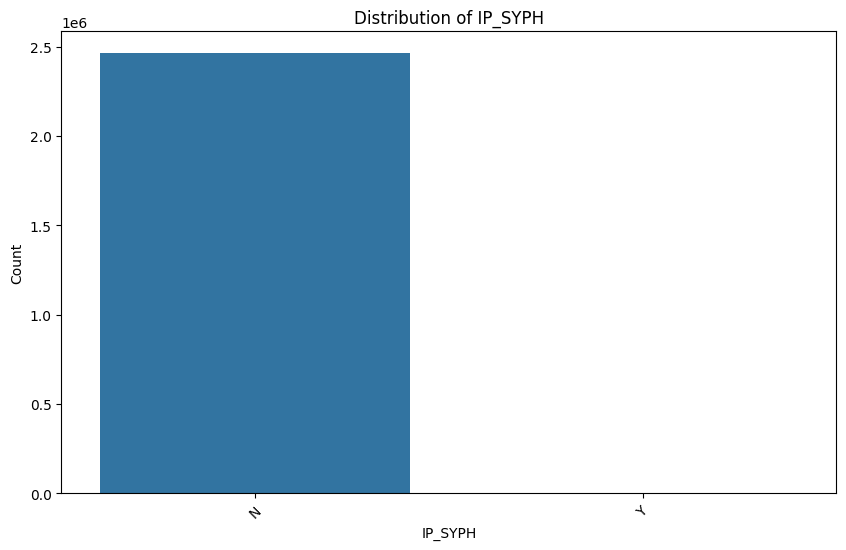

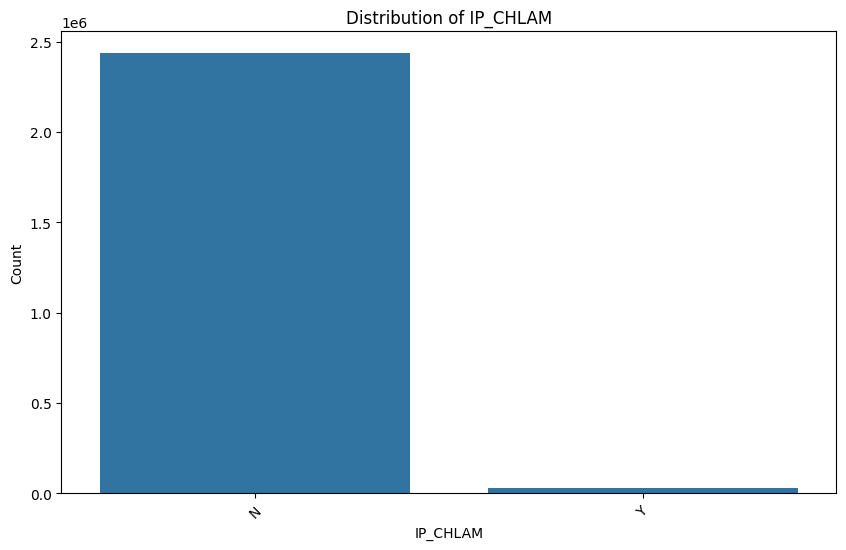

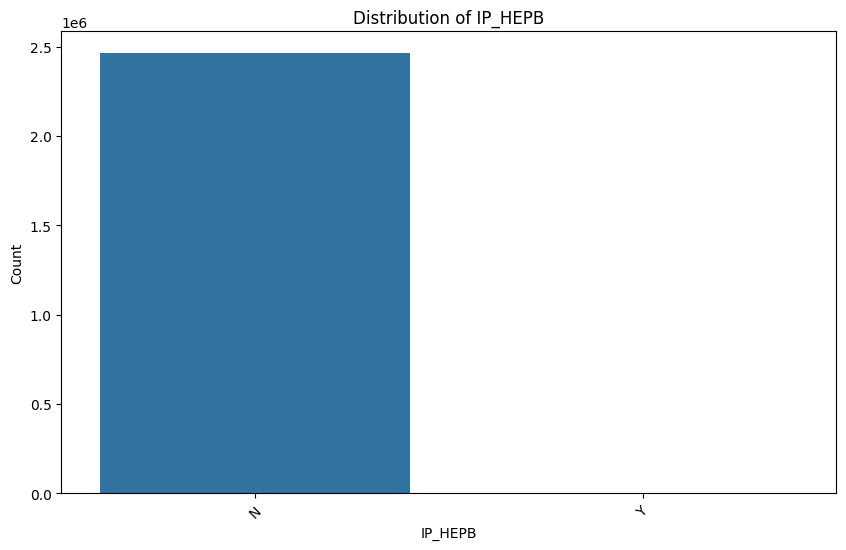

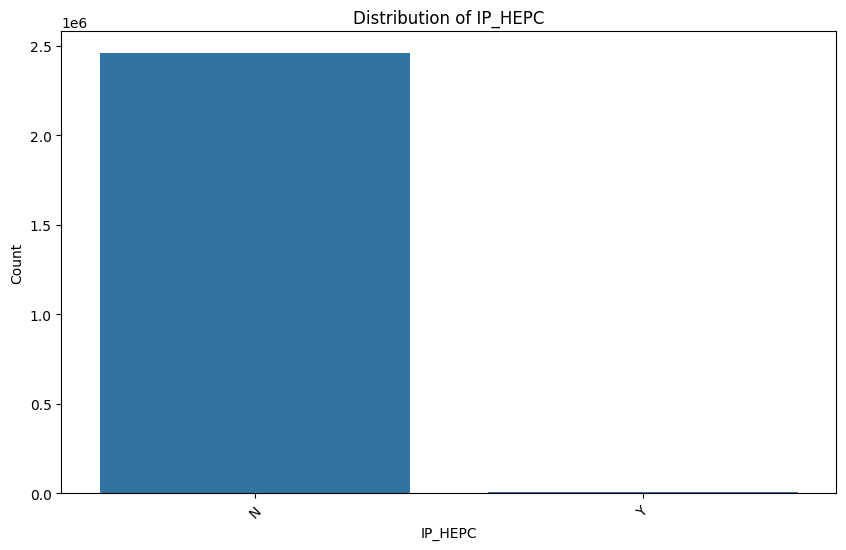

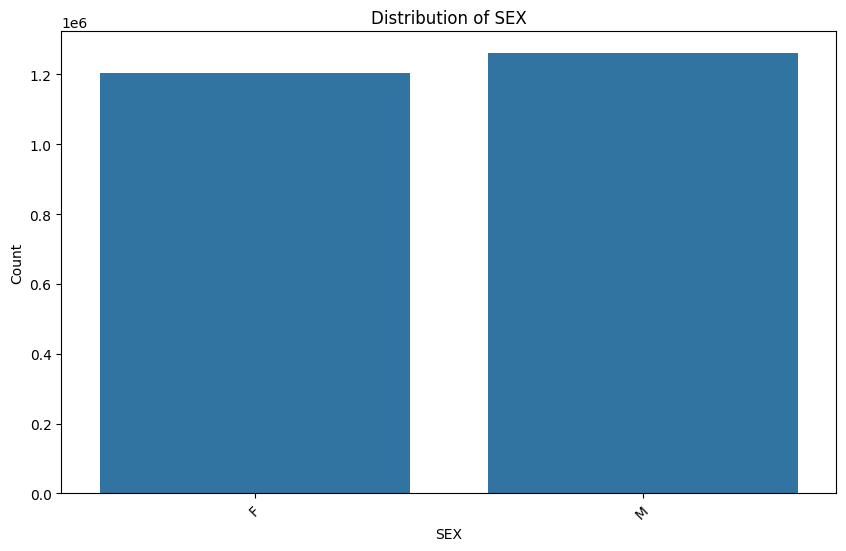

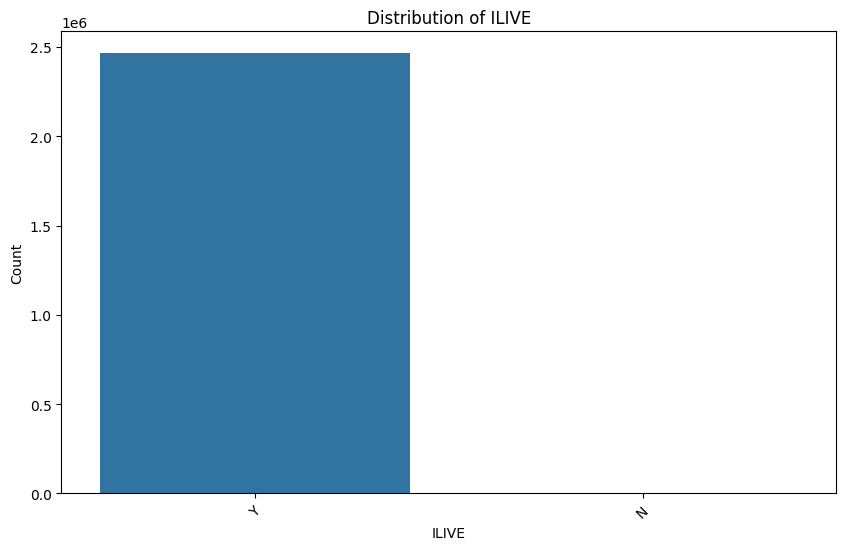

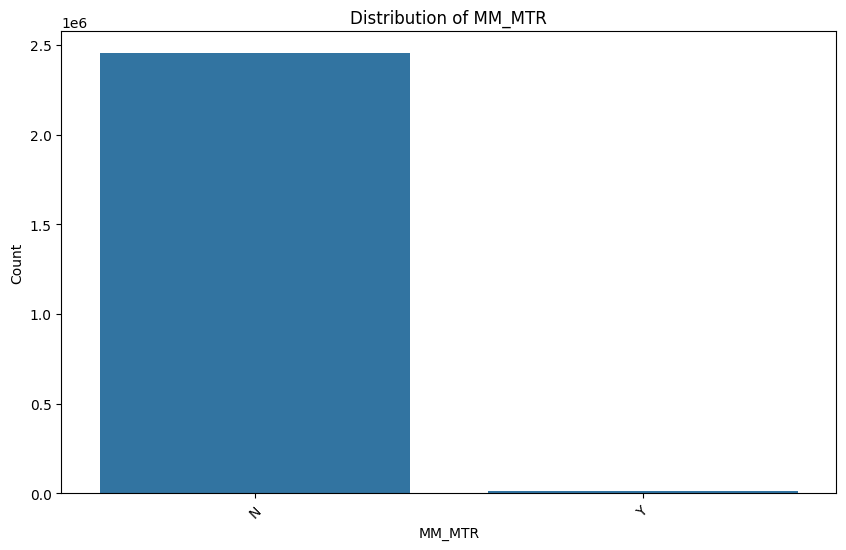

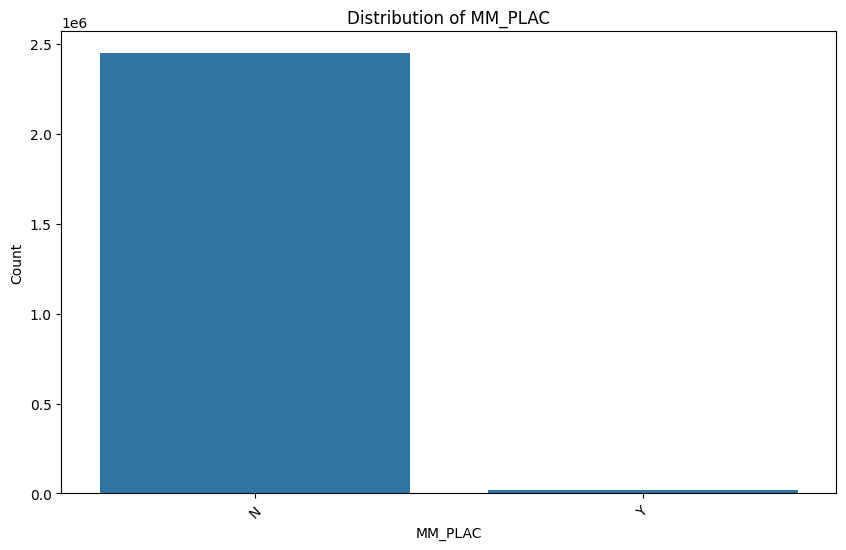

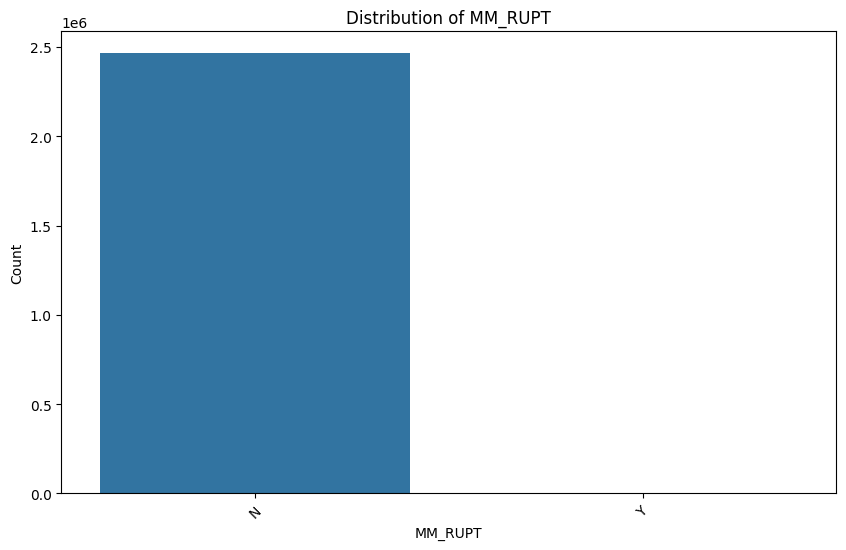

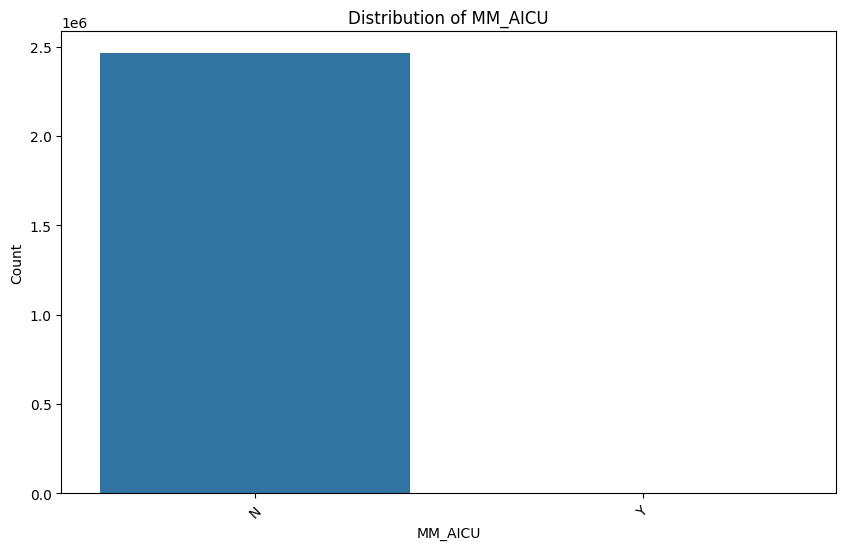

In [ ]:
# 7. Data Distribution for Categorical Features
categorical_columns = combined_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nData Distribution for Categorical Features:")
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=combined_df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Correlation Analysis:


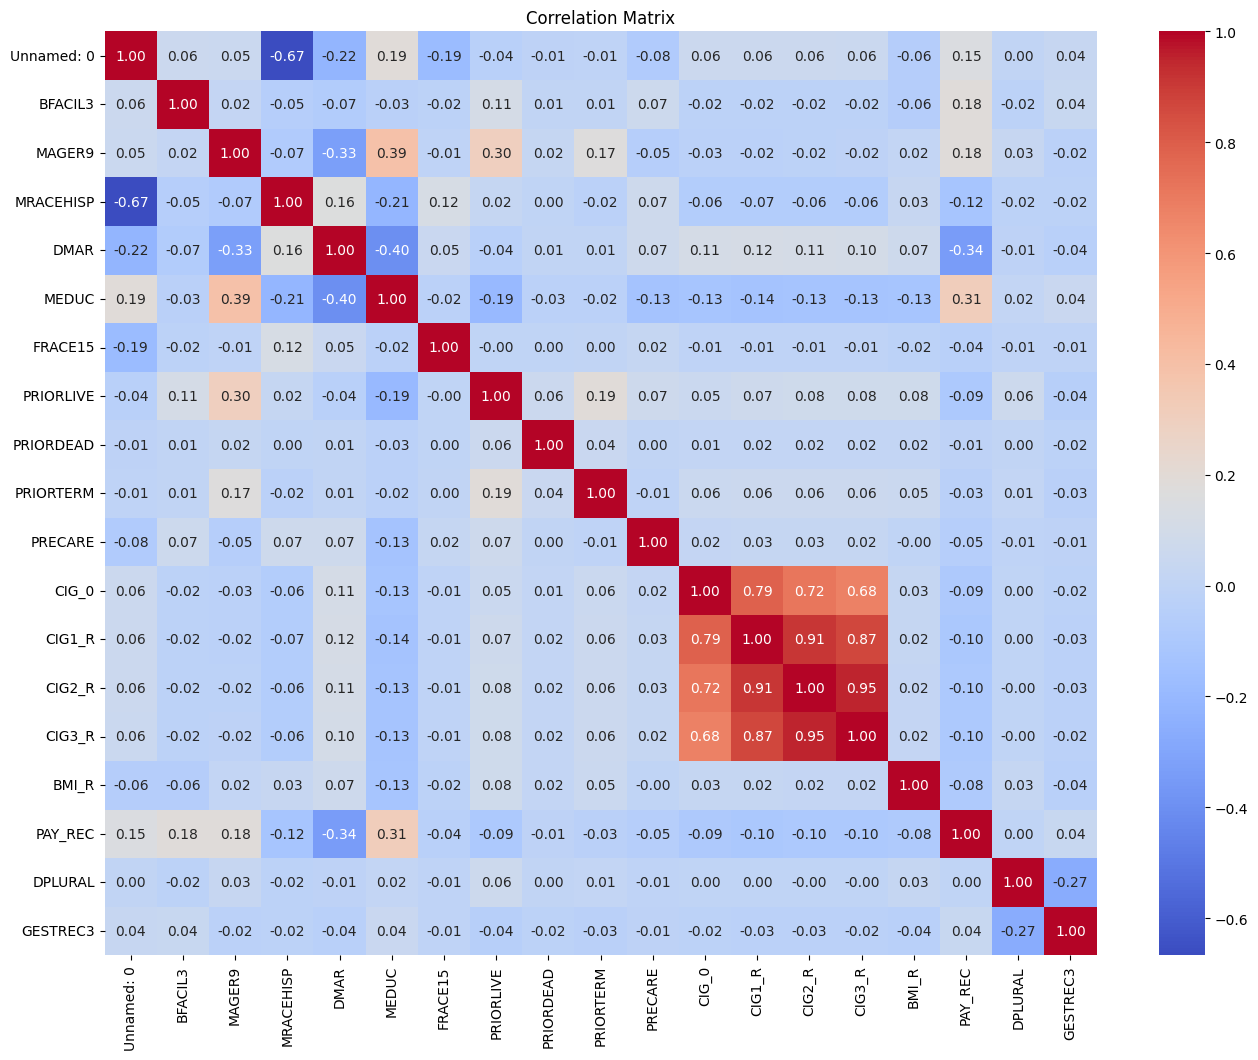

In [ ]:
# 8. Correlation Analysis
print("\nCorrelation Analysis:")
# Select only numerical columns for correlation analysis
numerical_df = combined_df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Pairplot for Numerical Features:


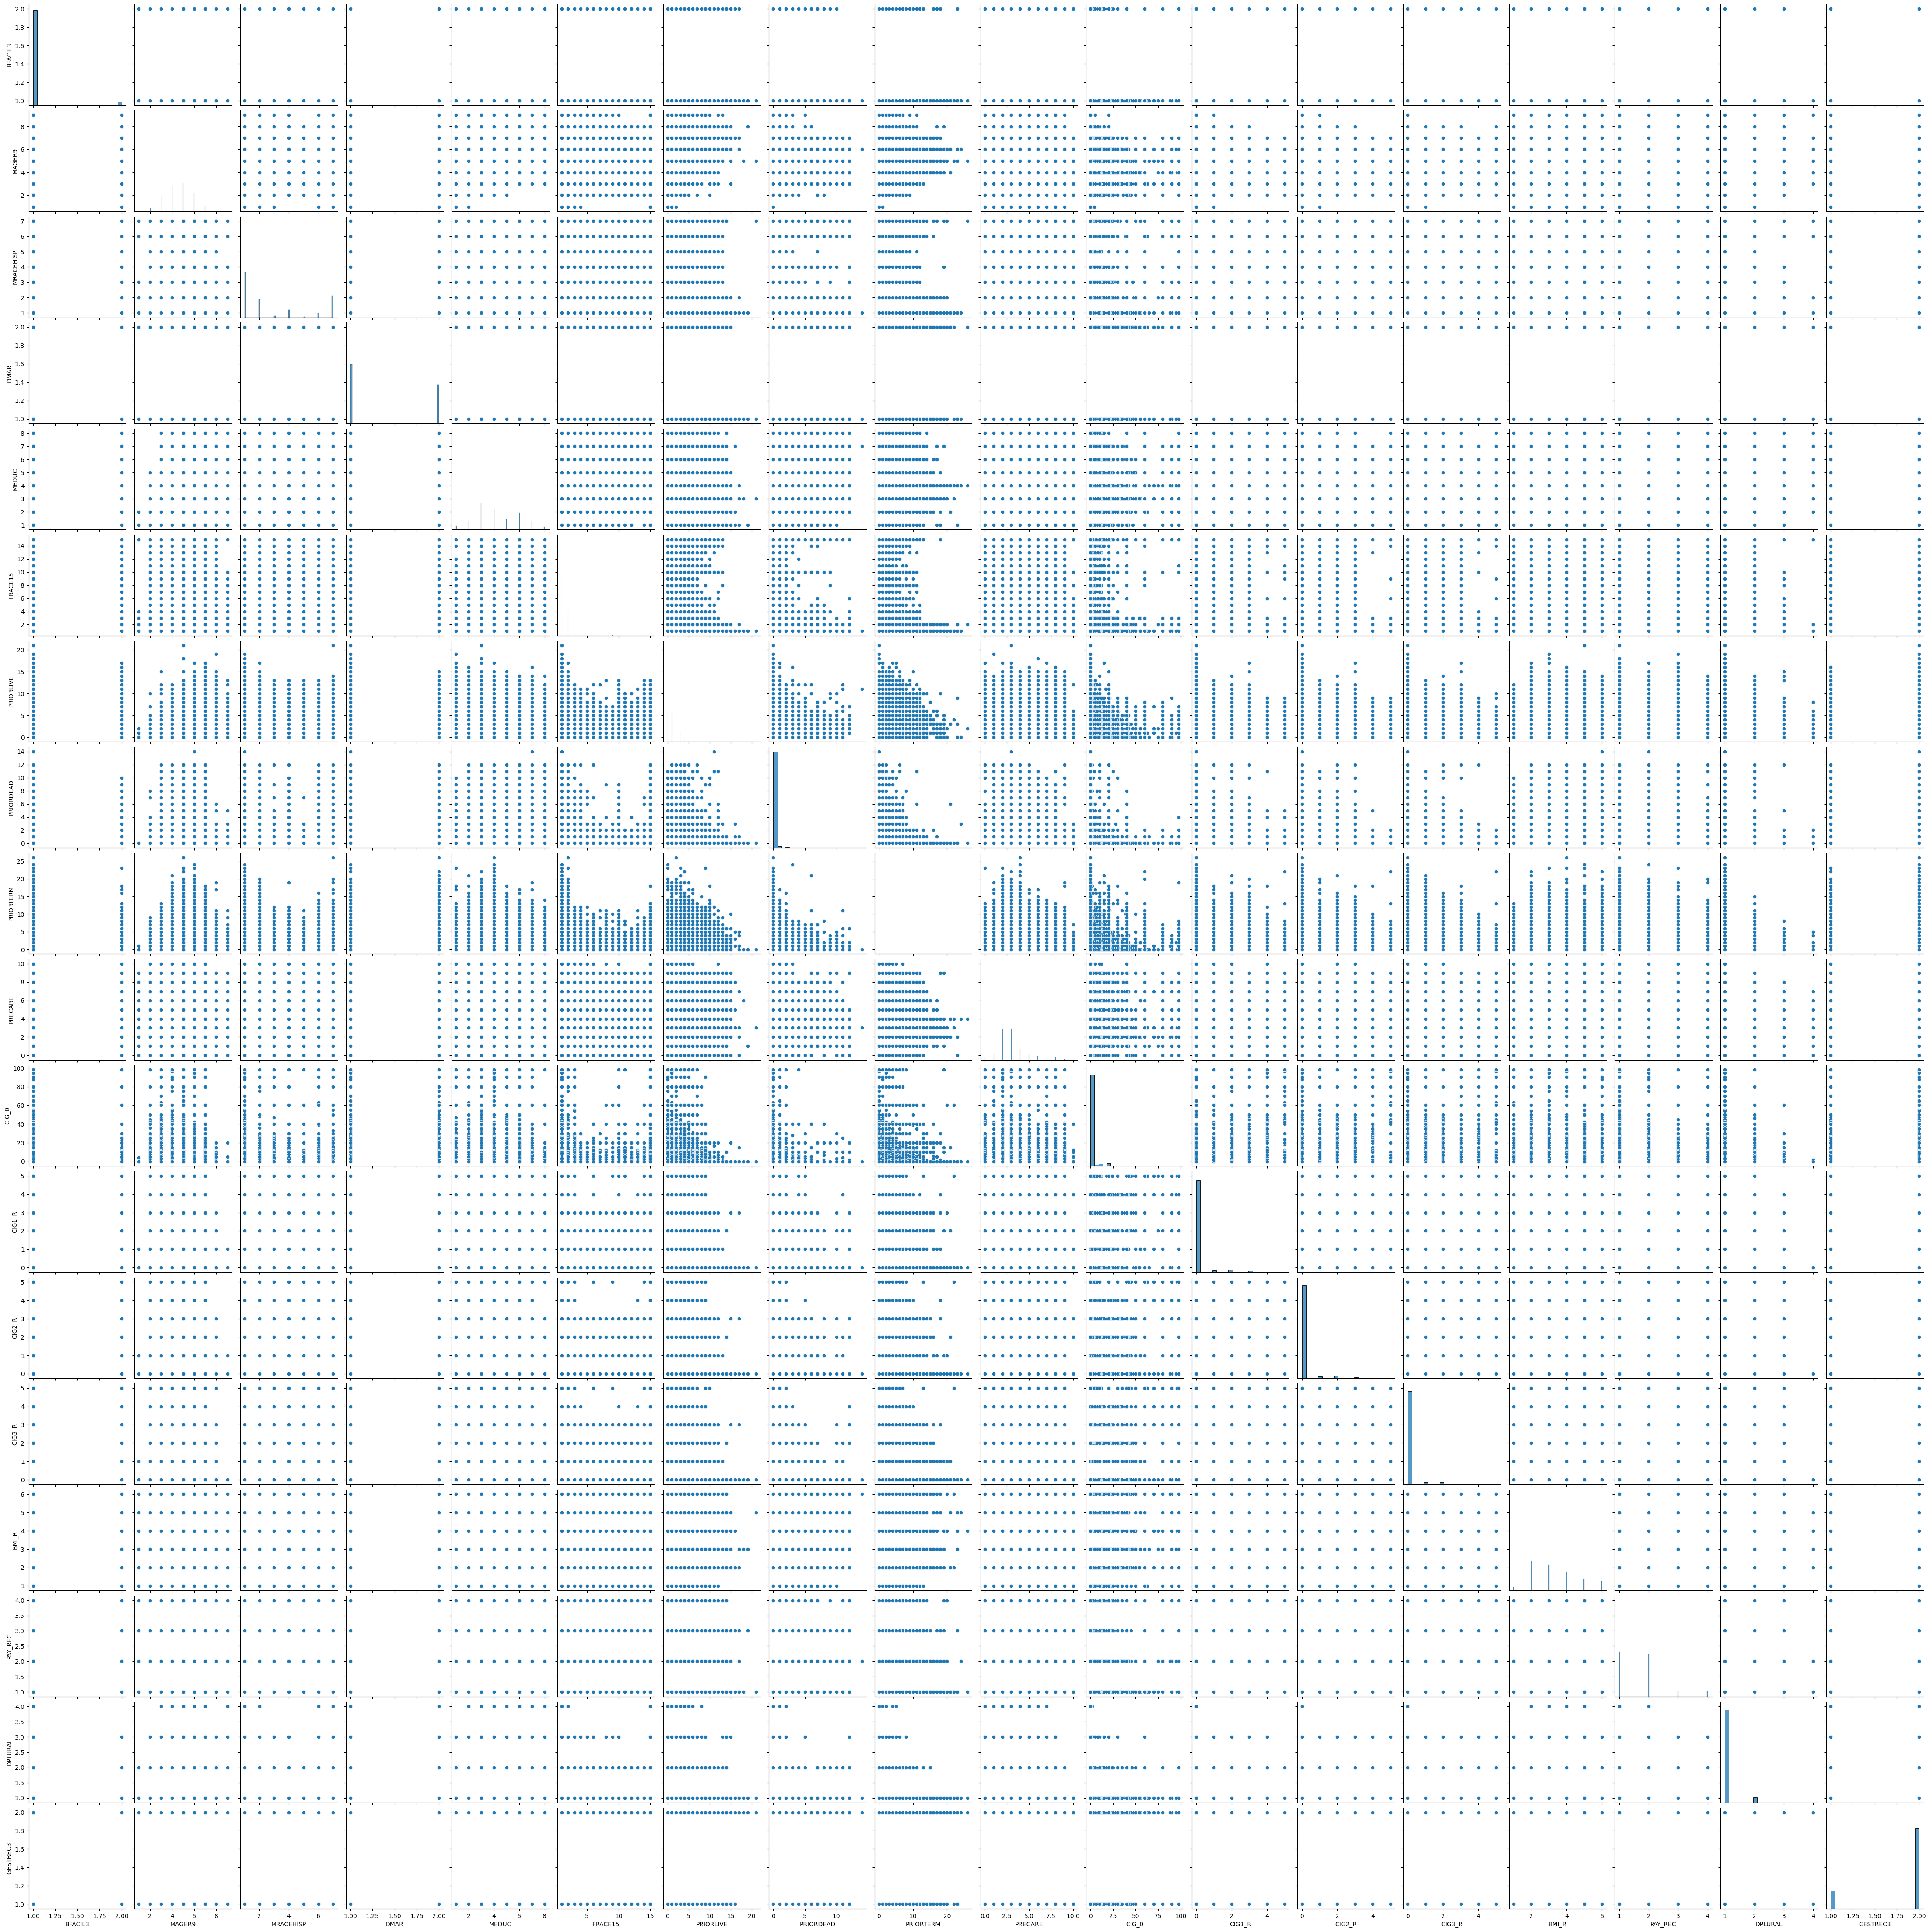

In [ ]:
# 9. Pairplot for Numerical Features
print("\nPairplot for Numerical Features:")
sns.pairplot(combined_df[numerical_columns])
plt.show()


Boxplots for Numerical Features:


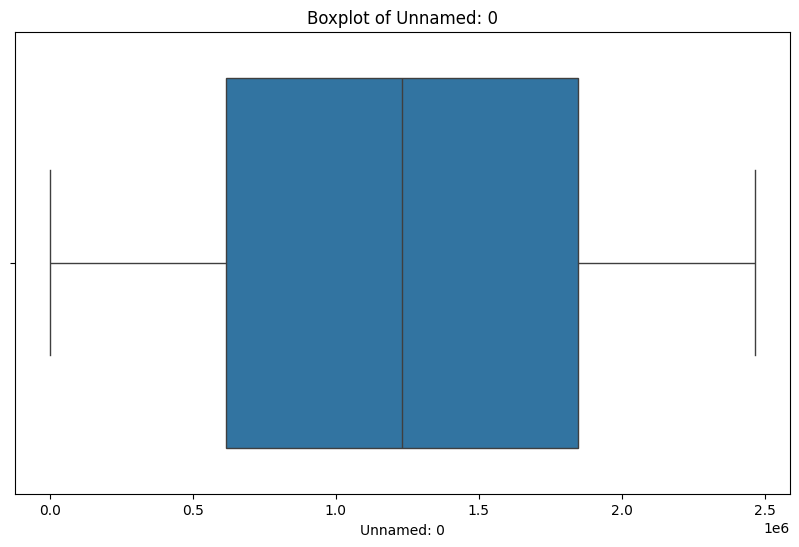

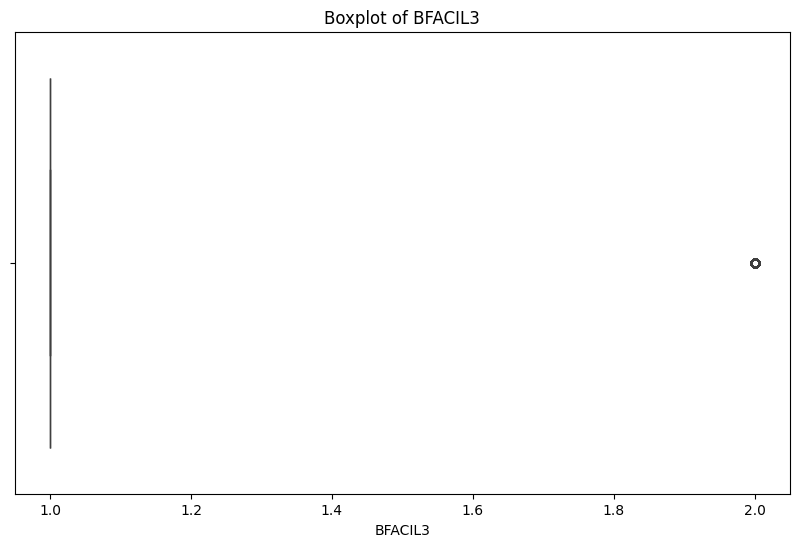

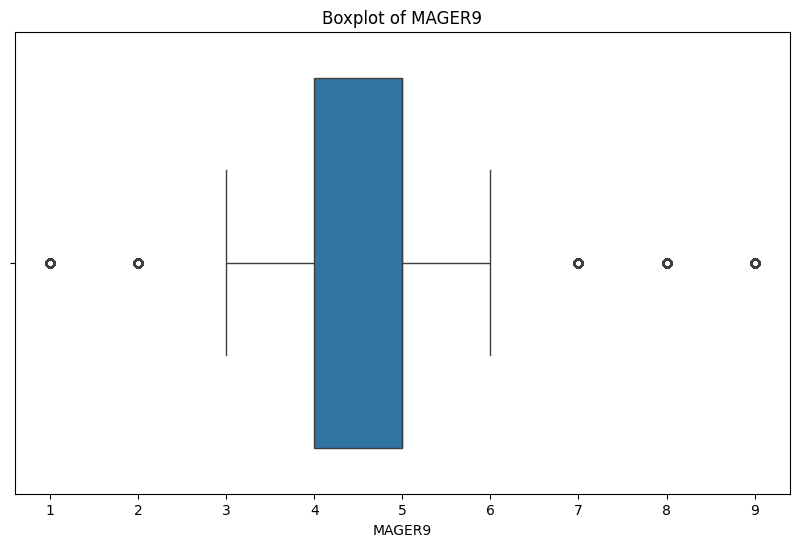

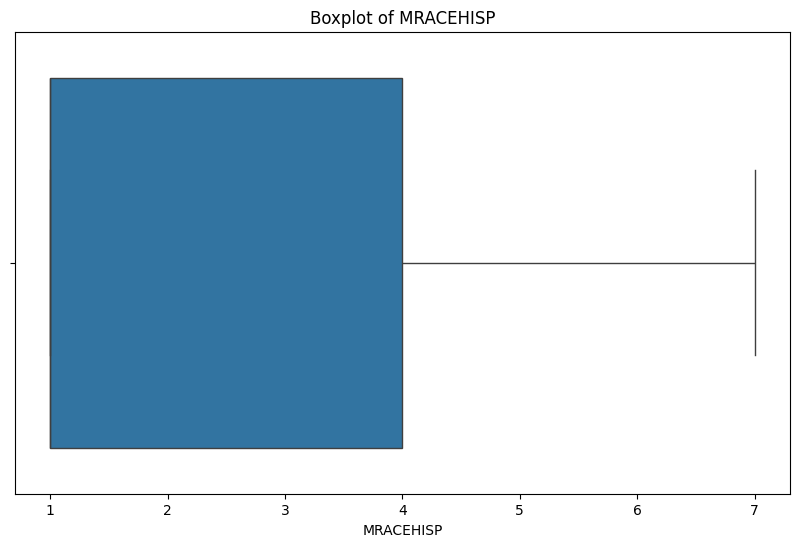

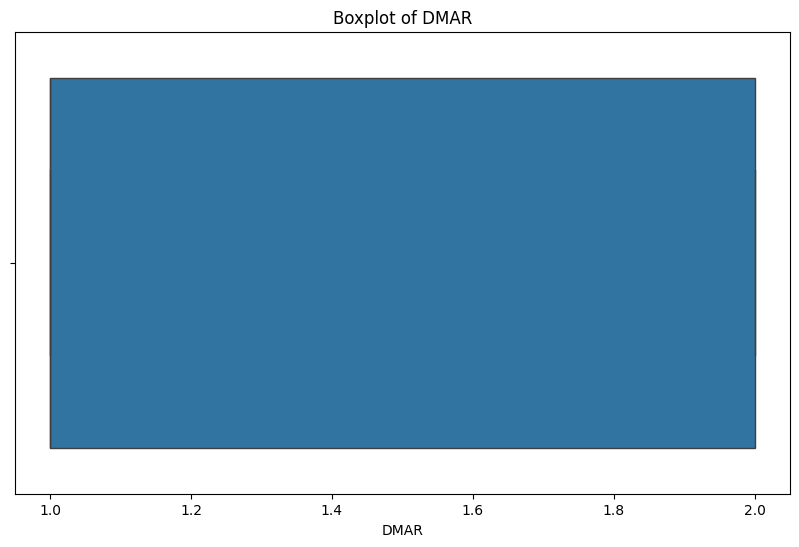

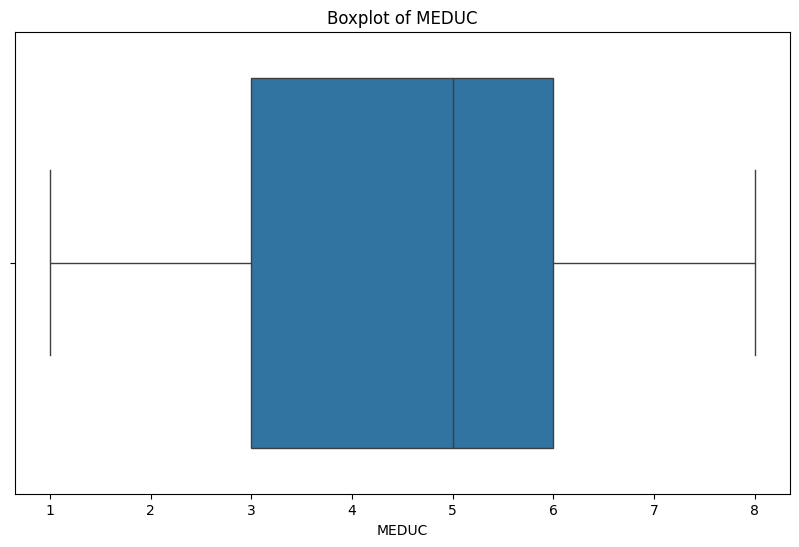

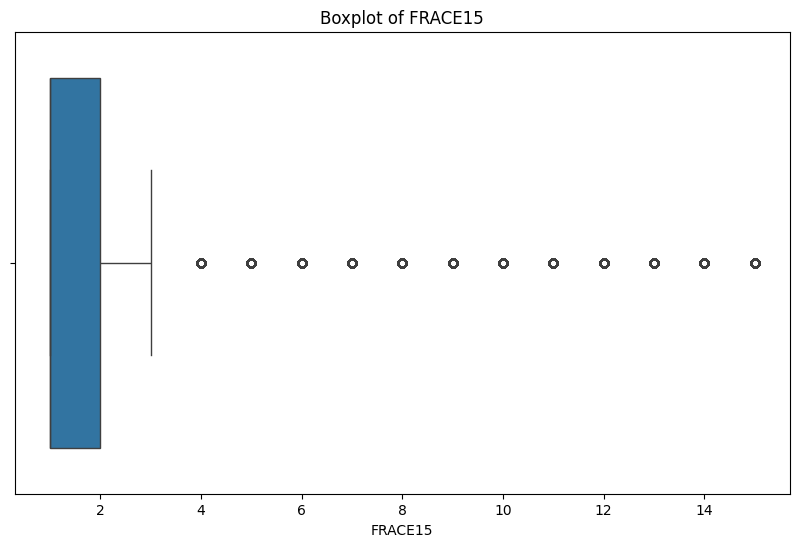

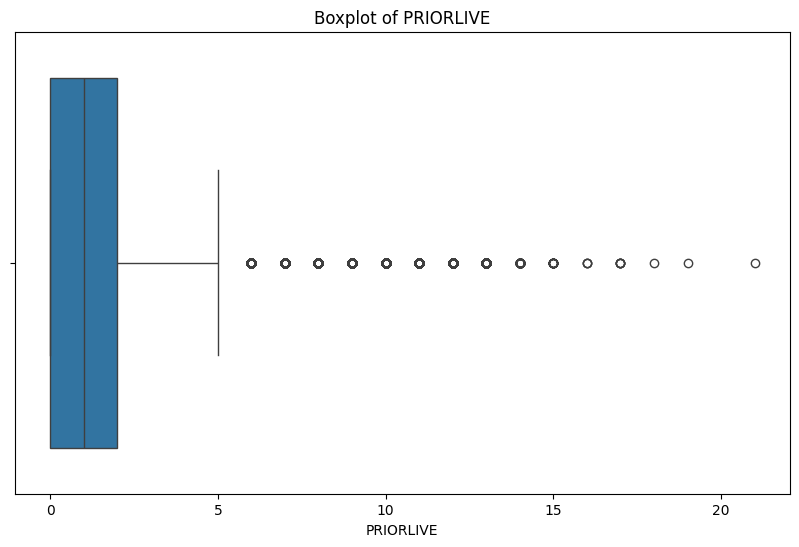

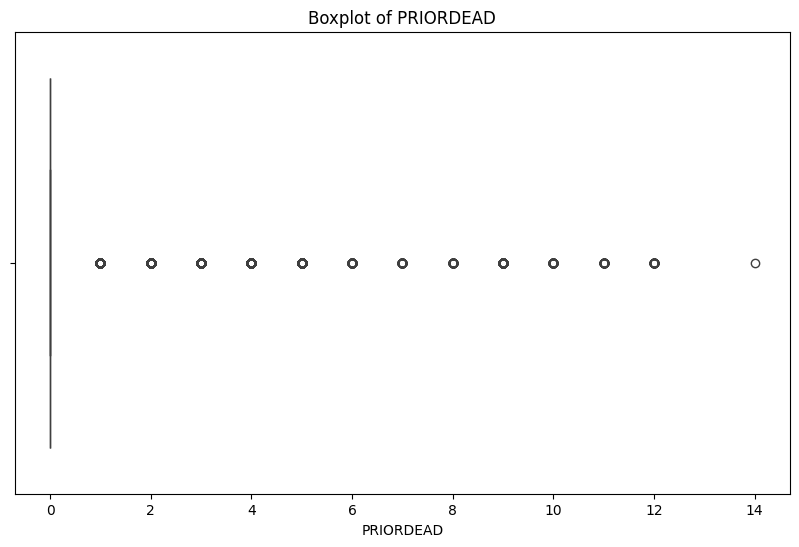

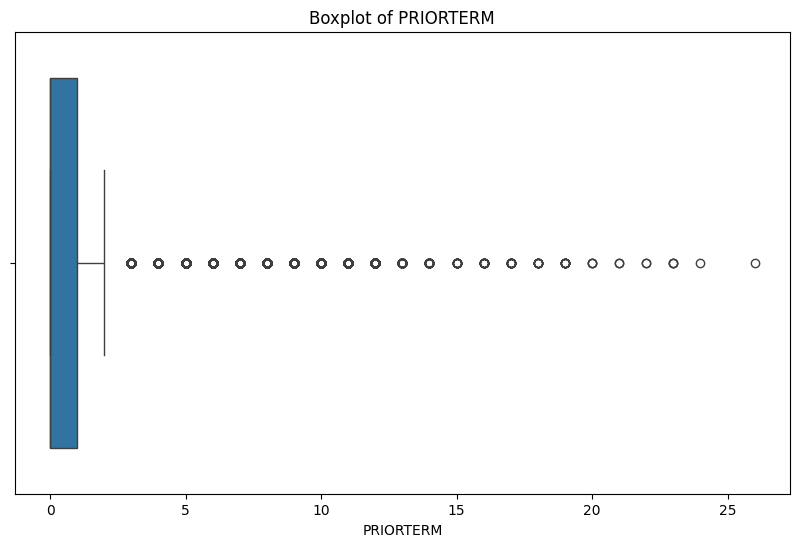

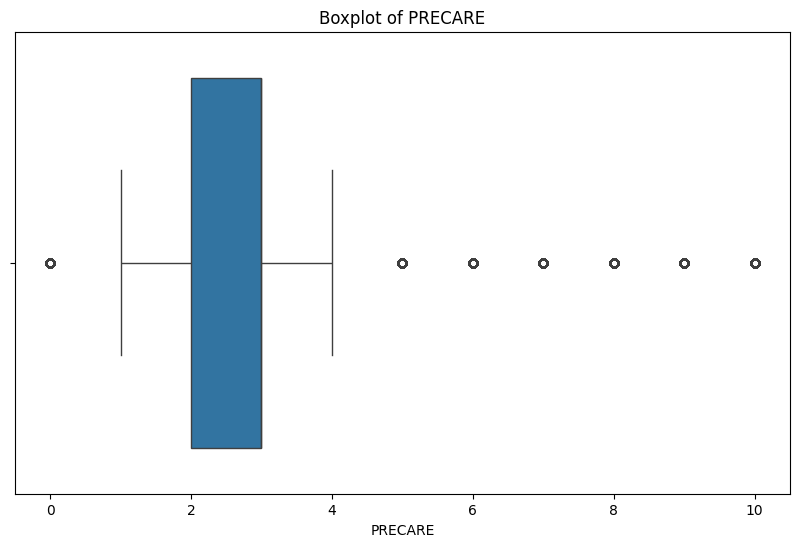

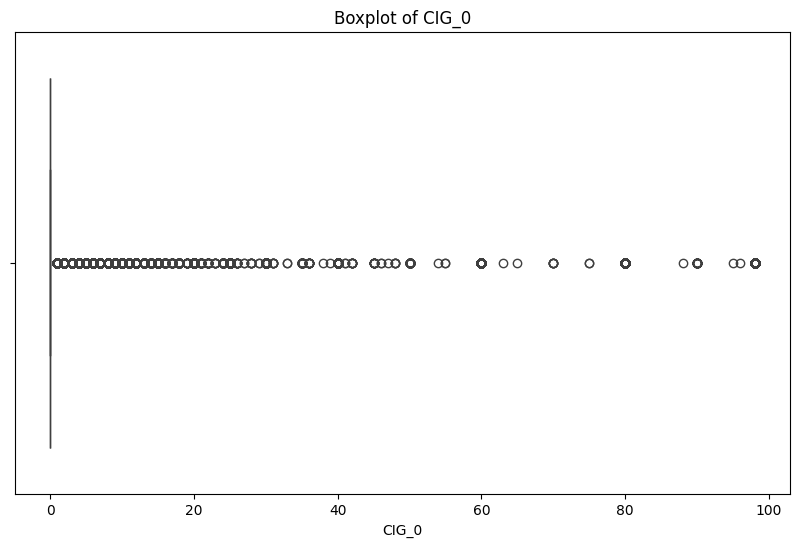

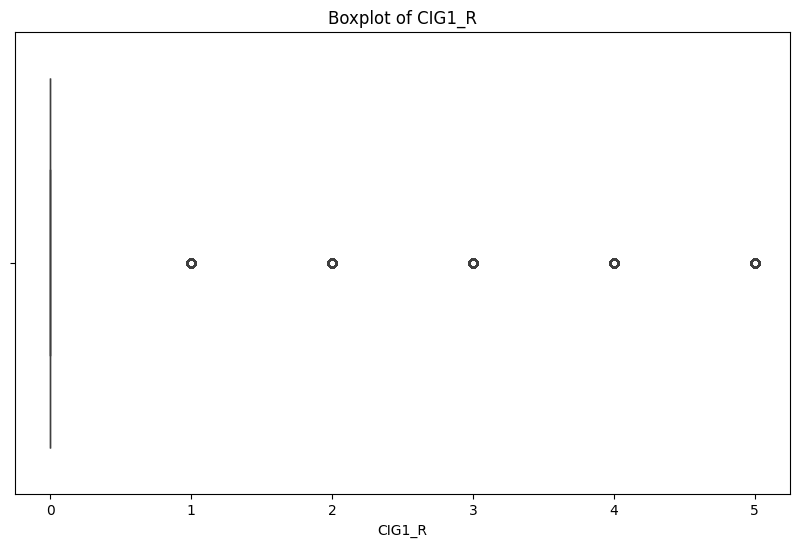

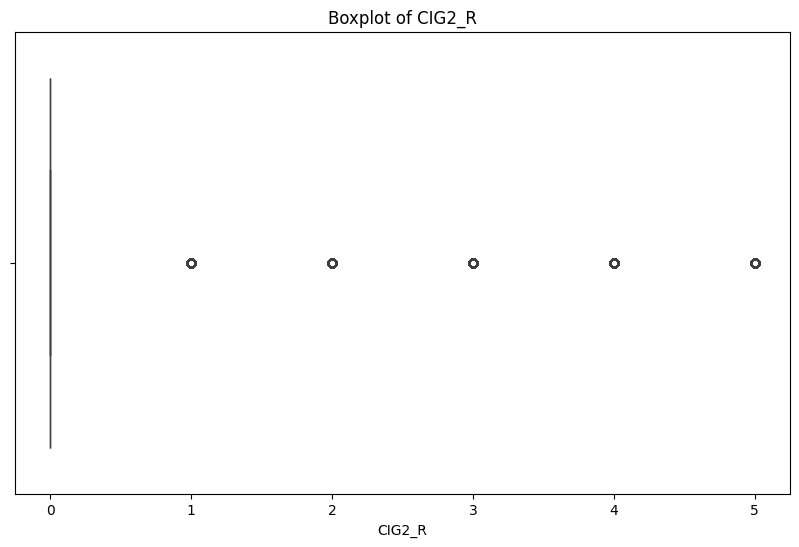

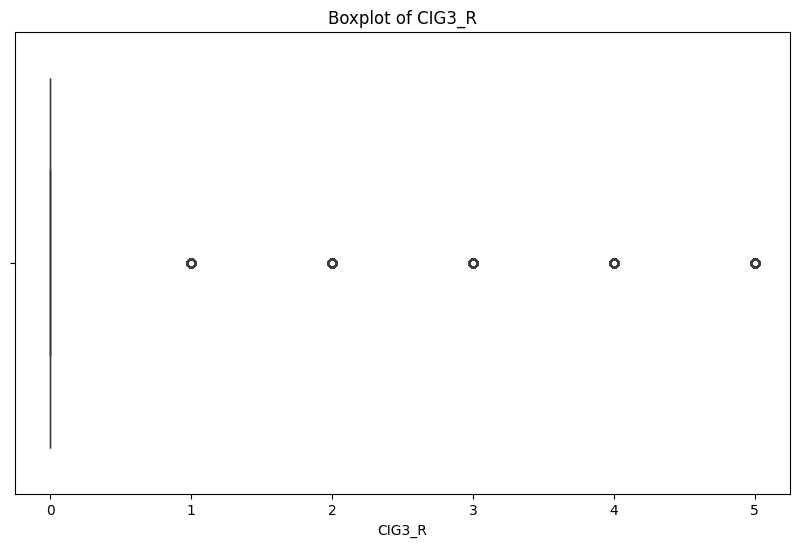

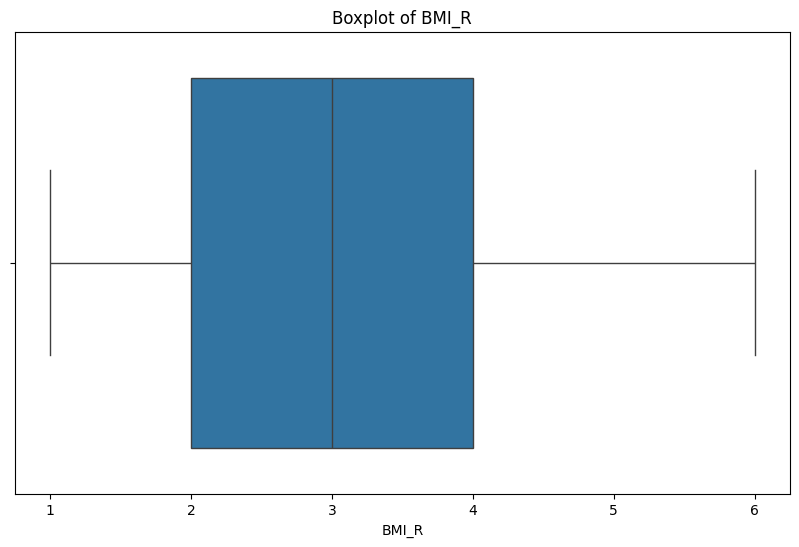

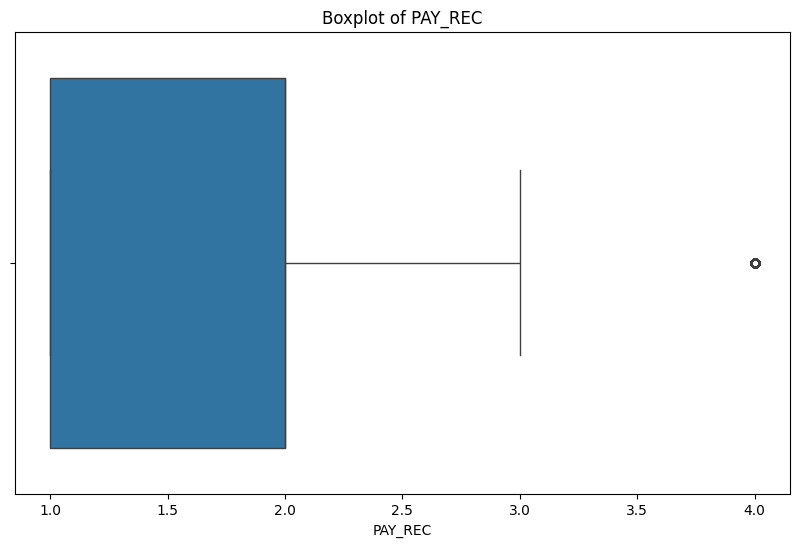

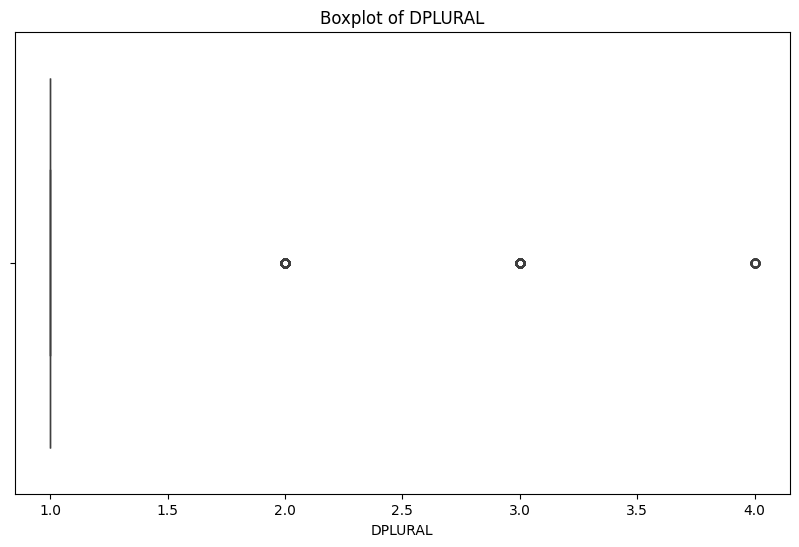

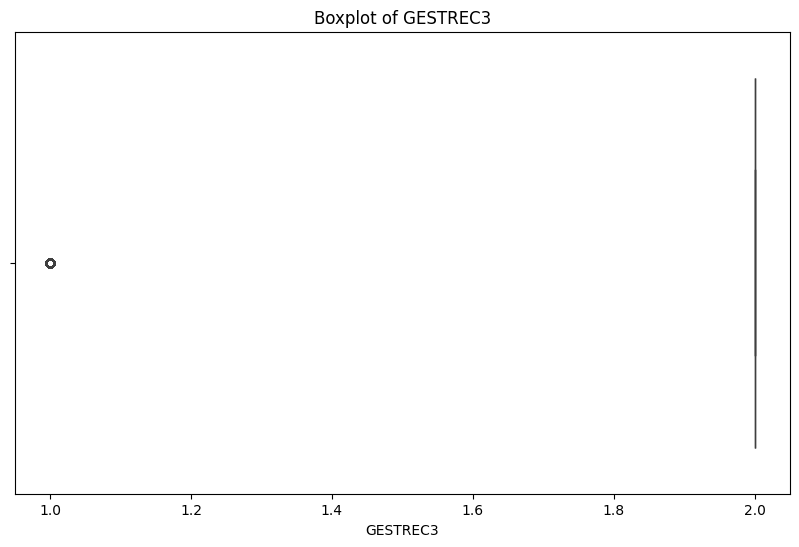

In [ ]:

# 10. Boxplots for Numerical Features
print("\nBoxplots for Numerical Features:")
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=combined_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


Scatterplots for Numerical Feature Pairs:


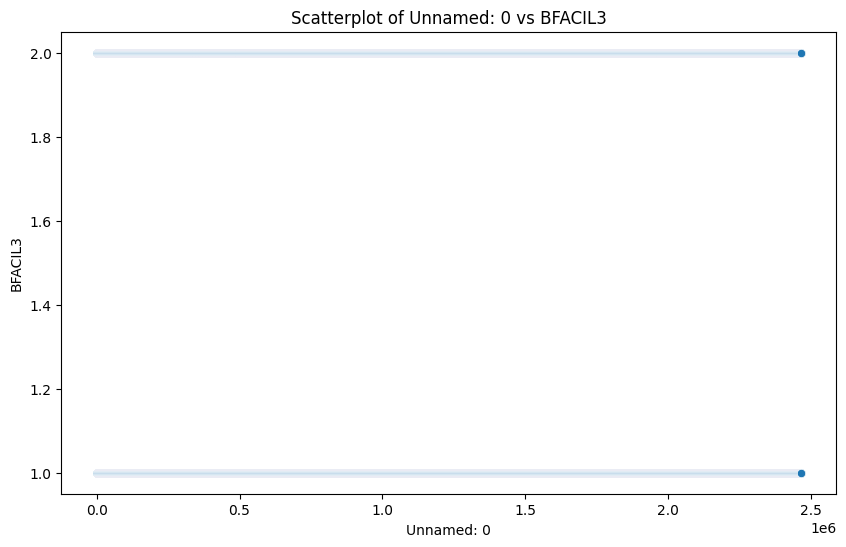

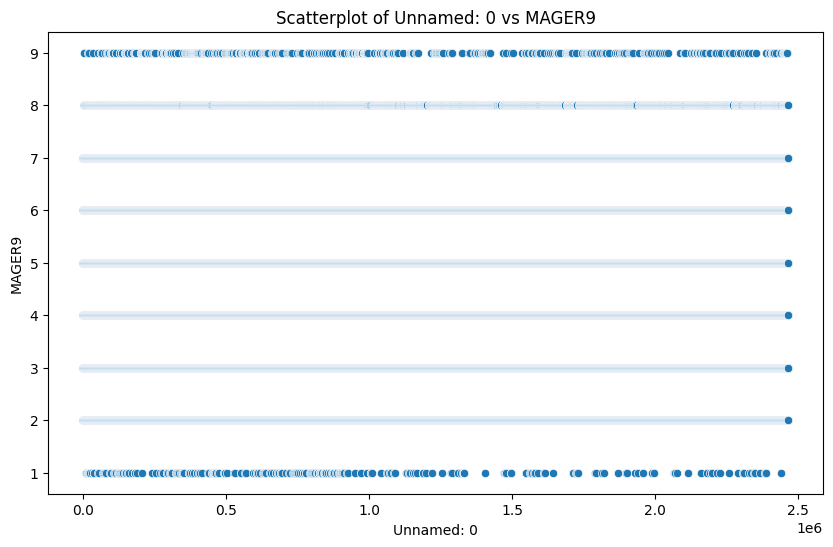

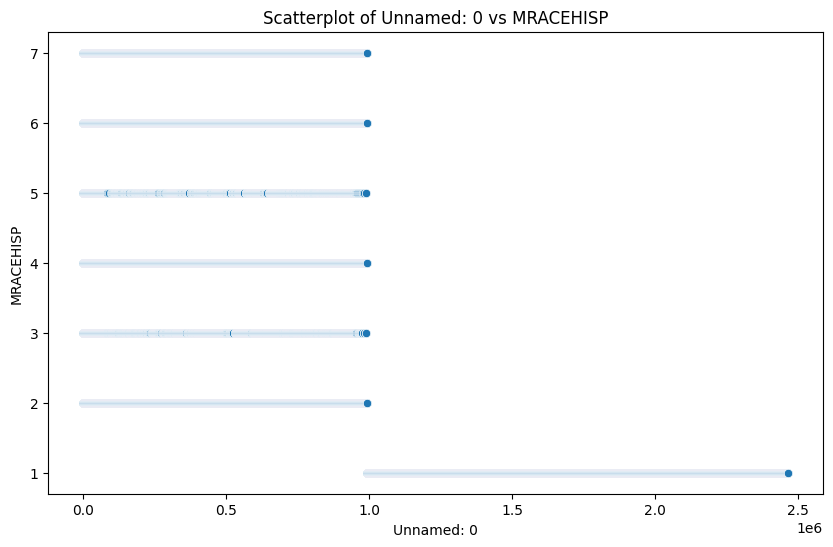

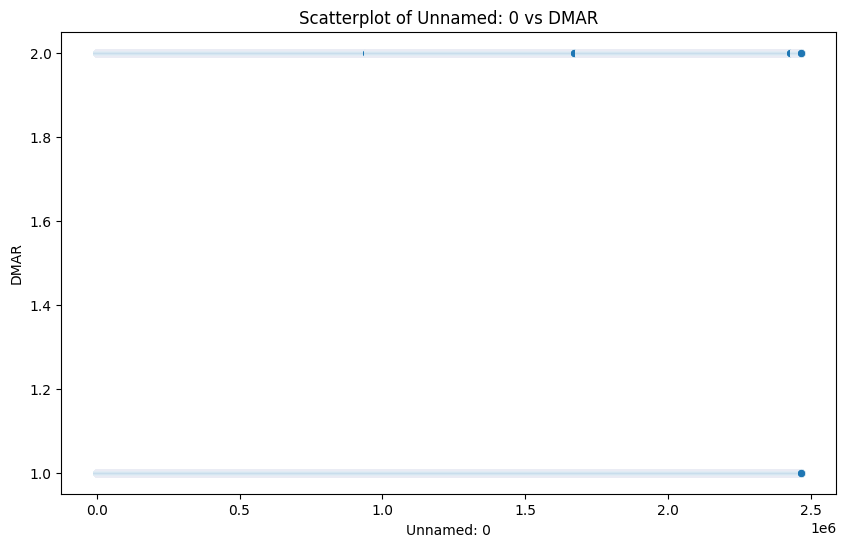

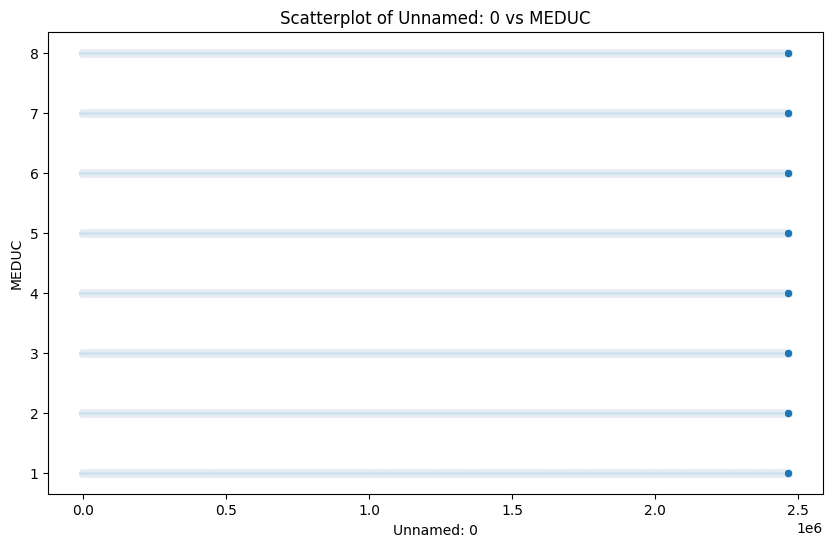

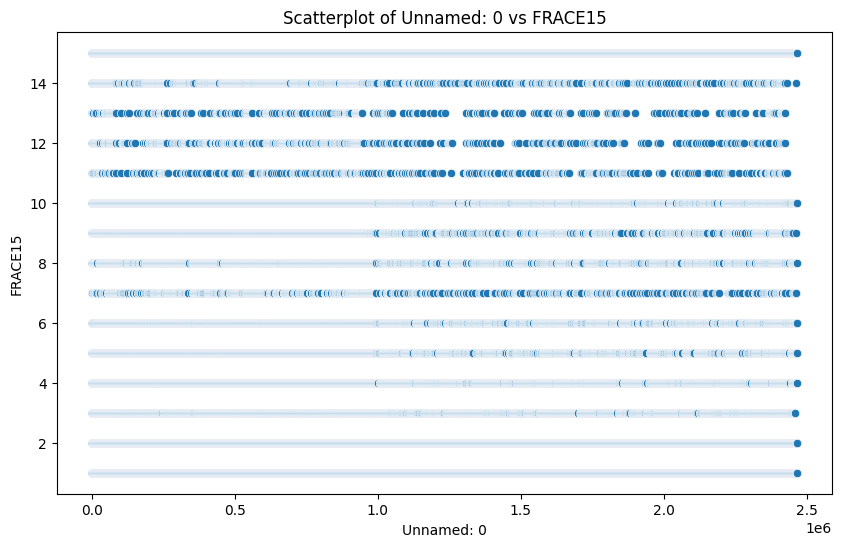

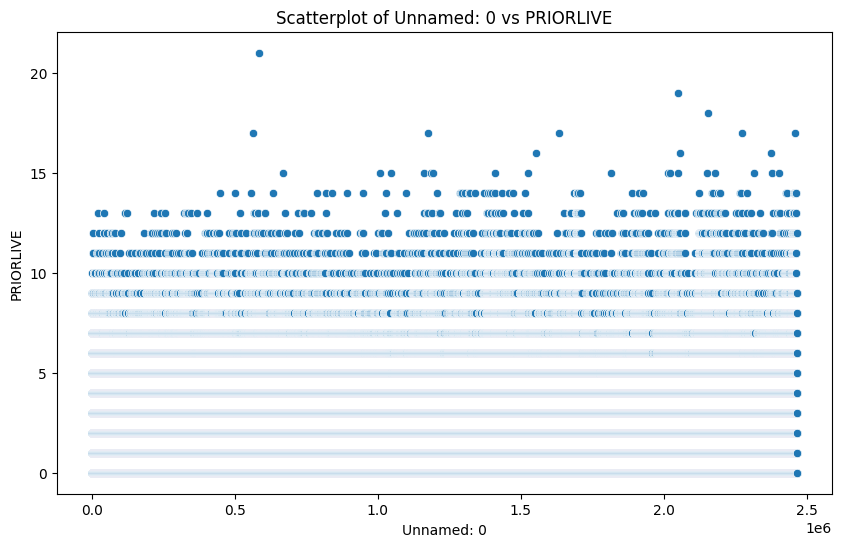

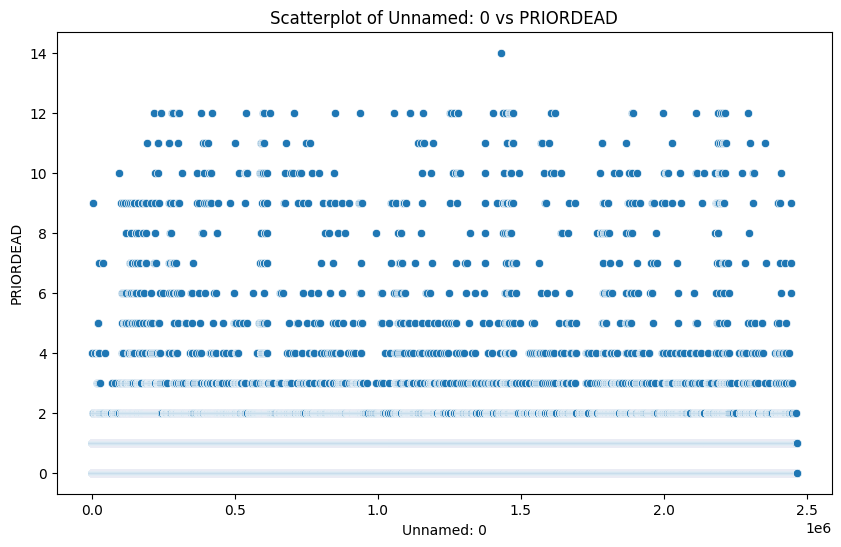

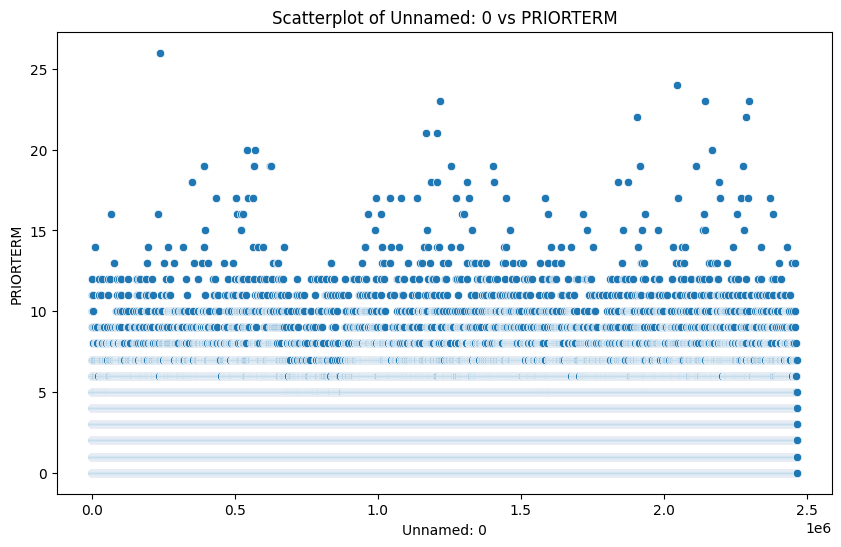

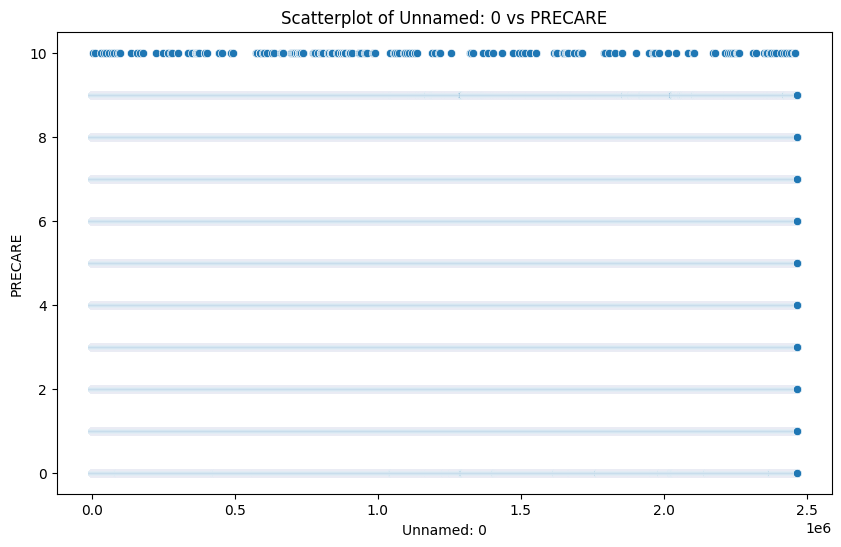

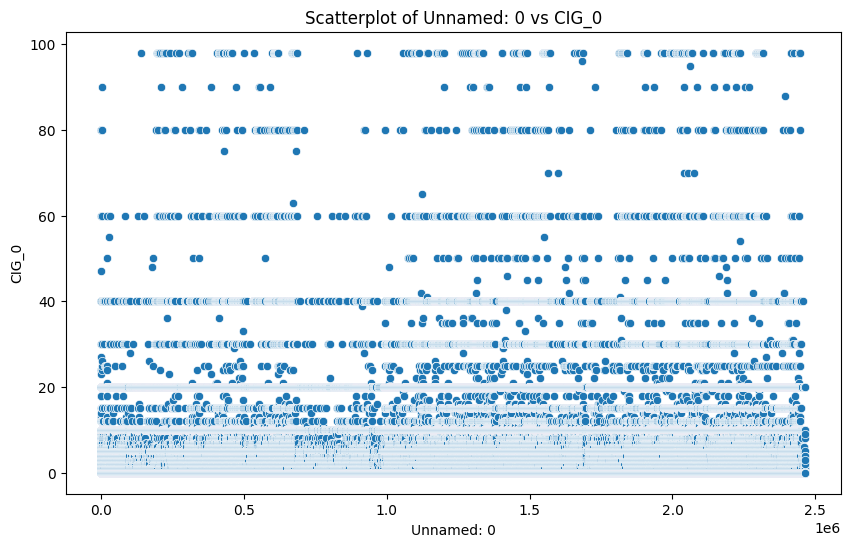

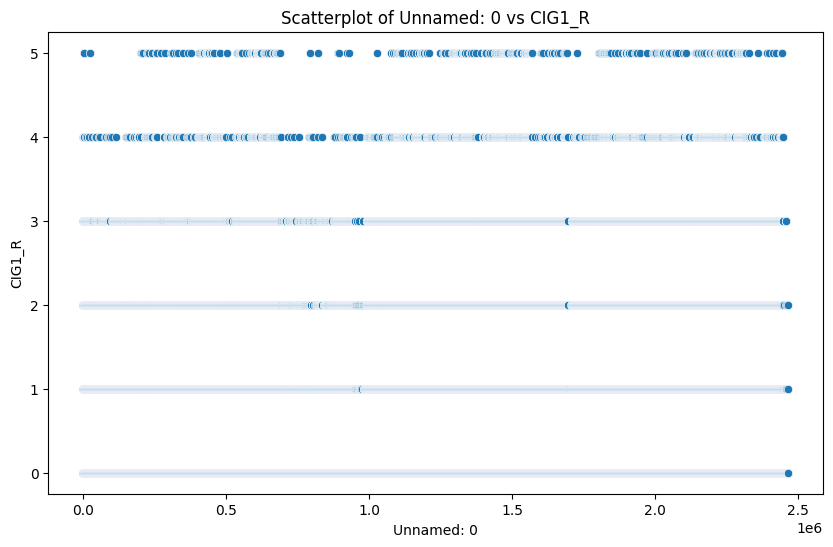

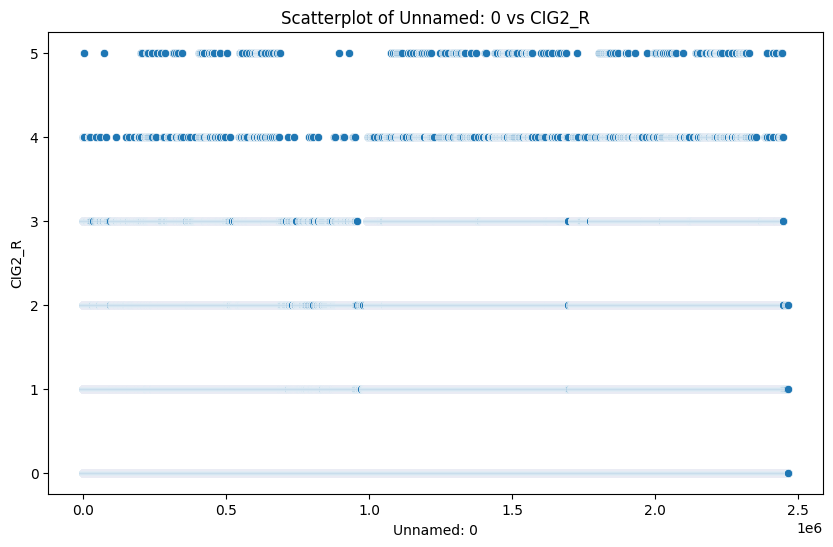

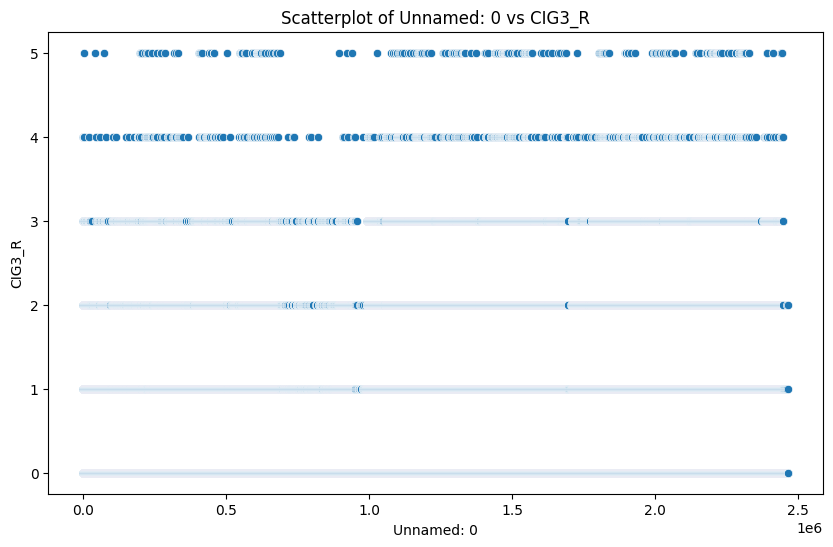

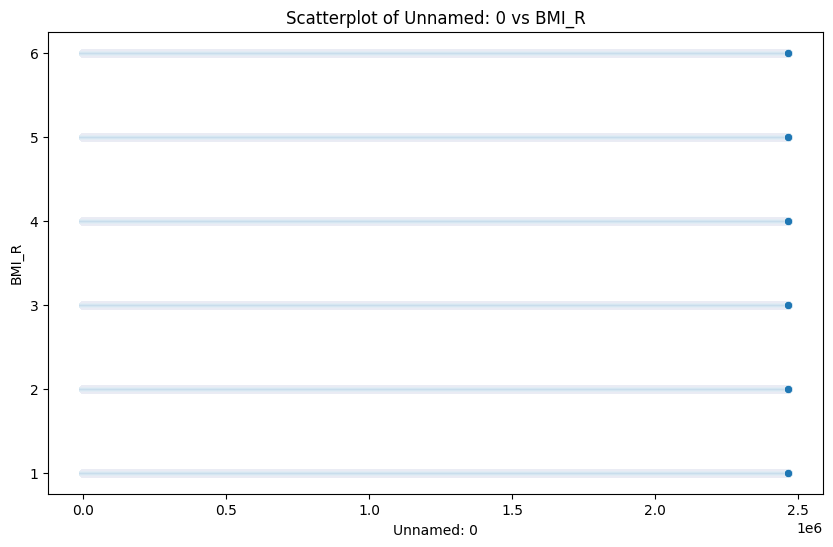

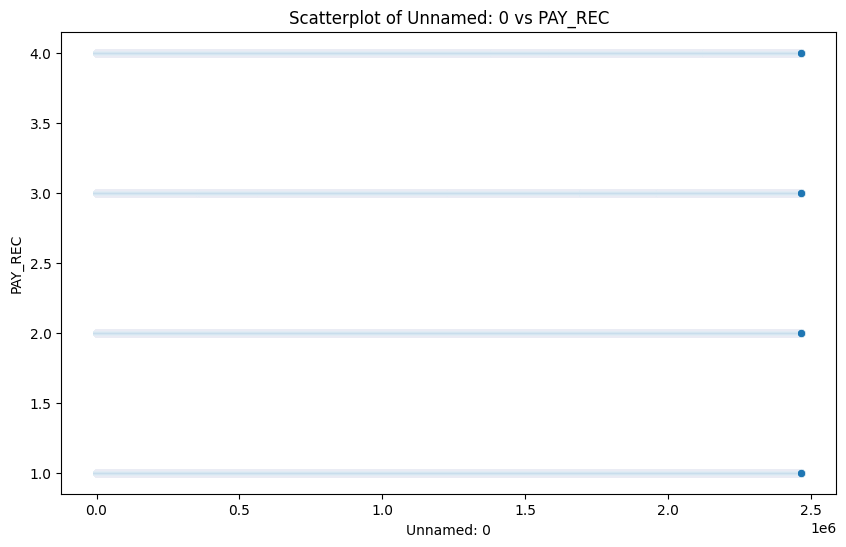

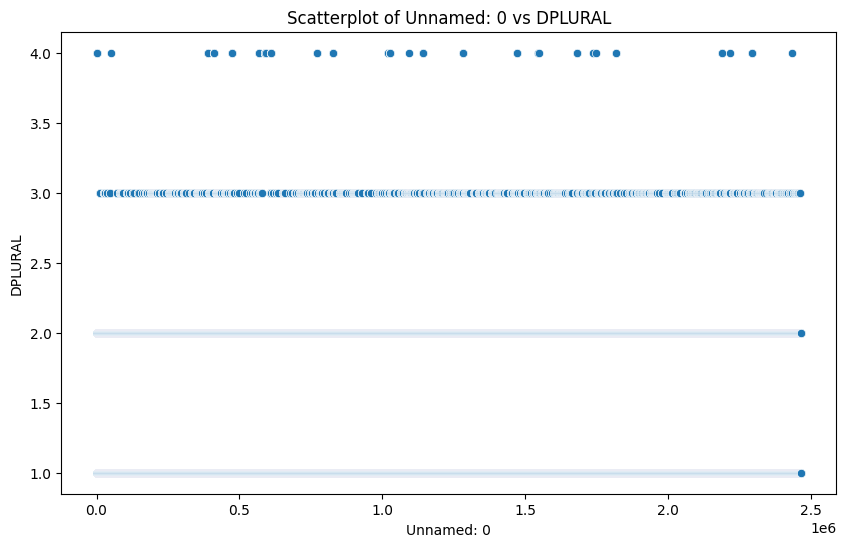

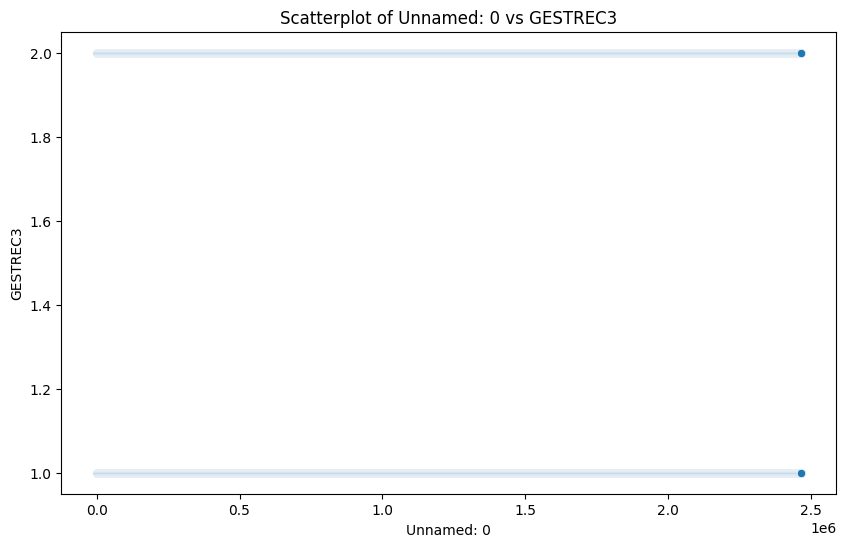

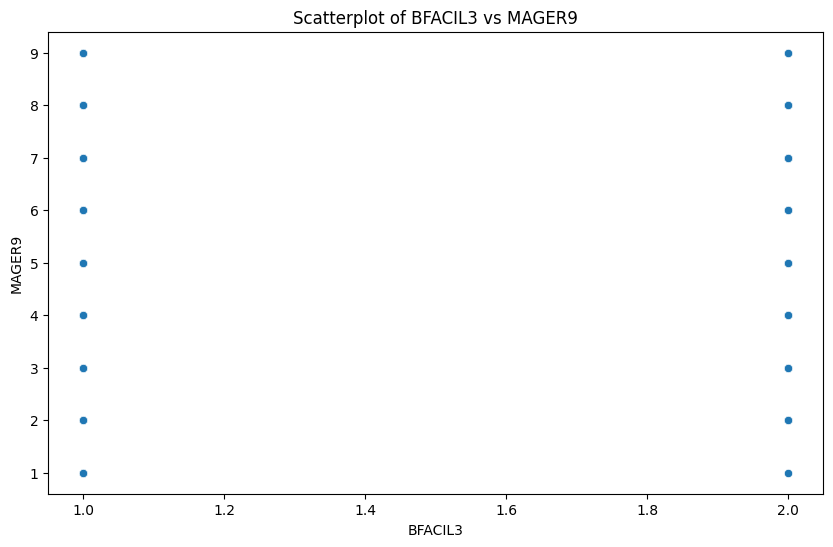

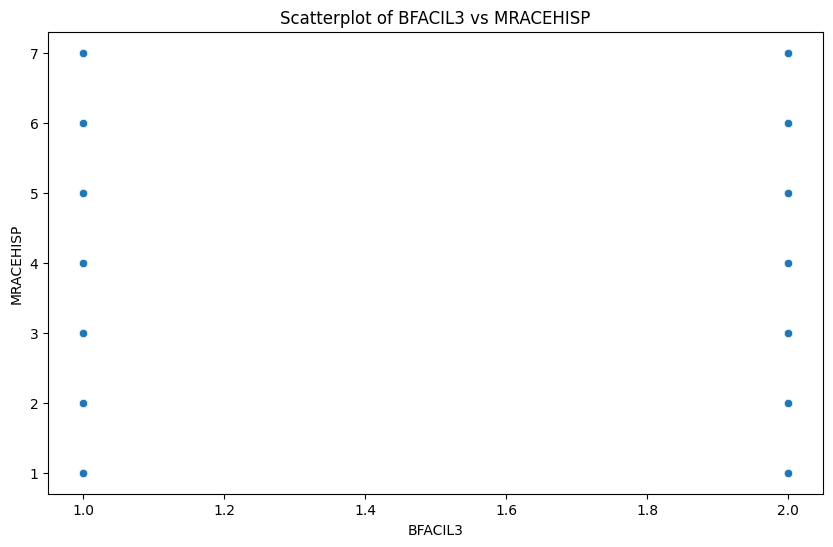

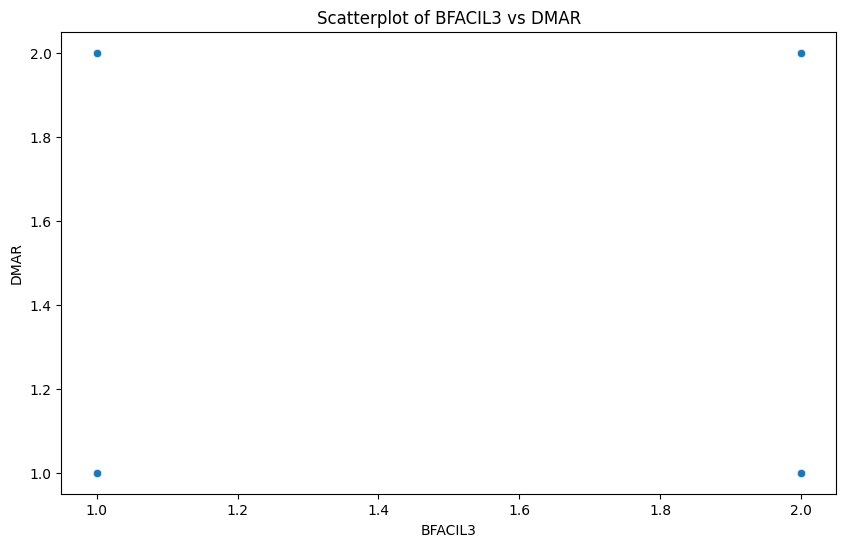

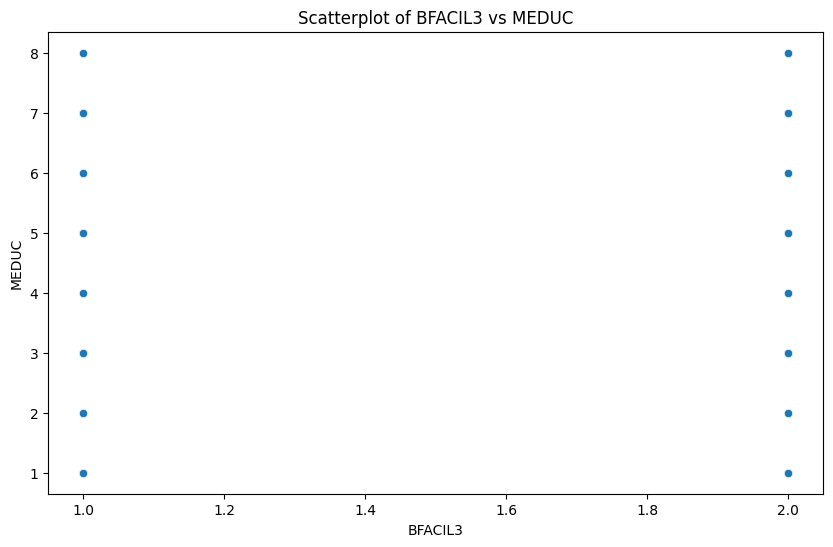

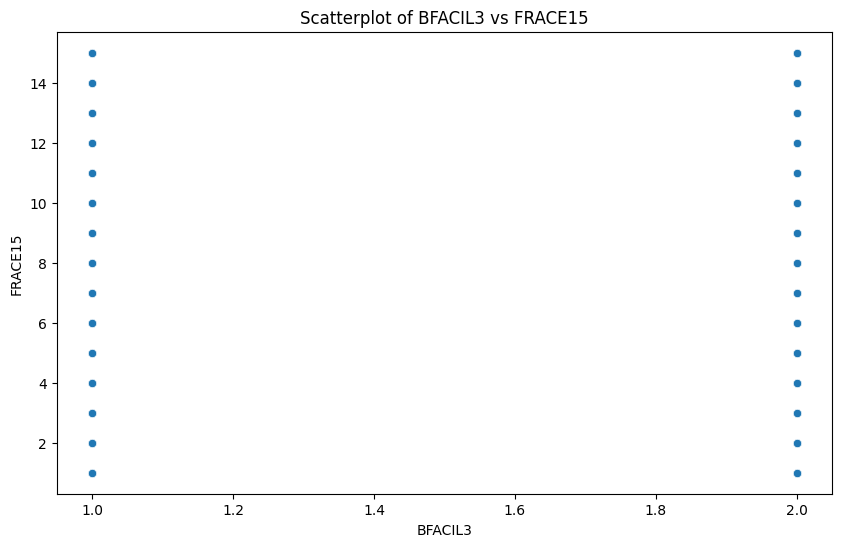

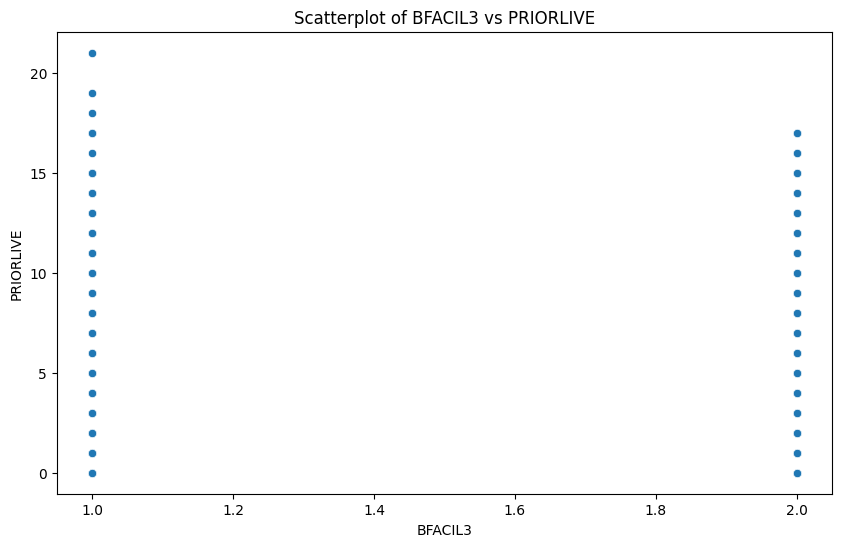

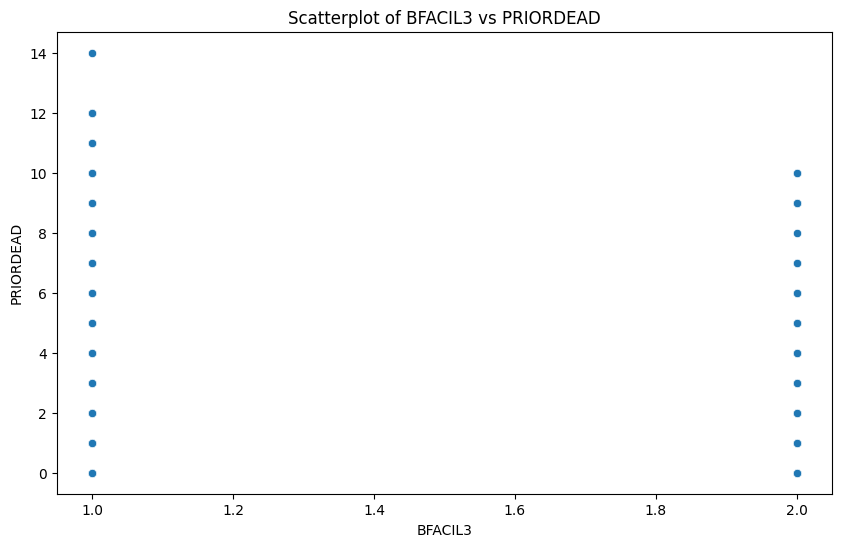

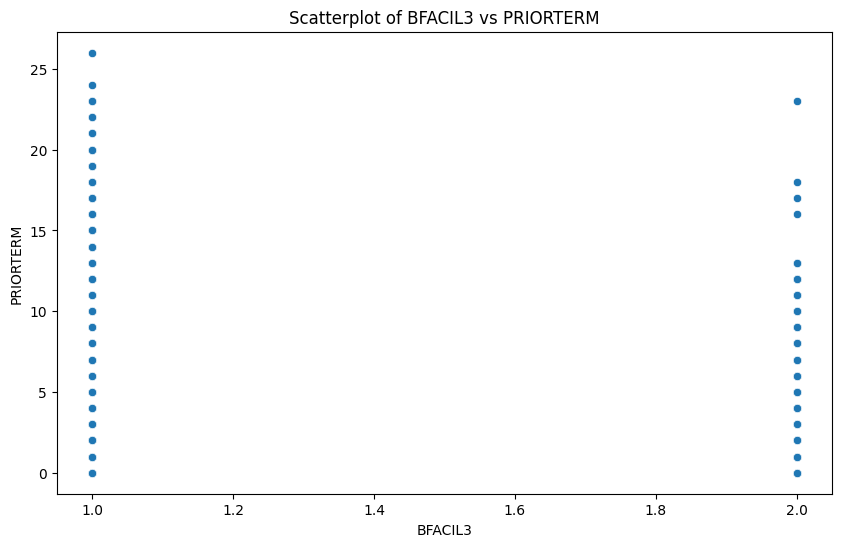

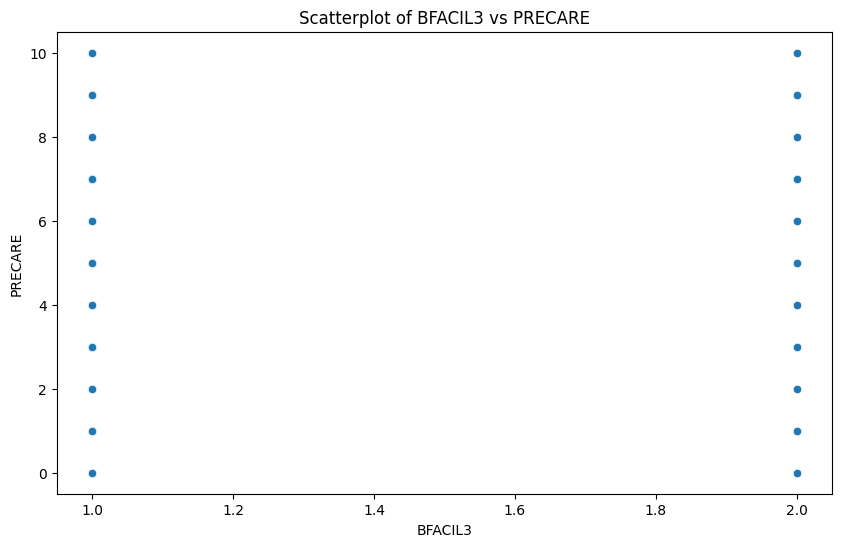

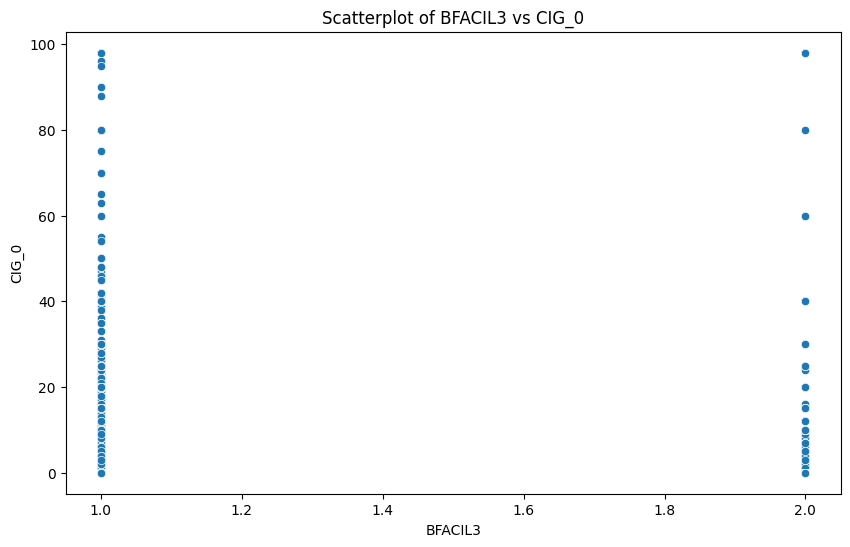

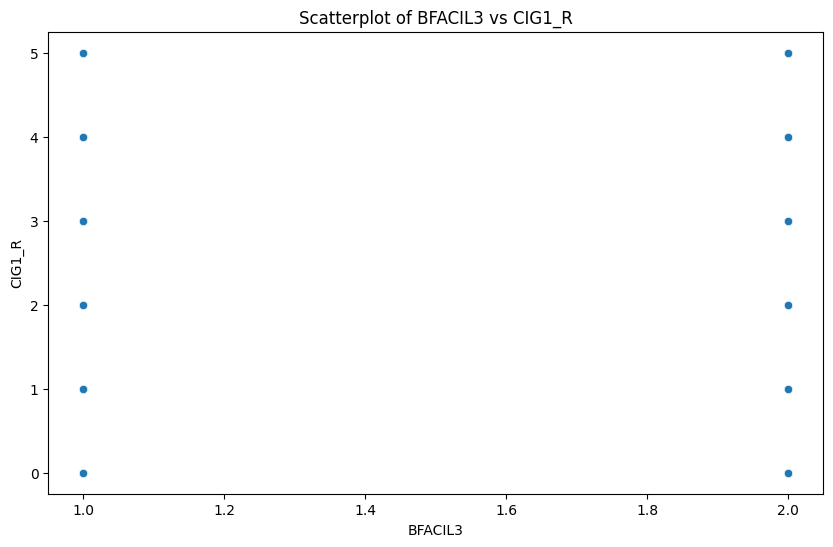

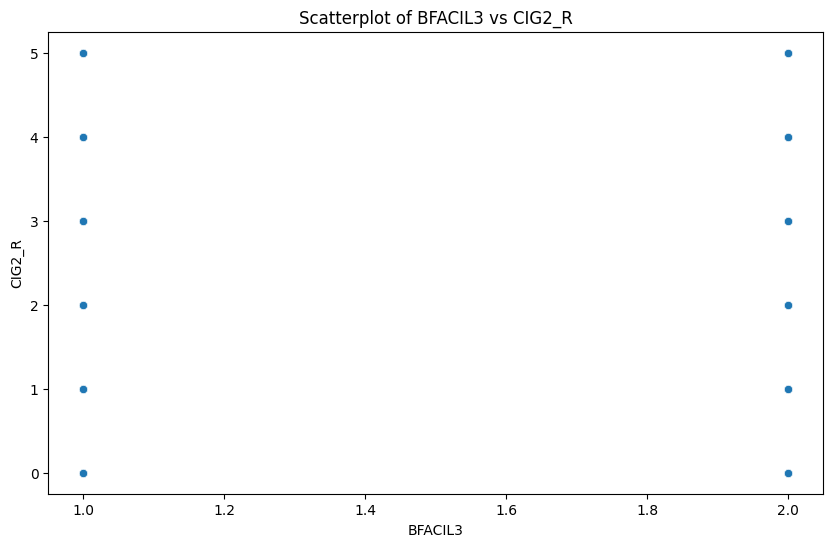

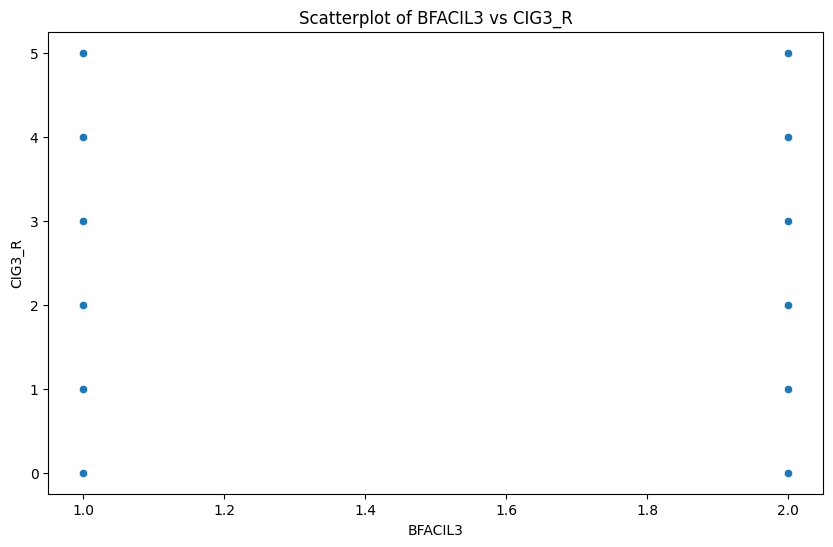

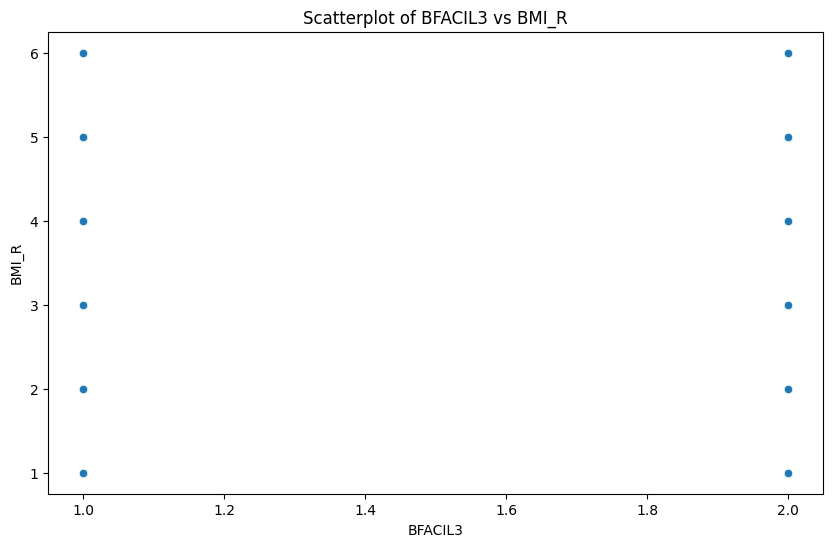

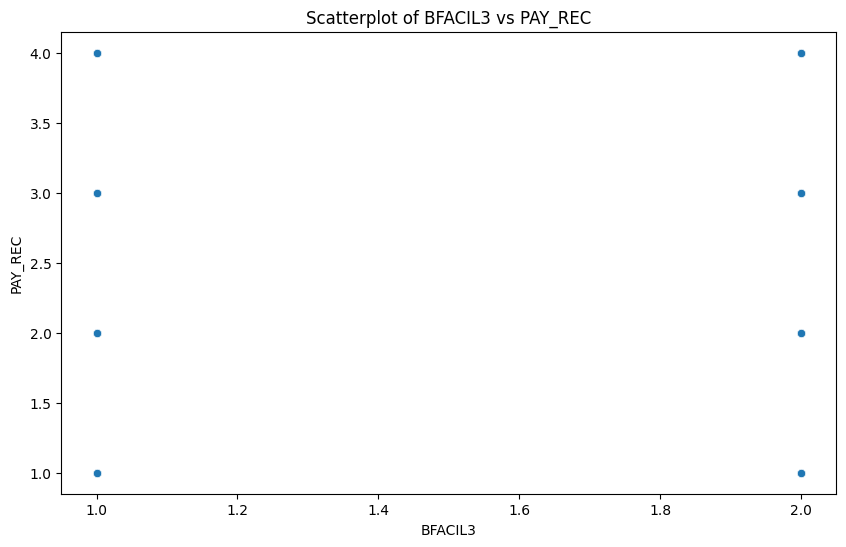

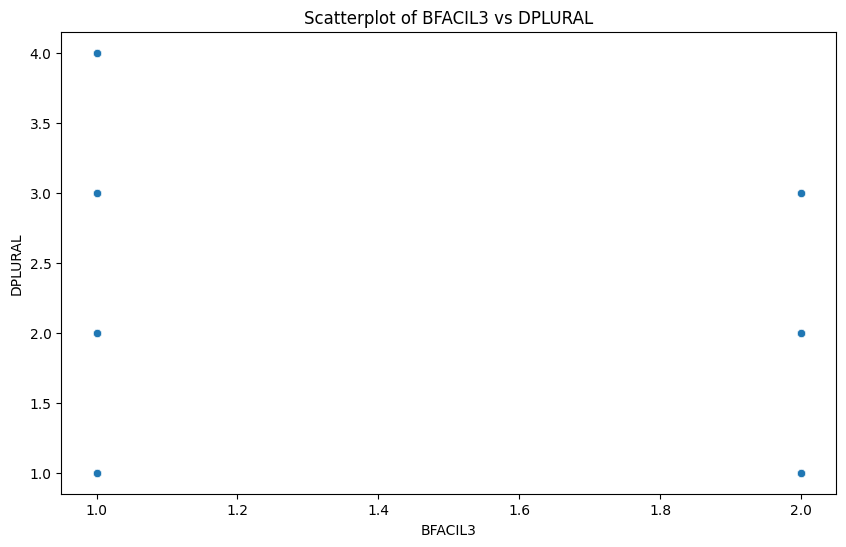

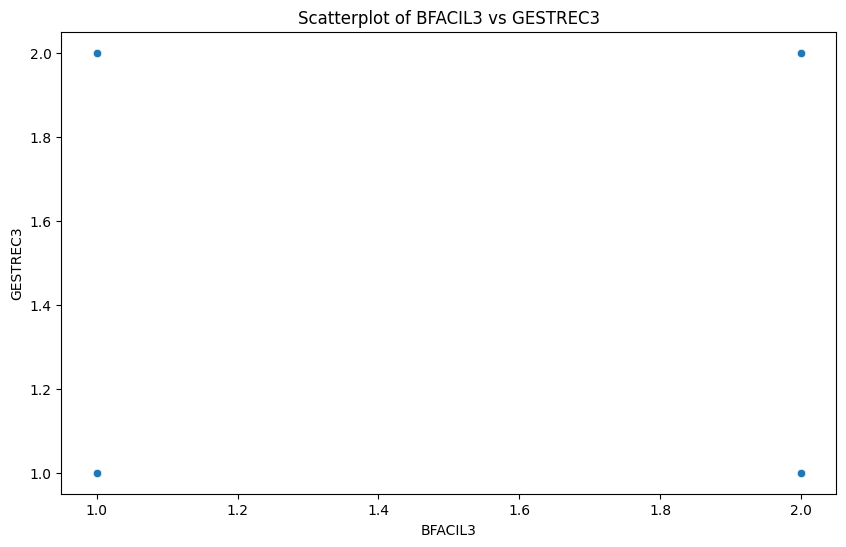

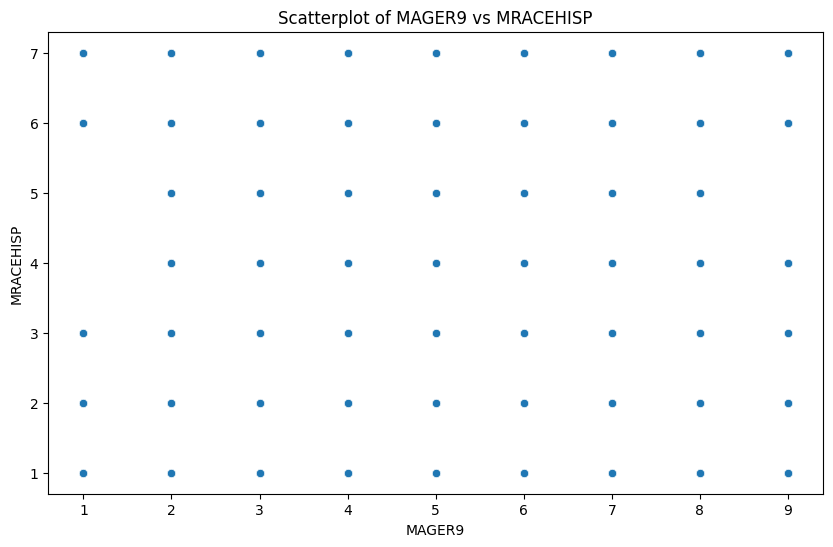

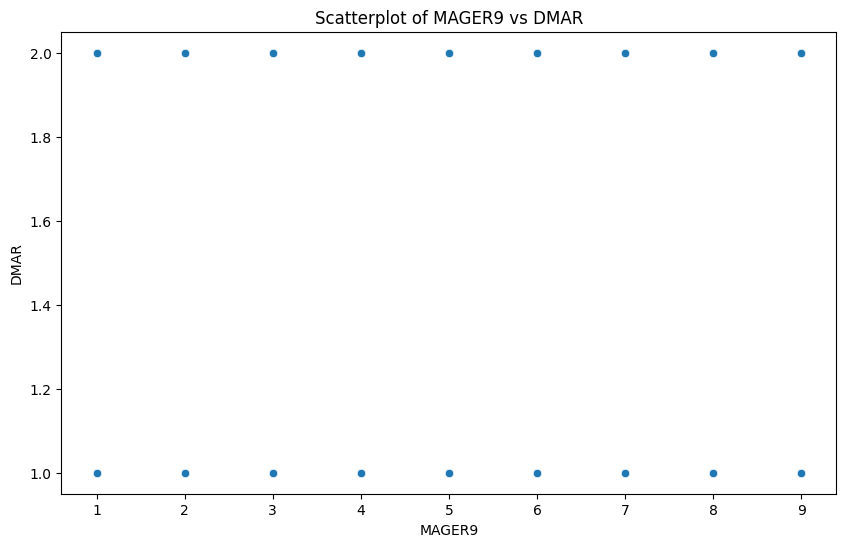

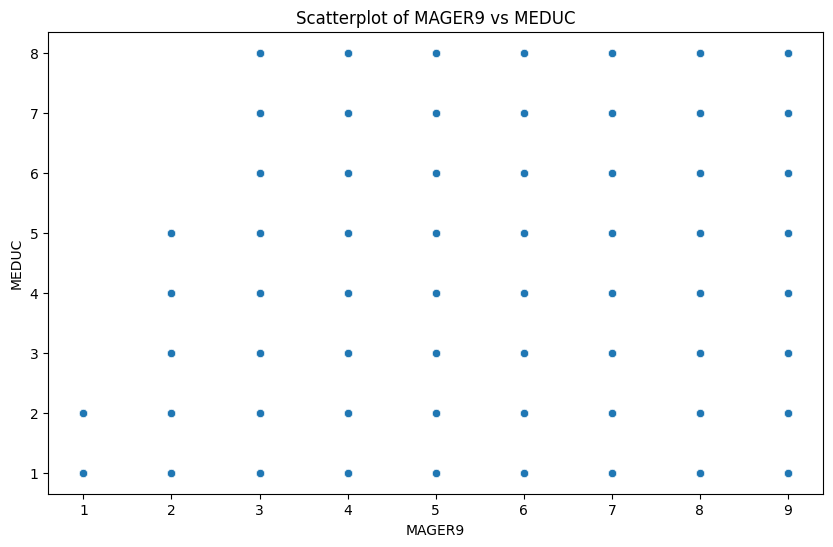

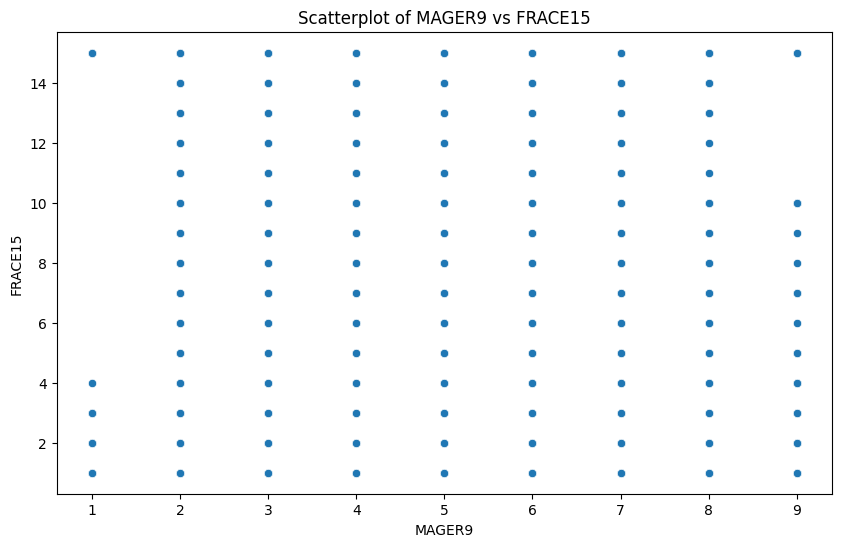

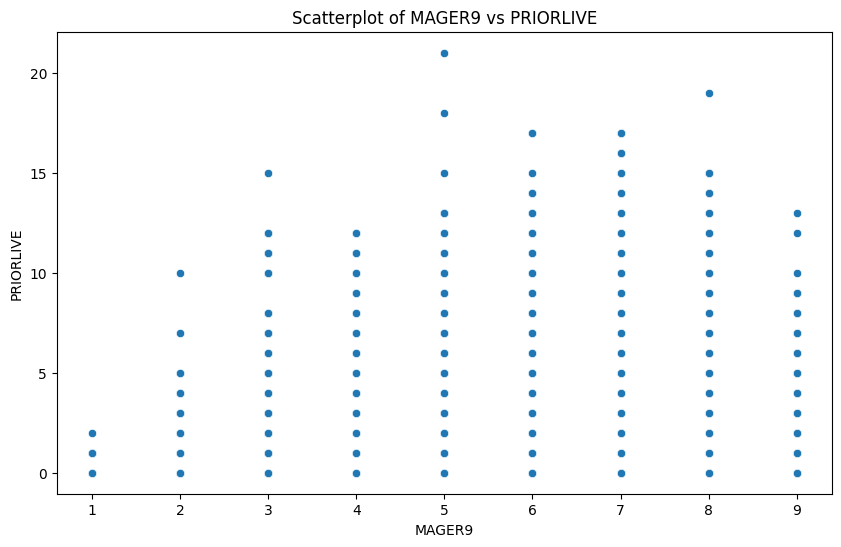

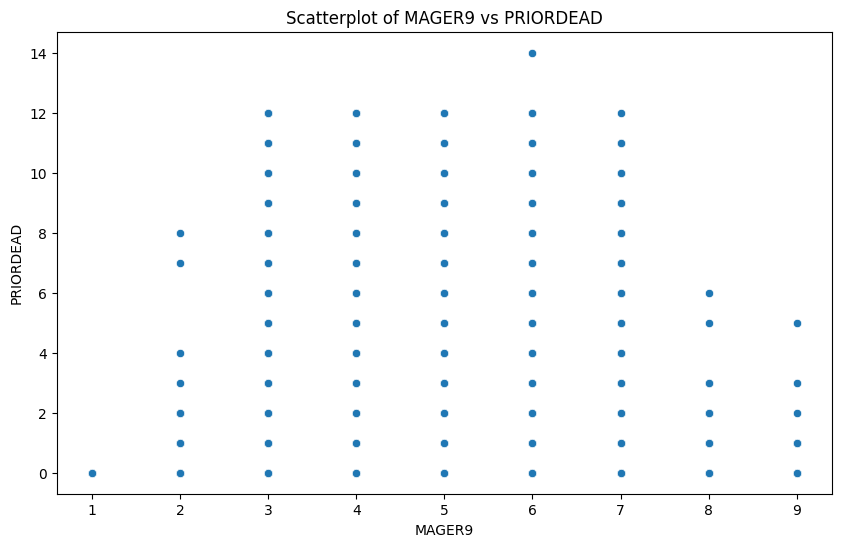

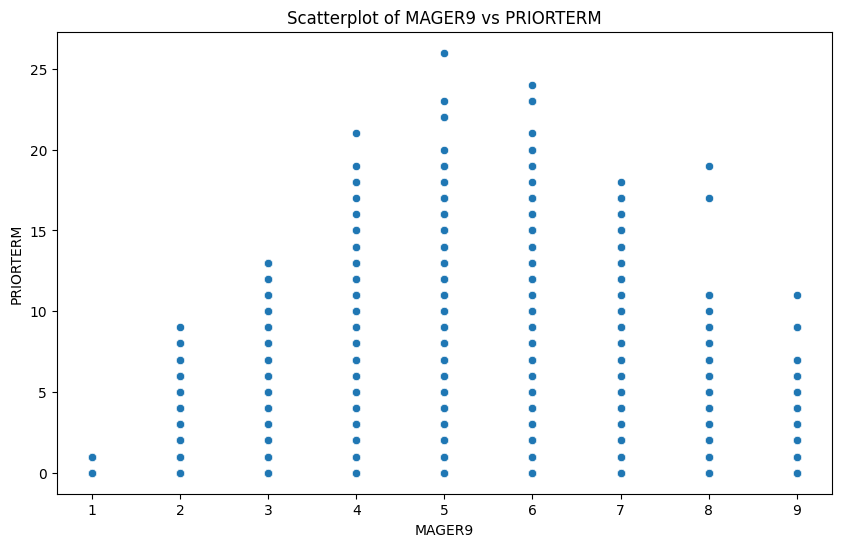

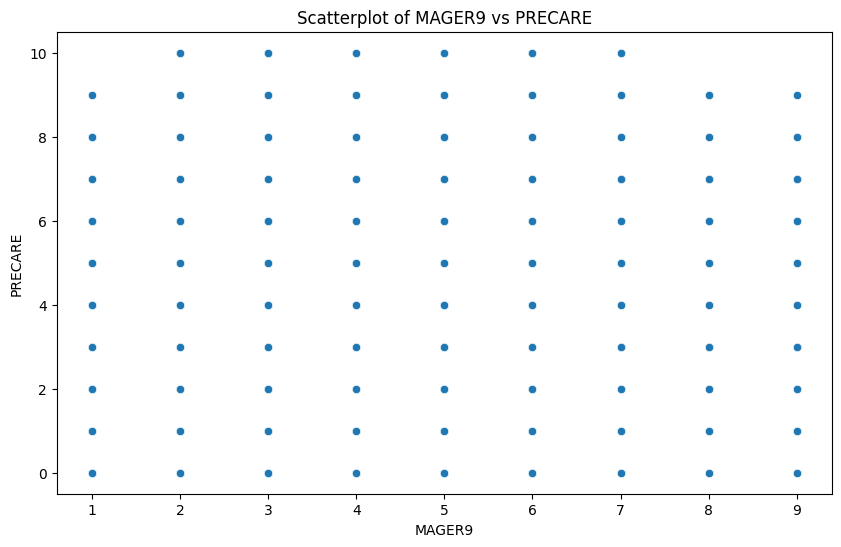

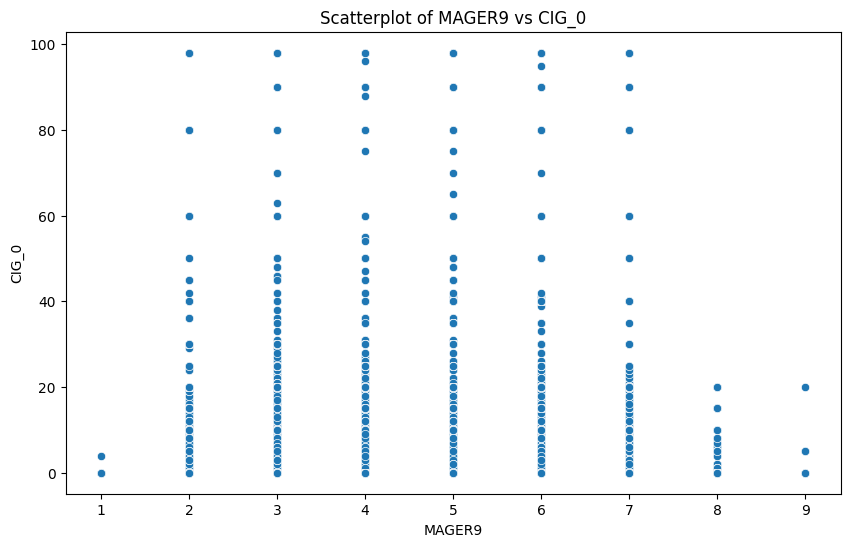

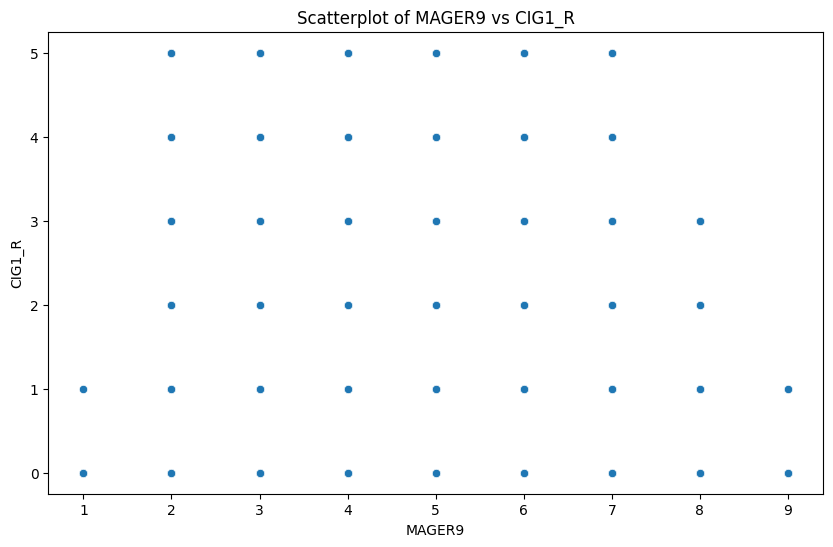

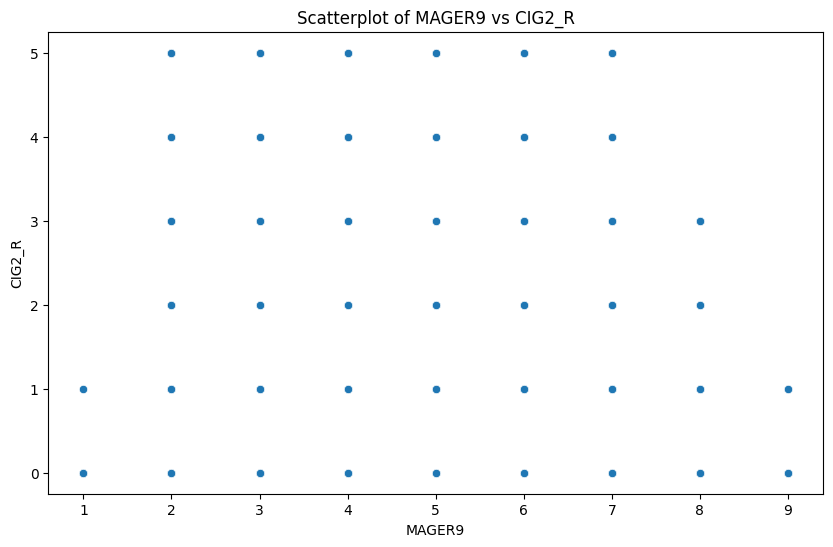

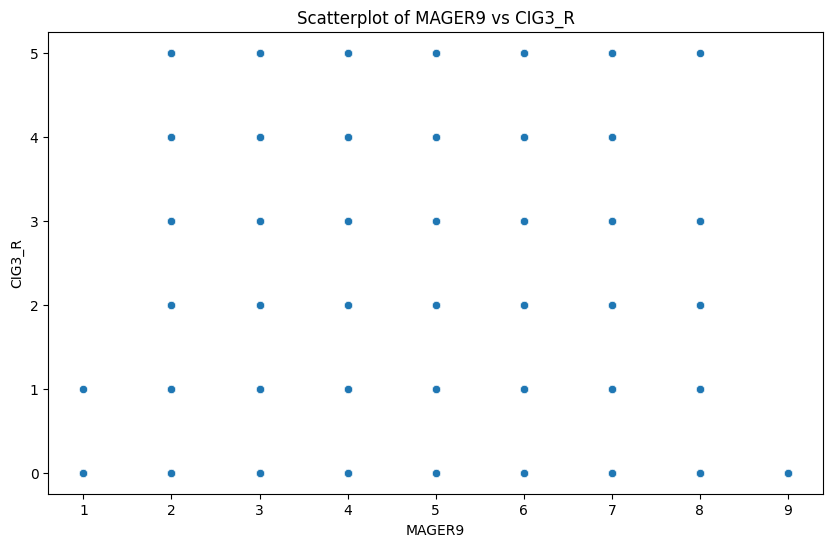

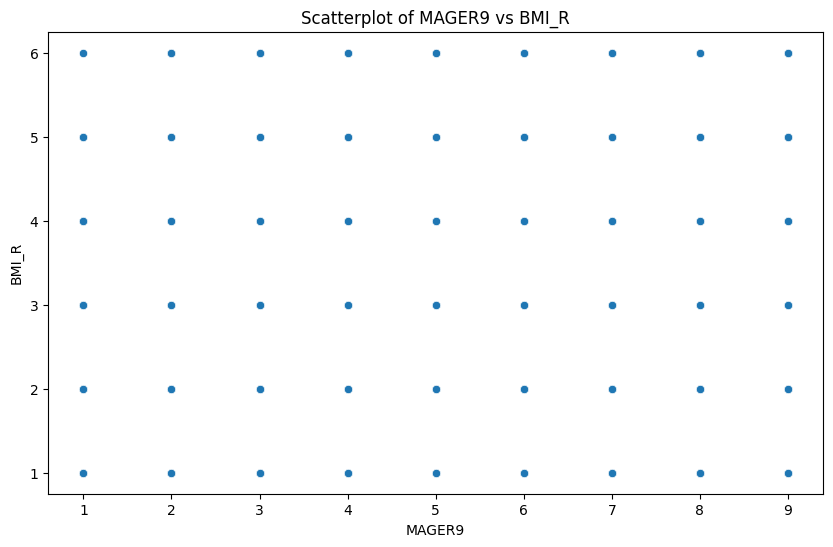

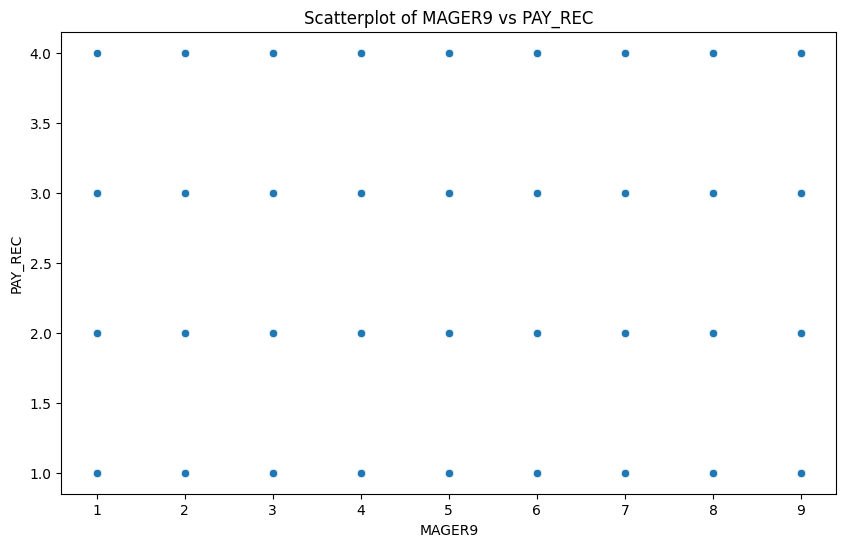

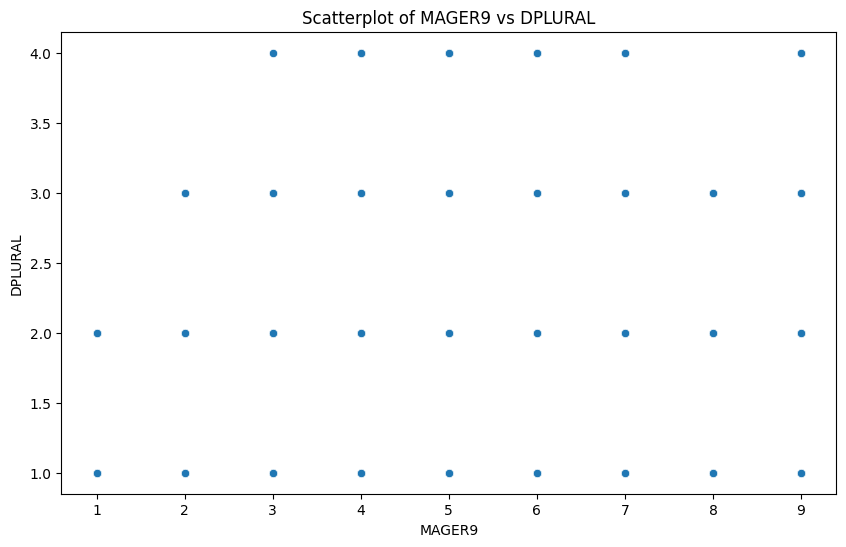

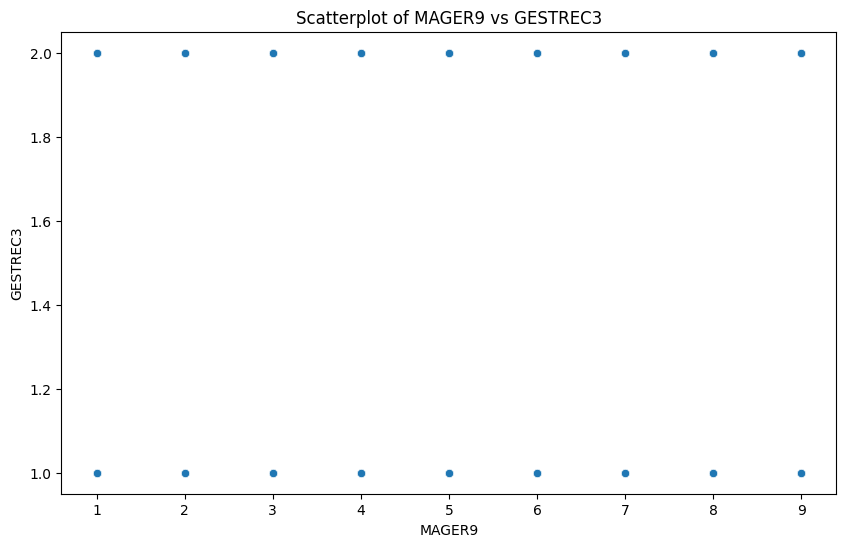

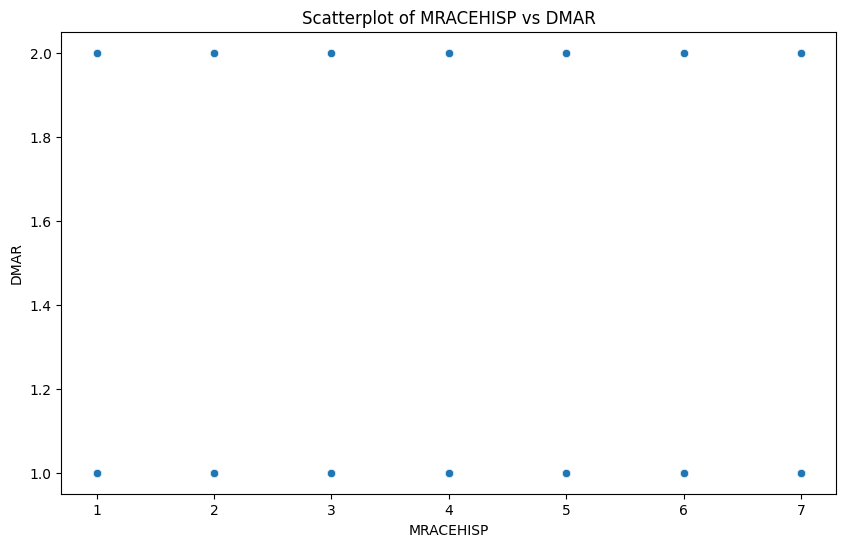

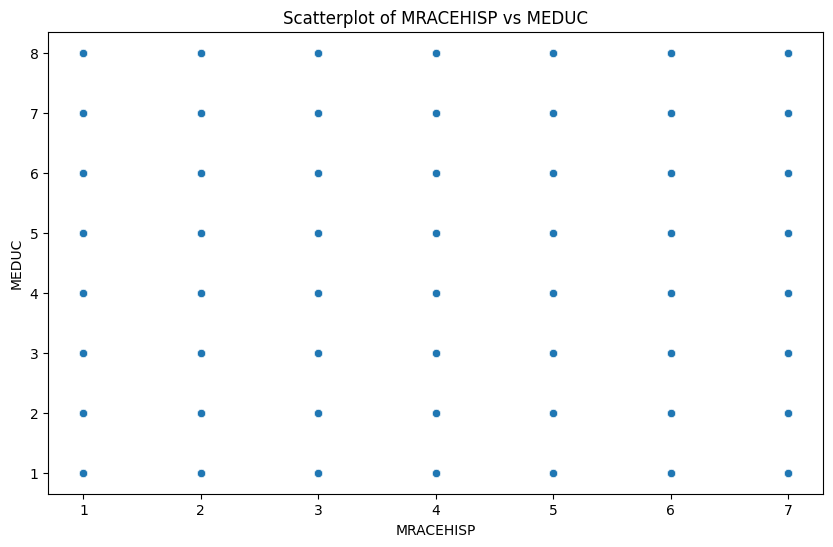

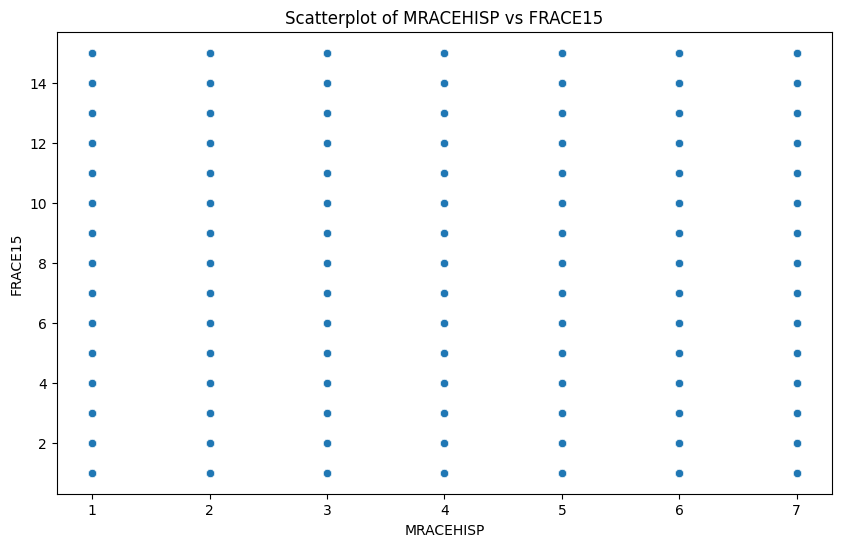

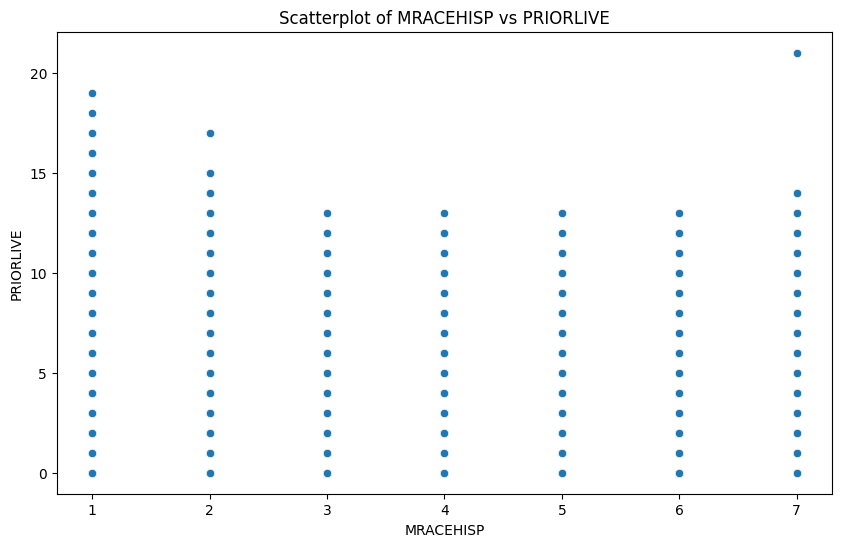

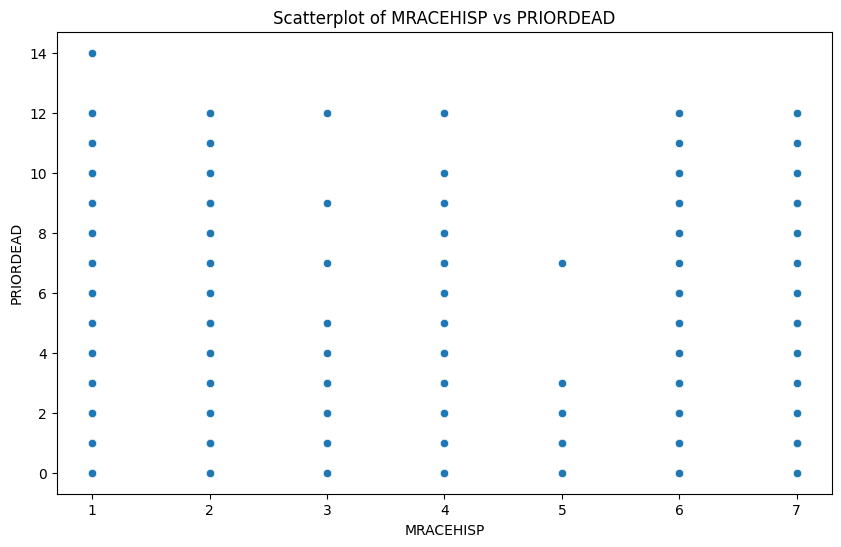

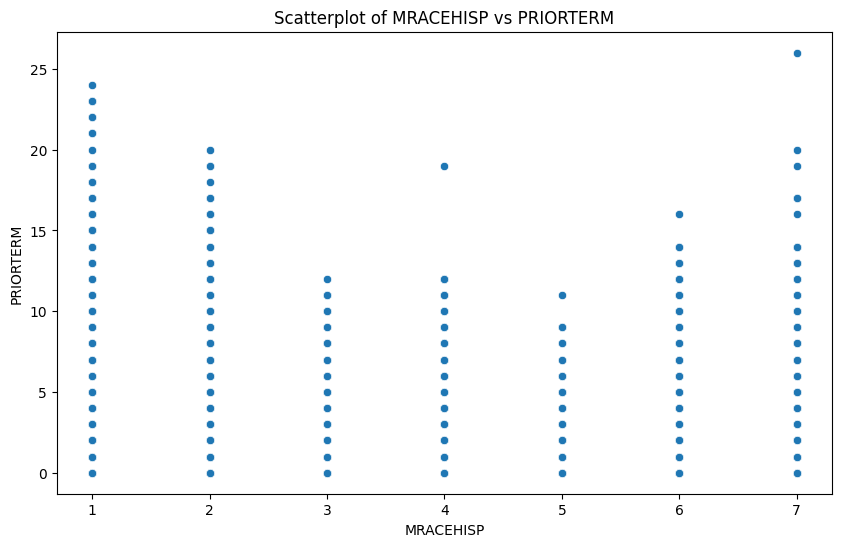

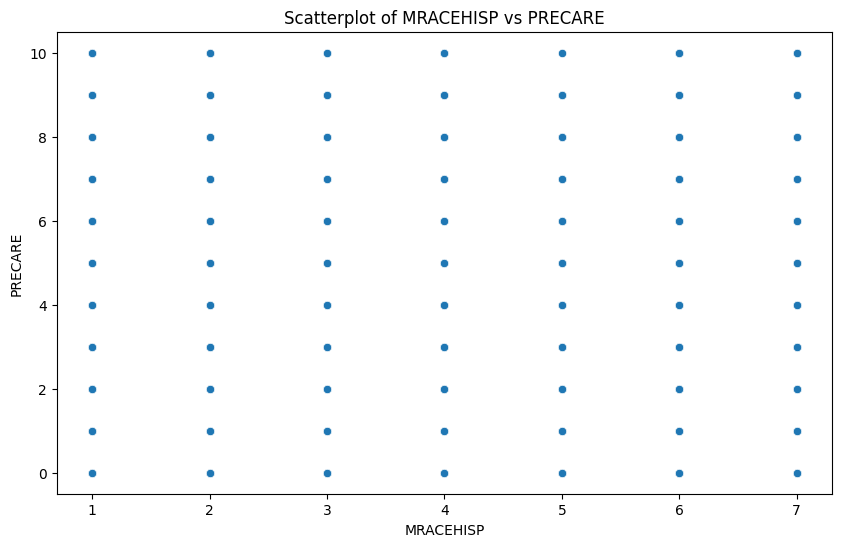

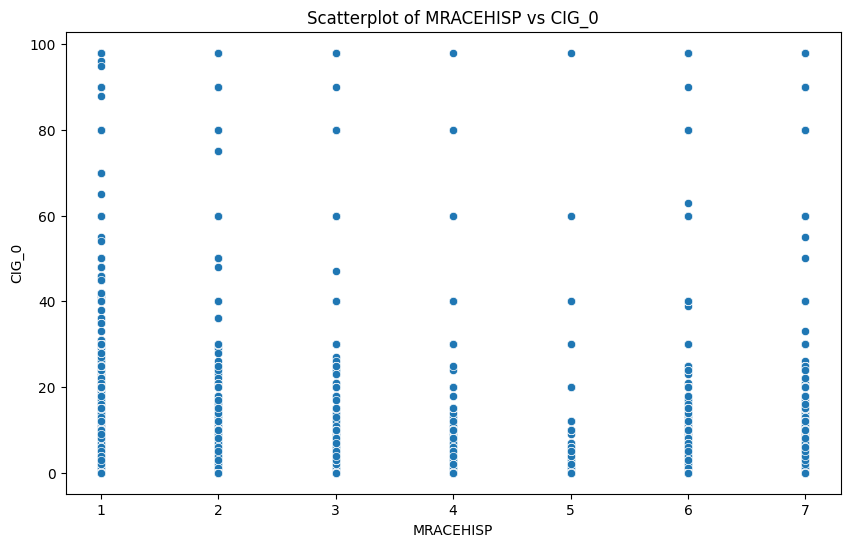

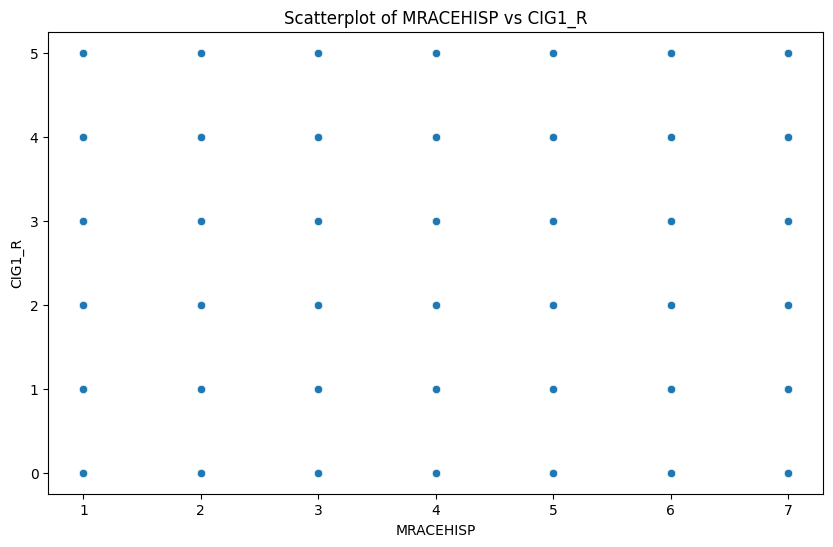

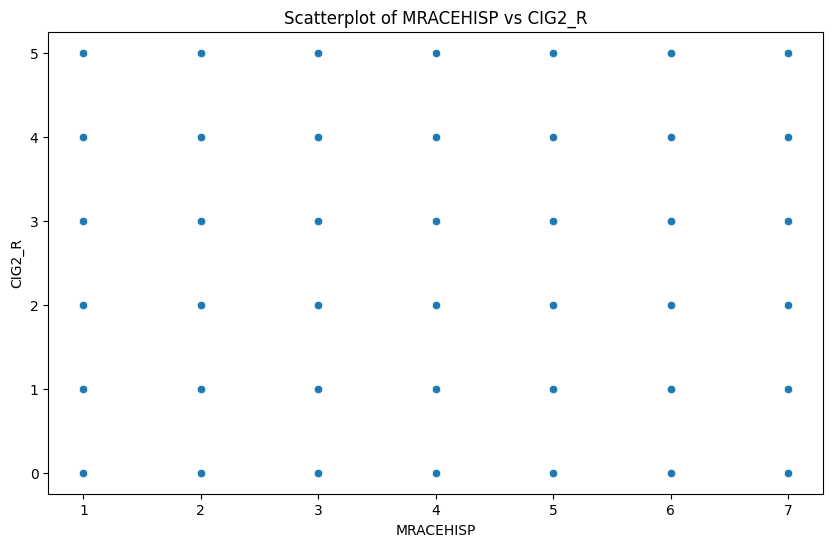

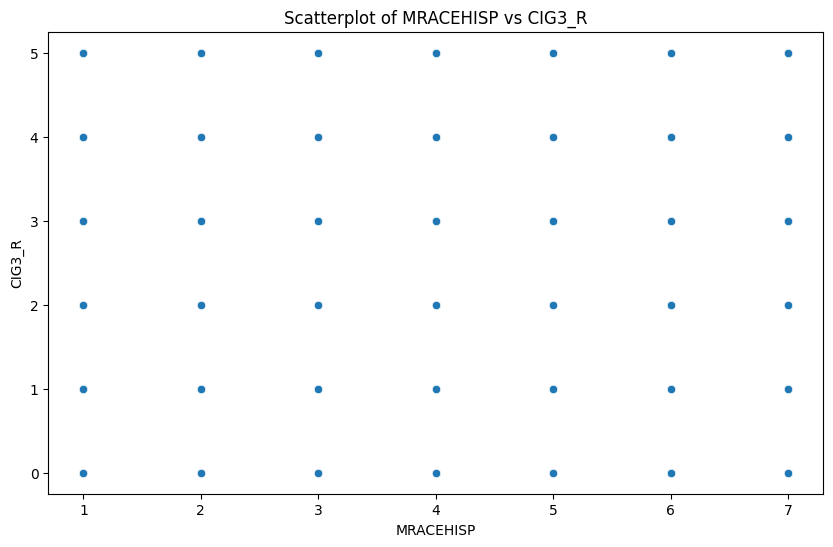

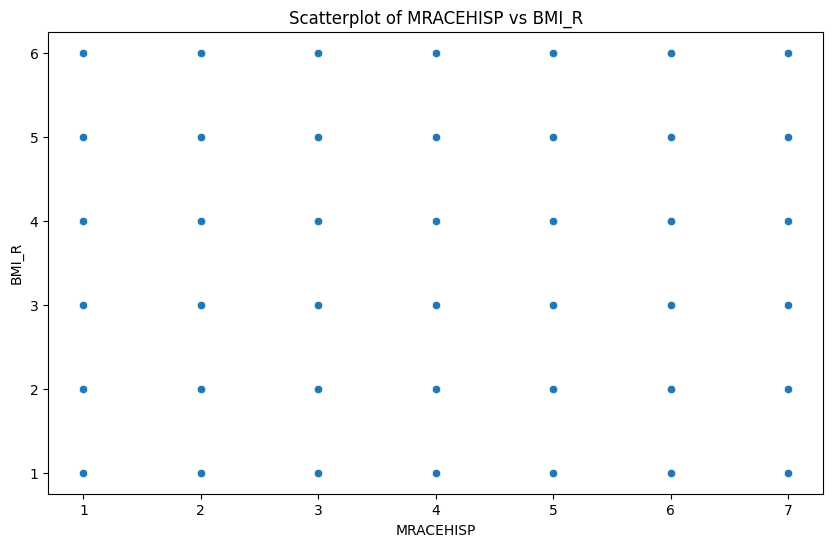

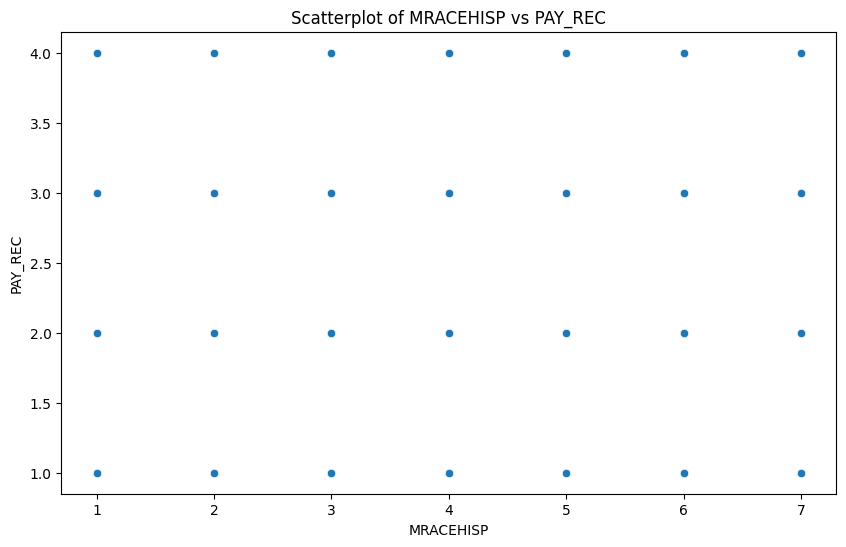

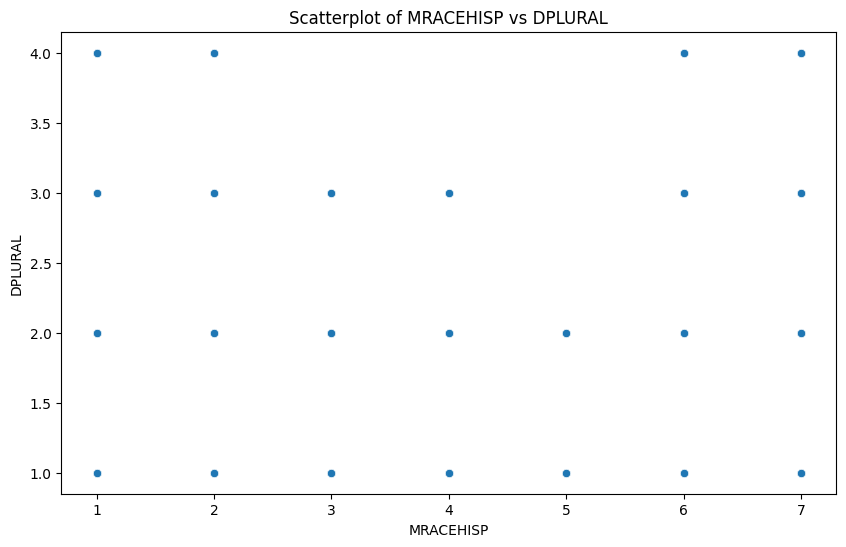

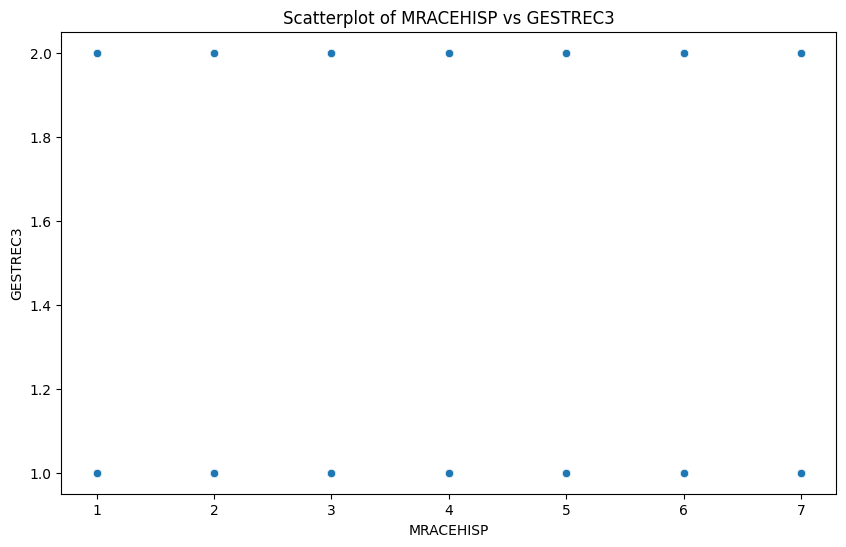

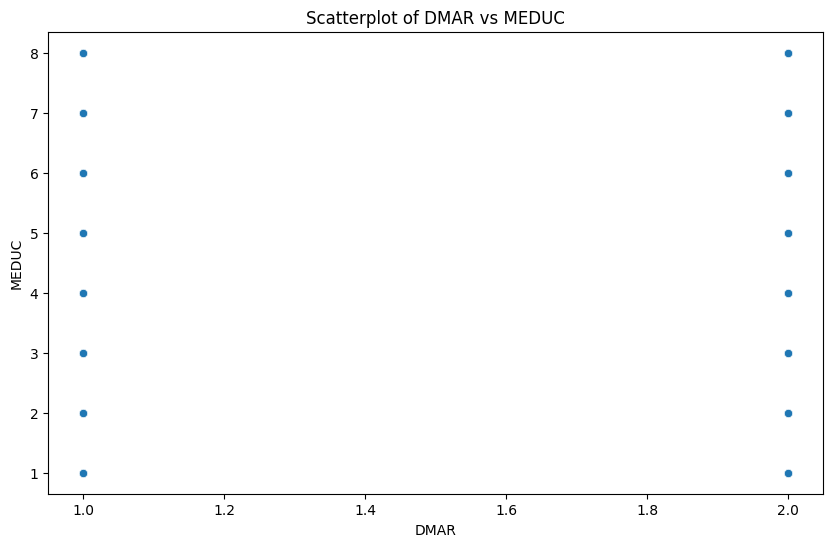

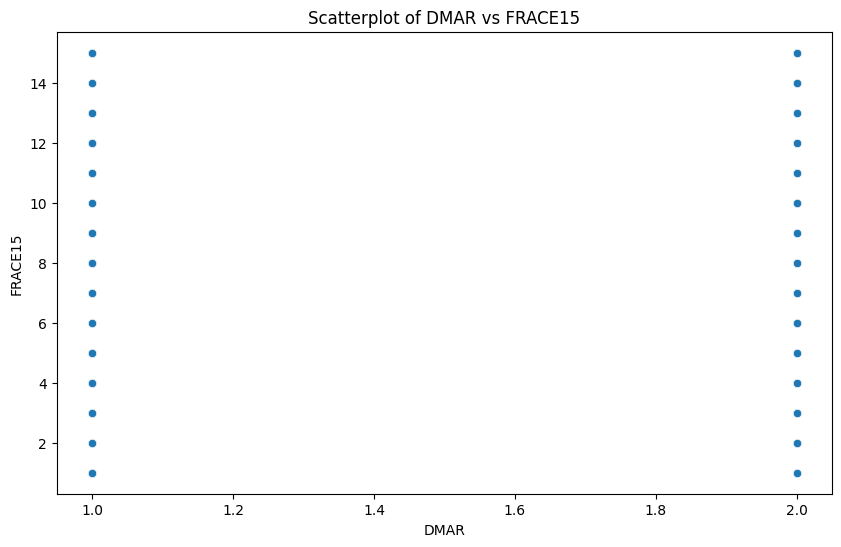

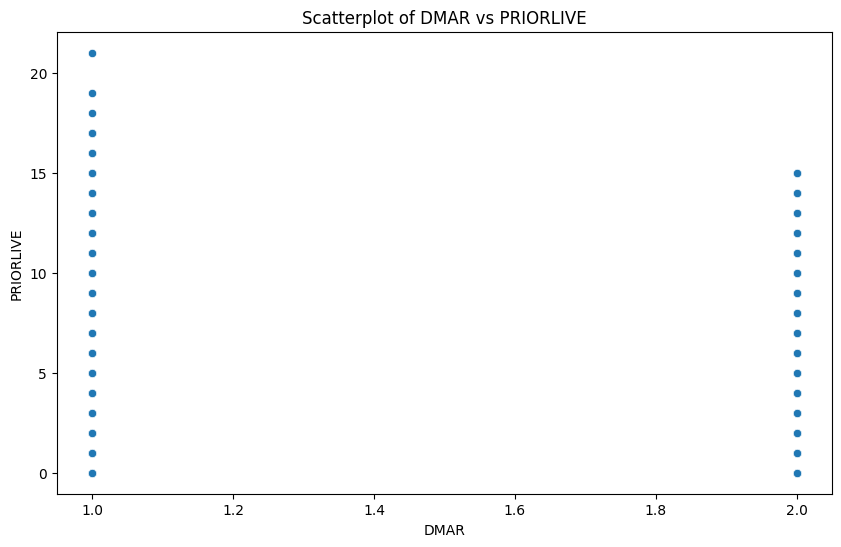

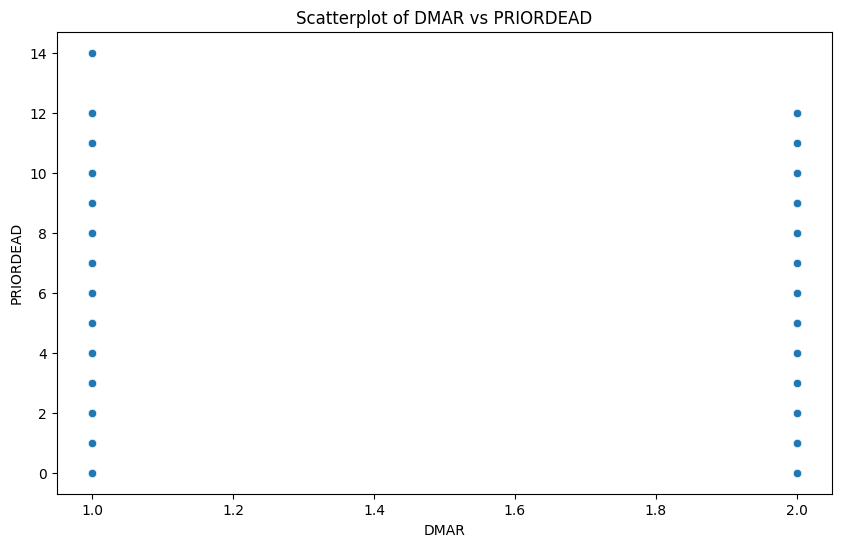

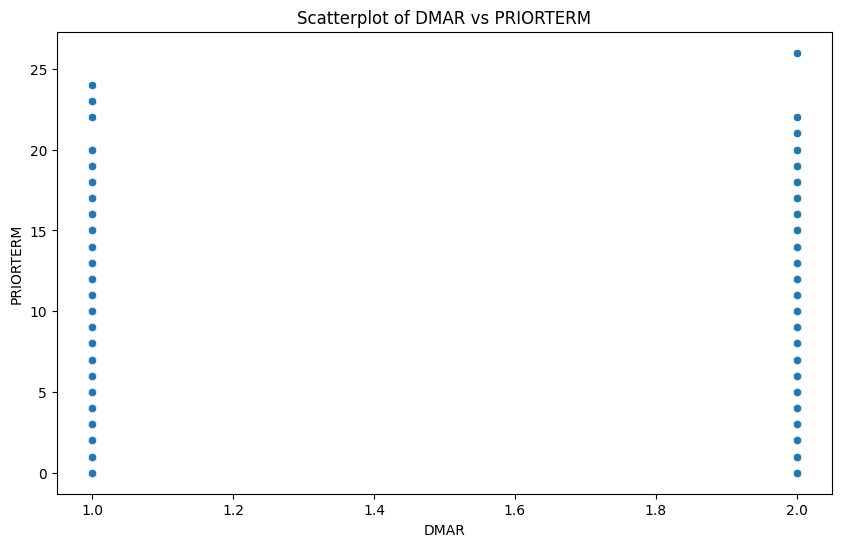

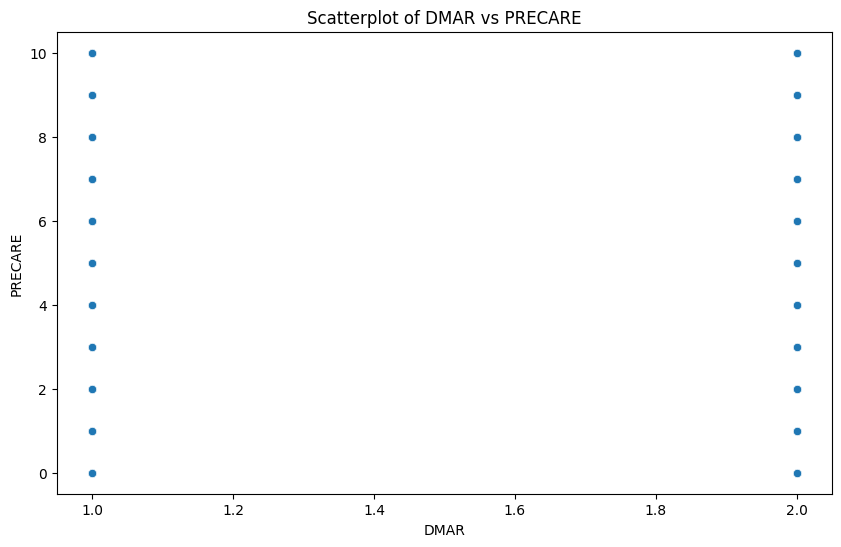

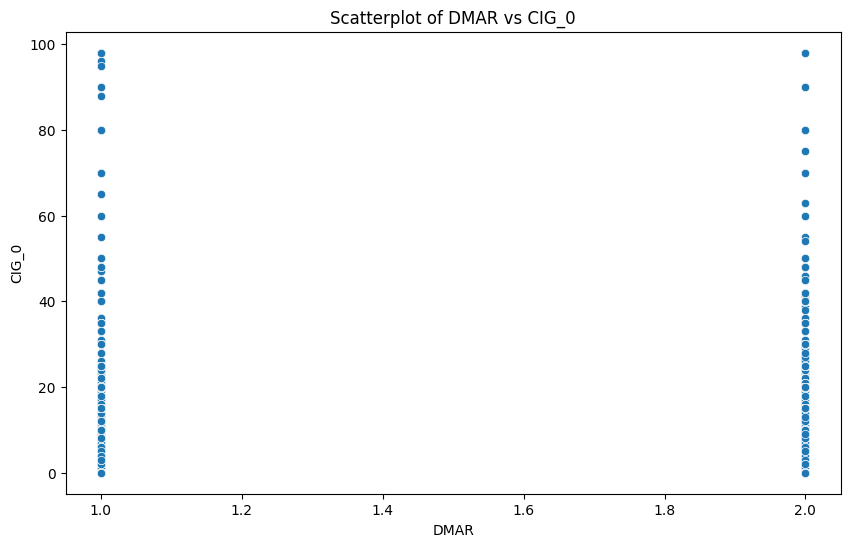

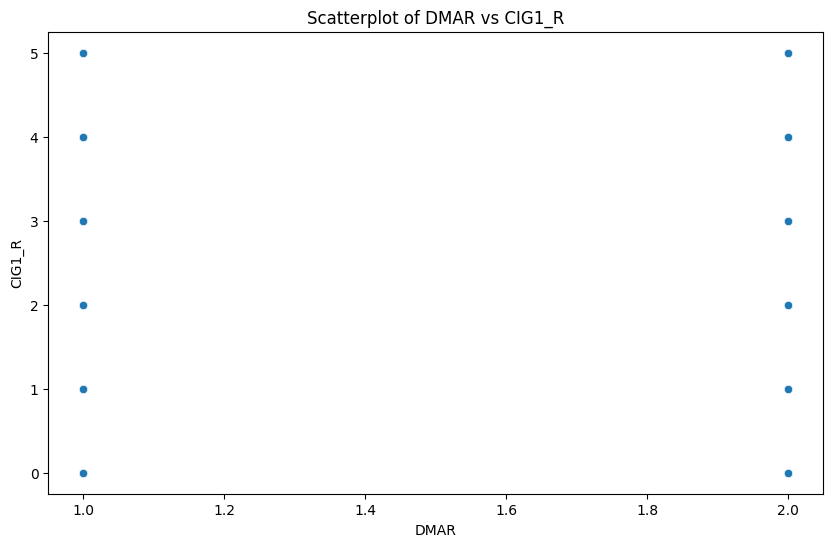

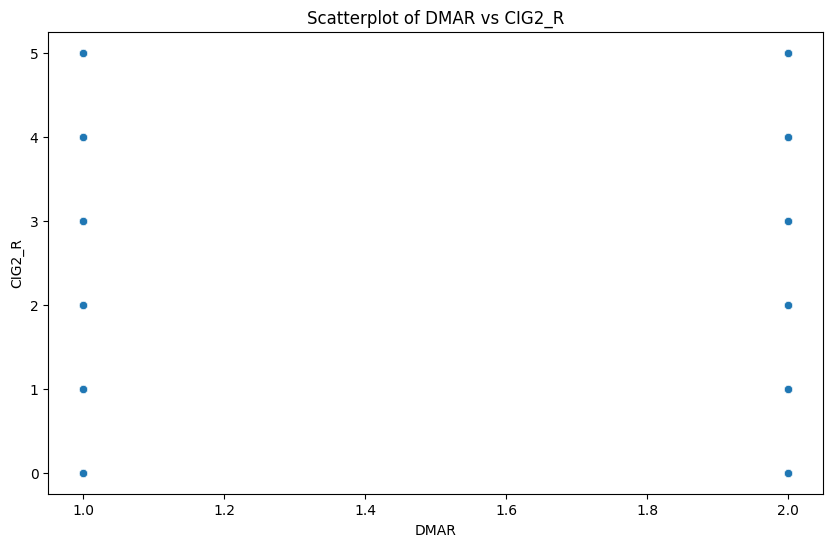

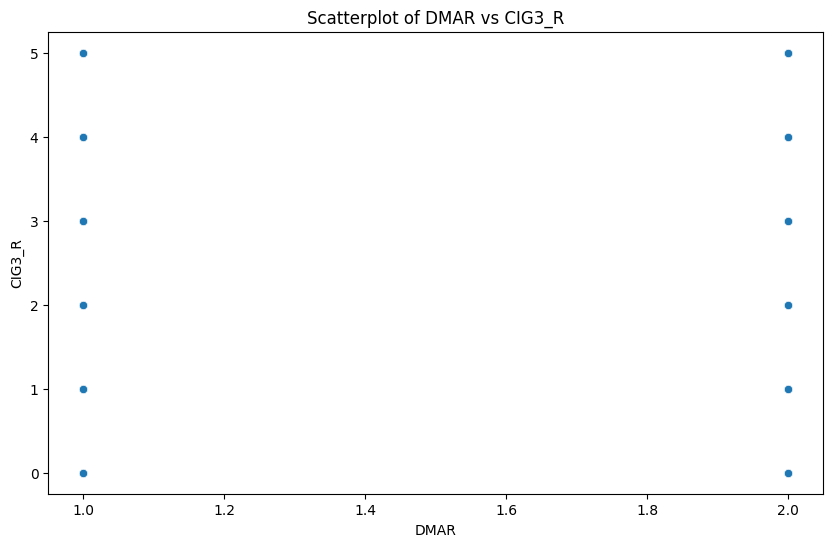

KeyboardInterrupt: 

In [ ]:
# 11. Scatterplots for Numerical Feature Pairs
print("\nScatterplots for Numerical Feature Pairs:")
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], data=combined_df)
        plt.title(f'Scatterplot of {numerical_columns[i]} vs {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()

In [ ]:
# 12. Checking for Outliers using IQR
print("\nChecking for Outliers using IQR:")
for column in numerical_columns:
    Q1 = combined_df[column].quantile(0.25)
    Q3 = combined_df[column].quantile(0.75) # This line was not indented correctly
    IQR = Q3 - Q1
    outliers = combined_df[(combined_df[column] < (Q1 - 1.5 * IQR)) | (combined_df[column] > (Q3 + 1.5 * IQR))] # Also fixed a typo here: 'continue' should be 'combined_df'
    print(f"{column}: {len(outliers)} outliers")


Checking for Outliers using IQR:
Unnamed: 0: 0 outliers
BFACIL3: 60028 outliers
MAGER9: 161731 outliers
MRACEHISP: 0 outliers
DMAR: 0 outliers
MEDUC: 0 outliers
FRACE15: 200507 outliers
PRIORLIVE: 25687 outliers
PRIORDEAD: 25547 outliers
PRIORTERM: 92350 outliers
PRECARE: 287169 outliers
CIG_0: 103102 outliers
CIG1_R: 76761 outliers
CIG2_R: 65407 outliers
CIG3_R: 62249 outliers
BMI_R: 0 outliers
PAY_REC: 84497 outliers
DPLURAL: 78384 outliers
GESTREC3: 271715 outliers


In [ ]:
# 13. Missing Values Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

NameError: name 'combined_df' is not defined

<Figure size 1600x1200 with 0 Axes>

In [ ]:
# 14. Handling Missing Values (Example)
# df.fillna(df.median(), inplace=True)  # Example: Filling missing values with median

# 15. Handling Categorical Variables (Example)
# df = pd.get_dummies(df, drop_first=True)  # Example: Converting categorical variables to dummy variables

print("Exploratory Data Analysis Completed!")

In [ ]:
# prompt: find duplicate rows

duplicate_rows = combined_df[combined_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 1340439


In [ ]:
combined_df.to_csv('combined_data.csv')